# Make all the topo plots in Macbook for better resolution

In [1]:
import os
import numpy as np
import pandas as pd

from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import mne

from matplotlib.colors import TwoSlopeNorm

In [2]:
from pycaret.classification import *

<h3>For Healthy Participants</h3>

In [3]:
os_path = "C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Corollary/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset"

subject = 'sub-hc2'
if (os.path.exists(f"{os_path}/Healthy/{subject}/{subject}_healthy_90pct.csv")):
    print('Yes')

Yes


In [4]:


filenames_list = os.listdir(f"{os_path}/Healthy")
print(filenames_list)


hfd = pd.DataFrame()
katz = pd.DataFrame()
petrosian = pd.DataFrame()
spec_ent = pd.DataFrame()
perm_ent = pd.DataFrame()

svd_ent = pd.DataFrame()
app_ent = pd.DataFrame()
samp_ent = pd.DataFrame()
hjorth = pd.DataFrame()
num_zero = pd.DataFrame()
lziv = pd.DataFrame()
det_fluc = pd.DataFrame()


for subject in filenames_list:
    
    path_hfd = f"{os_path}/Healthy/{subject}/{subject}_healthy_90pct.csv"
    path_katz = f"{os_path}/Healthy/{subject}/{subject}_healthy_katz_90pct.csv"
    path_petrosian = f"{os_path}/Healthy/{subject}/{subject}_healthy_petrosian_90pct.csv"
    path_spec_ent = f"{os_path}/Healthy/{subject}/{subject}_healthy_spec_ent_90pct.csv"
    path_perm_ent = f"{os_path}/Healthy/{subject}/{subject}_healthy_perm_ent_90pct.csv"
    
    path_svd_ent = f"{os_path}/Healthy/{subject}/{subject}_healthy_svd_ent_90pct.csv"
    path_app_ent = f"{os_path}/Healthy/{subject}/{subject}_healthy_app_ent_90pct.csv"
    path_samp_ent = f"{os_path}/Healthy/{subject}/{subject}_healthy_samp_ent_90pct.csv"
    path_hjorth = f"{os_path}/Healthy/{subject}/{subject}_healthy_hjorth_90pct.csv"
    path_num_zero = f"{os_path}/Healthy/{subject}/{subject}_healthy_num_zerocross_90pct.csv"
    path_lziv = f"{os_path}/Healthy/{subject}/{subject}_healthy_lziv_90pct.csv"
    path_det_fluc = f"{os_path}/Healthy/{subject}/{subject}_healthy_det_fluc_90pct.csv"



    if (os.path.exists(f"{os_path}/Healthy/{subject}/{subject}_healthy_90pct.csv")):
        
        print("\nSubject: ", subject)
        df_hfd = pd.read_csv(path_hfd)
        df_katz = pd.read_csv(path_katz)
        df_petrosian = pd.read_csv(path_petrosian)
        df_spec_ent = pd.read_csv(path_spec_ent)
        df_perm_ent = pd.read_csv(path_perm_ent)
        df_svd_ent = pd.read_csv(path_svd_ent)
        df_app_ent = pd.read_csv(path_app_ent)
        df_samp_ent = pd.read_csv(path_samp_ent)
        df_hjorth = pd.read_csv(path_hjorth)
        df_num_zero = pd.read_csv(path_num_zero)
        df_lziv = pd.read_csv(path_lziv)
        df_det_fluc = pd.read_csv(path_det_fluc)

        hfd = hfd.append(df_hfd)
        katz = katz.append(df_katz)
        petrosian = petrosian.append(df_petrosian)
        spec_ent = spec_ent.append(df_spec_ent)
        perm_ent = perm_ent.append(df_perm_ent)
        svd_ent = svd_ent.append(df_svd_ent)
        app_ent = app_ent.append(df_app_ent)
        samp_ent = samp_ent.append(df_samp_ent)
        hjorth = hjorth.append(df_hjorth)
        num_zero = num_zero.append(df_num_zero)
        lziv = lziv.append(df_lziv)
        det_fluc = det_fluc.append(df_det_fluc)

['sub-hc10', 'sub-hc2', 'sub-hc21', 'sub-hc24', 'sub-hc29', 'sub-hc31', 'sub-hc33', 'sub-hc4', 'sub-hc7', 'sub-hc8']

Subject:  sub-hc10

Subject:  sub-hc2

Subject:  sub-hc21

Subject:  sub-hc24

Subject:  sub-hc29

Subject:  sub-hc31

Subject:  sub-hc33

Subject:  sub-hc4

Subject:  sub-hc7

Subject:  sub-hc8


In [5]:
det_fluc

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0     1.380256  1.488126  1.649236  1.494442  1.590985  1.603191  1.633116   
1     1.383177  1.436692  1.608022  1.489039  1.558199  1.608659  1.639360   
2     1.409752  1.458431  1.600342  1.519146  1.594245  1.648993  1.639111   
3     1.399992  1.470498  1.565102  1.541624  1.638368  1.630962  1.648737   
4     1.411446  1.477599  1.664193  1.534740  1.571277  1.657381  1.671368   
...        ...       ...       ...       ...       ...       ...       ...   
1491  1.264520  1.169547  1.226933  1.270850  1.474845  1.240537  1.388016   
1492  1.329092  1.180777  1.215995  1.259936  1.456687  1.281829  1.427446   
1493  1.268565  1.155324  1.218285  1.267758  1.444135  1.264537  1.344752   
1494  1.264265  1.168502  1.241658  1.251006  1.480258  1.234047  1.429916   
1495  1.253104  1.093170  1.205414  1.247798  1.462511  1.235972  1.447001   

            C3       CP1       CP5        P7        P3        Pz       PO3  \
0     1.533686  1.524974  1.548991  1.536653  1.564051  1.572117  1.629067   
1     1.594404  1.502572  1.535177  1.509130  1.581940  1.636638  1.653436   
2     1.573934  1.508335  1.498072  1.515571  1.561730  1.680617  1.573077   
3     1.545116  1.572608  1.480441  1.518022  1.597280  1.730022  1.603497   
4     1.595824  1.583559  1.489984  1.520272  1.610566  1.728605  1.596335   
...        ...       ...       ...       ...       ...       ...       ...   
1491  1.386047  1.367411  1.529311  1.344264  1.330936  1.356761  1.281493   
1492  1.386917  1.429041  1.567227  1.341462  1.393939  1.412470  1.348267   
1493  1.394113  1.355764  1.518705  1.310642  1.329892  1.325867  1.286329   
1494  1.326110  1.409018  1.552518  1.339487  1.398252  1.370539  1.338241   
1495  1.284130  1.386610  1.496642  1.348246  1.381338  1.370067  1.346684   

            O1        Oz        O2       PO4        P4        P8       CP6  \
0     1.548303  1.528125  1.553929  1.597982  1.593399  1.459221  1.590357   
1     1.577843  1.548861  1.573796  1.634343  1.604616  1.472115  1.638211   
2     1.517197  1.526991  1.582278  1.603737  1.589172  1.483382  1.586135   
3     1.515703  1.520716  1.565344  1.626928  1.619119  1.478028  1.609462   
4     1.551707  1.566709  1.611511  1.641501  1.624678  1.525229  1.587428   
...        ...       ...       ...       ...       ...       ...       ...   
1491  1.274851  1.400431  1.388509  1.393822  1.407886  1.461806  1.529027   
1492  1.351587  1.469761  1.435077  1.419089  1.444579  1.512710  1.535674   
1493  1.286039  1.385064  1.379976  1.388831  1.353718  1.410492  1.434482   
1494  1.305702  1.411082  1.486237  1.450007  1.421537  1.430720  1.450941   
1495  1.318322  1.426491  1.460522  1.409142  1.382518  1.405226  1.393632   

           CP2        C4        T8       FC6       FC2        F4        F8  \
0     1.585050  1.578689  1.504753  1.608704  1.617063  1.591630  1.461176   
1     1.588819  1.560051  1.491832  1.563374  1.602164  1.626429  1.439995   
2     1.615086  1.554230  1.524516  1.628937  1.591778  1.613667  1.475830   
3     1.654187  1.583116  1.506958  1.577103  1.599725  1.591576  1.451109   
4     1.653091  1.575038  1.484342  1.536206  1.610764  1.610511  1.489340   
...        ...       ...       ...       ...       ...       ...       ...   
1491  1.420777  1.433623  1.512868  1.382506  1.338052  1.208393  1.291588   
1492  1.435692  1.431609  1.539138  1.350396  1.347458  1.219676  1.293697   
1493  1.385233  1.380073  1.408453  1.309338  1.312565  1.199071  1.286812   
1494  1.380828  1.354148  1.434596  1.297091  1.259995  1.174831  1.272659   
1495  1.393400  1.292779  1.375244  1.223104  1.268220  1.168831  1.259053   

           AF4       Fp2        Fz        Cz  
0     1.524330  1.521949  1.599900  1.593243  
1     1.528798  1.474631  1.543713  1.562020  
2     1.581943  1.539003  1.583211  1.530354  
3     1.501421  1.492131  1.566339  1.564976  
4     1.513806  1.522189  1.

In [6]:
hfd

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0     1.272718  1.230883  1.217525  1.251449  1.174643  1.177752  1.188140   
1     1.274649  1.222795  1.190128  1.230705  1.170421  1.174026  1.164280   
2     1.255730  1.231268  1.203830  1.228580  1.165853  1.166521  1.164186   
3     1.247601  1.243170  1.200220  1.206562  1.179577  1.179542  1.182123   
4     1.240923  1.230055  1.188557  1.201641  1.167166  1.169438  1.168105   
...        ...       ...       ...       ...       ...       ...       ...   
1491  1.305650  1.358950  1.332233  1.296172  1.243101  1.305509  1.299438   
1492  1.293746  1.348548  1.343281  1.309321  1.244870  1.289598  1.292418   
1493  1.278544  1.339941  1.336418  1.308768  1.232855  1.291857  1.276803   
1494  1.280934  1.358213  1.317821  1.335188  1.224697  1.287468  1.265172   
1495  1.264489  1.382770  1.303237  1.325287  1.227998  1.287828  1.246078   

            C3       CP1       CP5        P7        P3        Pz       PO3  \
0     1.230586  1.236045  1.209684  1.201771  1.198706  1.168852  1.185941   
1     1.209270  1.215695  1.196882  1.197464  1.174712  1.177533  1.167277   
2     1.225009  1.212970  1.205846  1.203010  1.174279  1.162888  1.161962   
3     1.222464  1.212895  1.206303  1.208989  1.154670  1.137845  1.146008   
4     1.216268  1.189762  1.212374  1.215454  1.155115  1.138028  1.149170   
...        ...       ...       ...       ...       ...       ...       ...   
1491  1.296808  1.266680  1.217636  1.299039  1.273374  1.268944  1.294803   
1492  1.301601  1.252909  1.202273  1.305542  1.260950  1.259278  1.287293   
1493  1.296060  1.258590  1.210934  1.307738  1.269507  1.262682  1.301733   
1494  1.301221  1.238646  1.205131  1.286789  1.256831  1.246793  1.283853   
1495  1.303624  1.227673  1.207611  1.280952  1.246080  1.242187  1.269690   

            O1        Oz        O2       PO4        P4        P8       CP6  \
0     1.217324  1.213132  1.196936  1.175975  1.180963  1.262771  1.209712   
1     1.210921  1.207162  1.196533  1.162072  1.167945  1.236526  1.184906   
2     1.199073  1.191926  1.179228  1.165748  1.169345  1.227175  1.173469   
3     1.180132  1.175951  1.171361  1.155598  1.154006  1.220341  1.177063   
4     1.168080  1.164283  1.164034  1.143665  1.150829  1.219810  1.187307   
...        ...       ...       ...       ...       ...       ...       ...   
1491  1.303802  1.270245  1.289093  1.294773  1.270929  1.283397  1.229515   
1492  1.297693  1.251232  1.260539  1.273406  1.254325  1.251148  1.230498   
1493  1.308658  1.261007  1.273011  1.269692  1.263917  1.258601  1.237894   
1494  1.299189  1.245460  1.258687  1.264842  1.261421  1.261747  1.238469   
1495  1.297229  1.236648  1.236442  1.246443  1.251446  1.249162  1.248593   

           CP2        C4        T8       FC6       FC2        F4        F8  \
0     1.172141  1.159494  1.218089  1.186616  1.180885  1.177174  1.276833   
1     1.163481  1.152371  1.198907  1.171564  1.178251  1.173011  1.258353   
2     1.164166  1.152333  1.186844  1.150551  1.188550  1.177356  1.258344   
3     1.137442  1.144902  1.193807  1.169153  1.190600  1.179510  1.254742   
4     1.146340  1.152977  1.203073  1.175744  1.187055  1.172874  1.227501   
...        ...       ...       ...       ...       ...       ...       ...   
1491  1.247410  1.228653  1.233708  1.290383  1.257369  1.312384  1.289695   
1492  1.242454  1.241700  1.247749  1.288503  1.268681  1.311409  1.271815   
1493  1.246889  1.269670  1.241905  1.299406  1.274981  1.302636  1.259933   
1494  1.252145  1.283067  1.258692  1.306857  1.299638  1.314275  1.272213   
1495  1.259223  1.297113  1.277102  1.315221  1.312823  1.316570  1.275120   

           AF4       Fp2        Fz        Cz  
0     1.237486  1.243378  1.170001  1.206382  
1     1.202471  1.226021  1.173059  1.201029  
2     1.199938  1.215850  1.158812  1.192502  
3     1.212006  1.213532  1.188219  1.181259  
4     1.191099  1.192409  1.

<h3>For Parkinson's Participants</h3>

In [7]:
filenames_list = os.listdir(f"{os_path}/PD")
print(filenames_list)

['.DS_Store', 'sub-pd11', 'sub-pd12', 'sub-pd14', 'sub-pd16', 'sub-pd17', 'sub-pd19', 'sub-pd22', 'sub-pd23', 'sub-pd28', 'sub-pd5']


In [8]:
filenames_list = os.listdir(f"{os_path}/PD")
print(filenames_list)


hfd_pd = pd.DataFrame()
katz_pd = pd.DataFrame()
petrosian_pd = pd.DataFrame()
spec_ent_pd = pd.DataFrame()
perm_ent_pd = pd.DataFrame()
svd_ent_pd = pd.DataFrame()
app_ent_pd = pd.DataFrame()
samp_ent_pd = pd.DataFrame()
hjorth_pd = pd.DataFrame()
num_zero_pd = pd.DataFrame()
lziv_pd = pd.DataFrame()
det_fluc_pd = pd.DataFrame()


for subject in filenames_list:

    path_hfd_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_90pct.csv"
    path_katz_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_katz_90pct.csv"
    path_petrosian_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_petrosian_90pct.csv"
    path_spec_ent_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_spec_ent_90pct.csv"
    path_perm_ent_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_perm_ent_90pct.csv"
    path_svd_ent_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_svd_ent_90pct.csv"
    path_app_ent_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_app_ent_90pct.csv"
    path_samp_ent_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_samp_ent_90pct.csv"
    path_hjorth_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_hjorth_90pct.csv"
    path_num_zero_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_num_zerocross_90pct.csv"
    path_lziv_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_lziv_90pct.csv"
    path_det_fluc_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_det_fluc_90pct.csv"

    
    if (os.path.exists(f"{os_path}/PD/{subject}/{subject}_PD_ON_90pct.csv")):
        
        print('\nSubject:', subject)
        df_hfd_pd = pd.read_csv(path_hfd_pd)
        df_katz_pd = pd.read_csv(path_katz_pd)
        df_petrosian = pd.read_csv(path_petrosian_pd)
        df_spec_ent = pd.read_csv(path_spec_ent_pd)
        df_perm_ent = pd.read_csv(path_perm_ent_pd)
        
        df_svd_ent = pd.read_csv(path_svd_ent_pd)
        df_app_ent = pd.read_csv(path_app_ent_pd)
        df_samp_ent = pd.read_csv(path_samp_ent_pd)
        df_hjorth_pd = pd.read_csv(path_hjorth_pd)
        df_num_zero_pd = pd.read_csv(path_num_zero_pd)
        df_lziv_pd = pd.read_csv(path_lziv_pd)
        df_det_fluc_pd = pd.read_csv(path_det_fluc_pd)




        hfd_pd = hfd_pd.append(df_hfd_pd)
        katz_pd = katz_pd.append(df_katz_pd)
        petrosian_pd = petrosian_pd.append(df_petrosian)
        spec_ent_pd = spec_ent_pd.append(df_spec_ent)
        perm_ent_pd = perm_ent_pd.append(df_perm_ent)
        
        svd_ent_pd = svd_ent_pd.append(df_svd_ent)
        app_ent_pd = app_ent_pd.append(df_app_ent)
        samp_ent_pd = samp_ent_pd.append(df_samp_ent)
        hjorth_pd = hjorth_pd.append(df_hjorth_pd)
        num_zero_pd = num_zero_pd.append(df_num_zero_pd)
        lziv_pd = lziv_pd.append(df_lziv_pd)
        det_fluc_pd = det_fluc_pd.append(df_det_fluc_pd)

['.DS_Store', 'sub-pd11', 'sub-pd12', 'sub-pd14', 'sub-pd16', 'sub-pd17', 'sub-pd19', 'sub-pd22', 'sub-pd23', 'sub-pd28', 'sub-pd5']

Subject: sub-pd11

Subject: sub-pd12

Subject: sub-pd14

Subject: sub-pd16

Subject: sub-pd17

Subject: sub-pd19

Subject: sub-pd22

Subject: sub-pd23

Subject: sub-pd28

Subject: sub-pd5


In [9]:
150*17

2550

In [10]:
spec_ent_pd

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0     0.546736  0.556076  0.473120  0.557950  0.532212  0.569210  0.556794   
1     0.542936  0.540021  0.496940  0.547173  0.536538  0.571207  0.576048   
2     0.545533  0.528515  0.487701  0.536233  0.528095  0.568786  0.584933   
3     0.523015  0.519258  0.476464  0.541878  0.519999  0.559024  0.589143   
4     0.521943  0.519487  0.503544  0.528250  0.518282  0.558087  0.557726   
...        ...       ...       ...       ...       ...       ...       ...   
1491  0.582344  0.617095  0.508996  0.609488  0.564630  0.537744  0.420671   
1492  0.590508  0.619190  0.526174  0.608025  0.528527  0.554011  0.489189   
1493  0.589718  0.617652  0.510845  0.610871  0.547688  0.545353  0.486477   
1494  0.596477  0.609560  0.501755  0.609975  0.551250  0.535818  0.462978   
1495  0.605421  0.612176  0.510427  0.585492  0.496786  0.541082  0.482486   

            C3       CP1       CP5        P7        P3        Pz       PO3  \
0     0.548265  0.538362  0.539079  0.529123  0.533291  0.527826  0.536257   
1     0.563988  0.530970  0.532828  0.522052  0.534310  0.540841  0.533791   
2     0.568235  0.526790  0.523320  0.504847  0.502831  0.527093  0.522752   
3     0.540424  0.531925  0.523415  0.510661  0.508966  0.533244  0.517359   
4     0.551466  0.524381  0.518716  0.511582  0.524069  0.521716  0.531976   
...        ...       ...       ...       ...       ...       ...       ...   
1491  0.517055  0.543404  0.430285  0.409400  0.451469  0.500919  0.421394   
1492  0.533756  0.536110  0.438087  0.433617  0.459000  0.501125  0.438959   
1493  0.513008  0.551001  0.444994  0.416673  0.464108  0.505921  0.438287   
1494  0.487817  0.538834  0.438963  0.427851  0.471554  0.482952  0.439107   
1495  0.488282  0.526028  0.435384  0.419475  0.471630  0.507592  0.448703   

            O1        Oz        O2       PO4        P4        P8       CP6  \
0     0.530391  0.538429  0.518713  0.503873  0.514977  0.512767  0.524804   
1     0.524793  0.543107  0.542389  0.530216  0.525701  0.557448  0.540220   
2     0.498342  0.522792  0.505325  0.505058  0.500548  0.514246  0.519095   
3     0.500420  0.504267  0.507732  0.510048  0.511432  0.502491  0.519820   
4     0.496482  0.503727  0.502756  0.516081  0.506090  0.489791  0.496560   
...        ...       ...       ...       ...       ...       ...       ...   
1491  0.414535  0.455024  0.481240  0.471201  0.471201  0.434801  0.430583   
1492  0.444175  0.471747  0.494868  0.475806  0.470413  0.443420  0.439059   
1493  0.447614  0.453218  0.464166  0.462298  0.450147  0.426335  0.435424   
1494  0.443093  0.438133  0.471134  0.459365  0.471494  0.439561  0.452102   
1495  0.472401  0.466493  0.483718  0.486644  0.471806  0.400106  0.421333   

           CP2        C4        T8       FC6       FC2        F4        F8  \
0     0.512691  0.526478  0.575533  0.571447  0.499096  0.522316  0.549910   
1     0.504415  0.515200  0.568225  0.548850  0.480482  0.516112  0.524903   
2     0.530747  0.535656  0.555641  0.545403  0.537644  0.540471  0.535599   
3     0.516399  0.531404  0.518786  0.536662  0.508507  0.532625  0.521634   
4     0.517710  0.502284  0.474148  0.492474  0.524054  0.507799  0.502865   
...        ...       ...       ...       ...       ...       ...       ...   
1491  0.475289  0.458975  0.399515  0.394880  0.561543  0.596860  0.409361   
1492  0.460956  0.454602  0.413793  0.428625  0.521214  0.593514  0.451607   
1493  0.448446  0.449460  0.396075  0.388548  0.510680  0.564740  0.427891   
1494  0.466428  0.457649  0.426350  0.424775  0.516870  0.587804  0.462513   
1495  0.466936  0.410330  0.427121  0.421981  0.453984  0.569051  0.514775   

           AF4       Fp2        Fz        Cz  
0     0.542013  0.544895  0.540928  0.527064  
1     0.503641  0.512518  0.511717  0.524240  
2     0.520626  0.518545  0.526507  0.520397  
3     0.519234  0.517086  0.500160  0.518426  
4     0.499851  0.503504  0.

In [11]:
hfd_pd

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0     1.157822  1.151306  1.118235  1.160752  1.179193  1.201934  1.246479   
1     1.154922  1.140010  1.125229  1.149271  1.153187  1.240493  1.266133   
2     1.159399  1.168332  1.138357  1.174843  1.145055  1.243274  1.260725   
3     1.167894  1.177442  1.144920  1.182447  1.150938  1.232805  1.252901   
4     1.163173  1.171058  1.132177  1.168243  1.138585  1.222243  1.239360   
...        ...       ...       ...       ...       ...       ...       ...   
1491  1.302466  1.334328  1.275179  1.264969  1.184758  1.220660  1.127938   
1492  1.315561  1.315492  1.278695  1.274556  1.197400  1.226832  1.155667   
1493  1.321695  1.312093  1.295262  1.282973  1.194625  1.240488  1.134119   
1494  1.292157  1.312236  1.271227  1.259599  1.167872  1.235927  1.138483   
1495  1.272434  1.299976  1.275698  1.240575  1.146544  1.218745  1.106543   

            C3       CP1       CP5        P7        P3        Pz       PO3  \
0     1.170408  1.112922  1.128120  1.116596  1.121840  1.114089  1.122279   
1     1.171172  1.121799  1.144997  1.140913  1.138389  1.115681  1.146688   
2     1.168196  1.123770  1.118560  1.115265  1.130597  1.124911  1.135387   
3     1.172902  1.136669  1.114404  1.113594  1.132108  1.127441  1.133124   
4     1.173391  1.128526  1.106605  1.110287  1.125373  1.119854  1.117718   
...        ...       ...       ...       ...       ...       ...       ...   
1491  1.143201  1.166359  1.089522  1.093325  1.116311  1.143078  1.097747   
1492  1.154249  1.181887  1.111336  1.099256  1.128112  1.130790  1.102371   
1493  1.146396  1.174820  1.115087  1.102506  1.132957  1.129636  1.113238   
1494  1.155709  1.158595  1.111132  1.112428  1.127736  1.128537  1.111628   
1495  1.143495  1.157530  1.109480  1.090803  1.119824  1.119296  1.102543   

            O1        Oz        O2       PO4        P4        P8       CP6  \
0     1.119085  1.131254  1.124406  1.129936  1.122890  1.137132  1.130299   
1     1.153646  1.149996  1.145595  1.139360  1.121814  1.158816  1.139908   
2     1.127480  1.124801  1.118255  1.120350  1.104346  1.128601  1.121172   
3     1.122015  1.119456  1.107833  1.112350  1.095048  1.102243  1.104364   
4     1.116717  1.114781  1.106967  1.108358  1.099384  1.099355  1.099859   
...        ...       ...       ...       ...       ...       ...       ...   
1491  1.123560  1.123897  1.131064  1.125837  1.147418  1.128787  1.096363   
1492  1.125293  1.128292  1.138280  1.127734  1.140348  1.132091  1.114182   
1493  1.138246  1.137348  1.140103  1.118774  1.139031  1.117241  1.109445   
1494  1.146741  1.150849  1.160725  1.133345  1.155614  1.134862  1.108155   
1495  1.130116  1.122364  1.125300  1.109703  1.133916  1.109322  1.100024   

           CP2        C4        T8       FC6       FC2        F4        F8  \
0     1.115813  1.122411  1.150914  1.136262  1.157736  1.160811  1.191306   
1     1.101840  1.125908  1.181667  1.172070  1.150032  1.184387  1.217108   
2     1.111580  1.131303  1.165689  1.144187  1.146831  1.147810  1.177429   
3     1.110401  1.110412  1.141355  1.124614  1.127153  1.147154  1.159434   
4     1.111478  1.108696  1.137379  1.126470  1.127836  1.142429  1.166243   
...        ...       ...       ...       ...       ...       ...       ...   
1491  1.114868  1.103484  1.112756  1.107095  1.168516  1.278714  1.203691   
1492  1.109954  1.117601  1.137378  1.130894  1.170828  1.273741  1.210429   
1493  1.108508  1.128700  1.128227  1.122688  1.177031  1.264657  1.203916   
1494  1.116930  1.115410  1.104042  1.090977  1.164657  1.261629  1.186246   
1495  1.116544  1.105007  1.099136  1.094972  1.141745  1.258826  1.161942   

           AF4       Fp2        Fz        Cz  
0     1.169726  1.150618  1.172943  1.166072  
1     1.193179  1.172507  1.139338  1.141703  
2     1.174793  1.170414  1.131740  1.138443  
3     1.166046  1.166267  1.134204  1.128490  
4     1.166152  1.162083  1.

## Setting the montage

In [ ]:
subject = "sub-hc33"
path = f"{os_path}/Healthy/{subject}/"
filename = f"ses-hc/eeg/{subject}_ses-hc_task-rest_eeg.bdf"

EEG_data = mne.io.read_raw_bdf(f"{path}{filename}", preload=True)
low_freq, high_freq = 1.0, 40.0 # values in Hz
raw = EEG_data.copy().filter(low_freq, high_freq, n_jobs=4)
raw.crop(tmax=150)
raw = raw.drop_channels(['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'Status'])
std_montage = mne.channels.make_standard_montage('biosemi32')
raw.set_montage(std_montage)

Extracting EDF parameters from C:\Users\utkar\Desktop\Research_Paper\EEG Analysis\Corollary\Parkinsons-EEG-DeepLearning\Parkinson's disease dataset\Healthy\sub-hc33\ses-hc\eeg\sub-hc33_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97279  =      0.000 ...   189.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 sec)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    2.5s finished


<RawEDF | sub-hc33_ses-hc_task-rest_eeg.bdf, 32 x 76801 (150.0 s), ~18.8 MB, data loaded>

<h2>1. Higuchi</h2>

In [78]:
hfd_pd['Y'] = 1
hfd['Y'] = 0

In [79]:
hfd

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0     1.272718  1.230883  1.217525  1.251449  1.174643  1.177752  1.188140   
1     1.274649  1.222795  1.190128  1.230705  1.170421  1.174026  1.164280   
2     1.255730  1.231268  1.203830  1.228580  1.165853  1.166521  1.164186   
3     1.247601  1.243170  1.200220  1.206562  1.179577  1.179542  1.182123   
4     1.240923  1.230055  1.188557  1.201641  1.167166  1.169438  1.168105   
...        ...       ...       ...       ...       ...       ...       ...   
1491  1.305650  1.358950  1.332233  1.296172  1.243101  1.305509  1.299438   
1492  1.293746  1.348548  1.343281  1.309321  1.244870  1.289598  1.292418   
1493  1.278544  1.339941  1.336418  1.308768  1.232855  1.291857  1.276803   
1494  1.280934  1.358213  1.317821  1.335188  1.224697  1.287468  1.265172   
1495  1.264489  1.382770  1.303237  1.325287  1.227998  1.287828  1.246078   

            C3       CP1       CP5  ...        T8       FC6       FC2  \
0     1.230586  1.236045  1.209684  ...  1.218089  1.186616  1.180885   
1     1.209270  1.215695  1.196882  ...  1.198907  1.171564  1.178251   
2     1.225009  1.212970  1.205846  ...  1.186844  1.150551  1.188550   
3     1.222464  1.212895  1.206303  ...  1.193807  1.169153  1.190600   
4     1.216268  1.189762  1.212374  ...  1.203073  1.175744  1.187055   
...        ...       ...       ...  ...       ...       ...       ...   
1491  1.296808  1.266680  1.217636  ...  1.233708  1.290383  1.257369   
1492  1.301601  1.252909  1.202273  ...  1.247749  1.288503  1.268681   
1493  1.296060  1.258590  1.210934  ...  1.241905  1.299406  1.274981   
1494  1.301221  1.238646  1.205131  ...  1.258692  1.306857  1.299638   
1495  1.303624  1.227673  1.207611  ...  1.277102  1.315221  1.312823   

            F4        F8       AF4       Fp2        Fz        Cz  Y  
0     1.177174  1.276833  1.237486  1.243378  1.170001  1.206382  0  
1     1.173011  1.258353  1.202471  1.226021  1.173059  1.201029  0  
2     1.177356  1.258344  1.199938  1.215850  1.158812  1.192502  0  
3     1.179510  1.254742  1.212006  1.213532  1.188219  1.181259  0  
4     1.172874  1.227501  1.191099  1.192409  1.179803  1.184930  0  
...        ...       ...       ...       ...       ...       ... ..  
1491  1.312384  1.289695  1.354137  1.330560  1.250627  1.265760  0  
1492  1.311409  1.271815  1.373986  1.304847  1.274090  1.268720  0  
1493  1.302636  1.259933  1.390972  1.283562  1.286457  1.269742  0  
1494  1.314275  1.272213  1.382583  1.299082  1.278553  1.279901  0  
1495  1.316570  1.275120  1.403560  1.289532  1.287059  1.290647  0  

[14960 rows x 33 columns]

In [80]:
X1 = hfd.append(hfd_pd).reset_index().drop('index', axis=1)
X1

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0      1.272718  1.230883  1.217525  1.251449  1.174643  1.177752  1.188140   
1      1.274649  1.222795  1.190128  1.230705  1.170421  1.174026  1.164280   
2      1.255730  1.231268  1.203830  1.228580  1.165853  1.166521  1.164186   
3      1.247601  1.243170  1.200220  1.206562  1.179577  1.179542  1.182123   
4      1.240923  1.230055  1.188557  1.201641  1.167166  1.169438  1.168105   
...         ...       ...       ...       ...       ...       ...       ...   
29915  1.302466  1.334328  1.275179  1.264969  1.184758  1.220660  1.127938   
29916  1.315561  1.315492  1.278695  1.274556  1.197400  1.226832  1.155667   
29917  1.321695  1.312093  1.295262  1.282973  1.194625  1.240488  1.134119   
29918  1.292157  1.312236  1.271227  1.259599  1.167872  1.235927  1.138483   
29919  1.272434  1.299976  1.275698  1.240575  1.146544  1.218745  1.106543   

             C3       CP1       CP5  ...        T8       FC6       FC2  \
0      1.230586  1.236045  1.209684  ...  1.218089  1.186616  1.180885   
1      1.209270  1.215695  1.196882  ...  1.198907  1.171564  1.178251   
2      1.225009  1.212970  1.205846  ...  1.186844  1.150551  1.188550   
3      1.222464  1.212895  1.206303  ...  1.193807  1.169153  1.190600   
4      1.216268  1.189762  1.212374  ...  1.203073  1.175744  1.187055   
...         ...       ...       ...  ...       ...       ...       ...   
29915  1.143201  1.166359  1.089522  ...  1.112756  1.107095  1.168516   
29916  1.154249  1.181887  1.111336  ...  1.137378  1.130894  1.170828   
29917  1.146396  1.174820  1.115087  ...  1.128227  1.122688  1.177031   
29918  1.155709  1.158595  1.111132  ...  1.104042  1.090977  1.164657   
29919  1.143495  1.157530  1.109480  ...  1.099136  1.094972  1.141745   

             F4        F8       AF4       Fp2        Fz        Cz  Y  
0      1.177174  1.276833  1.237486  1.243378  1.170001  1.206382  0  
1      1.173011  1.258353  1.202471  1.226021  1.173059  1.201029  0  
2      1.177356  1.258344  1.199938  1.215850  1.158812  1.192502  0  
3      1.179510  1.254742  1.212006  1.213532  1.188219  1.181259  0  
4      1.172874  1.227501  1.191099  1.192409  1.179803  1.184930  0  
...         ...       ...       ...       ...       ...       ... ..  
29915  1.278714  1.203691  1.260678  1.312566  1.204767  1.123033  1  
29916  1.273741  1.210429  1.280697  1.310561  1.213517  1.125212  1  
29917  1.264657  1.203916  1.294850  1.301086  1.216530  1.153380  1  
29918  1.261629  1.186246  1.288470  1.302348  1.176626  1.139820  1  
29919  1.258826  1.161942  1.280664  1.287315  1.162734  1.122010  1  

[29920 rows x 33 columns]

<h2>Using Pycaret</h2>

In [81]:
X3 = X1.iloc[:,1:]
X3

AF3        F7        F3       FC1       FC5        T7        C3  \
0      1.230883  1.217525  1.251449  1.174643  1.177752  1.188140  1.230586   
1      1.222795  1.190128  1.230705  1.170421  1.174026  1.164280  1.209270   
2      1.231268  1.203830  1.228580  1.165853  1.166521  1.164186  1.225009   
3      1.243170  1.200220  1.206562  1.179577  1.179542  1.182123  1.222464   
4      1.230055  1.188557  1.201641  1.167166  1.169438  1.168105  1.216268   
...         ...       ...       ...       ...       ...       ...       ...   
29915  1.334328  1.275179  1.264969  1.184758  1.220660  1.127938  1.143201   
29916  1.315492  1.278695  1.274556  1.197400  1.226832  1.155667  1.154249   
29917  1.312093  1.295262  1.282973  1.194625  1.240488  1.134119  1.146396   
29918  1.312236  1.271227  1.259599  1.167872  1.235927  1.138483  1.155709   
29919  1.299976  1.275698  1.240575  1.146544  1.218745  1.106543  1.143495   

            CP1       CP5        P7  ...        T8       FC6       FC2  \
0      1.236045  1.209684  1.201771  ...  1.218089  1.186616  1.180885   
1      1.215695  1.196882  1.197464  ...  1.198907  1.171564  1.178251   
2      1.212970  1.205846  1.203010  ...  1.186844  1.150551  1.188550   
3      1.212895  1.206303  1.208989  ...  1.193807  1.169153  1.190600   
4      1.189762  1.212374  1.215454  ...  1.203073  1.175744  1.187055   
...         ...       ...       ...  ...       ...       ...       ...   
29915  1.166359  1.089522  1.093325  ...  1.112756  1.107095  1.168516   
29916  1.181887  1.111336  1.099256  ...  1.137378  1.130894  1.170828   
29917  1.174820  1.115087  1.102506  ...  1.128227  1.122688  1.177031   
29918  1.158595  1.111132  1.112428  ...  1.104042  1.090977  1.164657   
29919  1.157530  1.109480  1.090803  ...  1.099136  1.094972  1.141745   

             F4        F8       AF4       Fp2        Fz        Cz  Y  
0      1.177174  1.276833  1.237486  1.243378  1.170001  1.206382  0  
1      1.173011  1.258353  1.202471  1.226021  1.173059  1.201029  0  
2      1.177356  1.258344  1.199938  1.215850  1.158812  1.192502  0  
3      1.179510  1.254742  1.212006  1.213532  1.188219  1.181259  0  
4      1.172874  1.227501  1.191099  1.192409  1.179803  1.184930  0  
...         ...       ...       ...       ...       ...       ... ..  
29915  1.278714  1.203691  1.260678  1.312566  1.204767  1.123033  1  
29916  1.273741  1.210429  1.280697  1.310561  1.213517  1.125212  1  
29917  1.264657  1.203916  1.294850  1.301086  1.216530  1.153380  1  
29918  1.261629  1.186246  1.288470  1.302348  1.176626  1.139820  1  
29919  1.258826  1.161942  1.280664  1.287315  1.162734  1.122010  1  

[29920 rows x 32 columns]

In [82]:
clf = setup(data=X1, target='Y', session_id=123)

In [17]:
compare_models(fold=15)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
knn = create_model('knn', n_neighbors=5, fold=15)

<h2>KNN giving 99.71% for 90pct Overlap</h2>

In [19]:
tuned_knn = tune_model(knn, fold=15, optimize='Accuracy')

In [83]:
xgb = create_model('xgboost', fold=15)

In [21]:
evaluate_model(xgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Function for plotting Topo plot and feature importances

In [311]:
from matplotlib import pyplot as plt
# increase the size of the graph

def plot_importance(model):
    fig, ax = plt.subplots(figsize=(10,10))
    importance_type = 'gain'  # Specify importance type

    importance = model.get_booster().get_score(importance_type=importance_type)

    # Sort the features by importance score
    sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

    # Extract the feature names and importance scores
    feature_names = [x[0] for x in sorted_importance]
    importances = [x[1] for x in sorted_importance]

    # Create a horizontal bar graph of feature importances
    plt.barh(feature_names, importances)

    # Add labels and title to the graph
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title("Feature Importance using '{0}' method".format(importance_type))

    importances1 = list(importance.values())
    fig, ax1 = plt.subplots(figsize=(4,4))
    cnorm = TwoSlopeNorm(vmin=min(importances1), vcenter=(min(importances1) + max(importances1))/2, vmax=max(importances1))
    mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax1)

    # Show the graph
    plt.show()
    return list(importance.values())


def et_plot_importance(et):
    importances = et.feature_importances_
    #sorted_indices = np.argsort(importances)[::-1]

    fig, ax = plt.subplots(figsize=(10,10))
    sorted_indices = np.argsort(importances)[::-1]
    plt.title('Feature Importance')
    plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
    plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
    plt.tight_layout()

    importances1 = importances
    fig, ax1 = plt.subplots(figsize=(4,4))
    cnorm = TwoSlopeNorm(vmin=min(importances1), vcenter=(min(importances1) + max(importances1))/2, vmax=max(importances1))
    mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax1)
    plt.show()

    

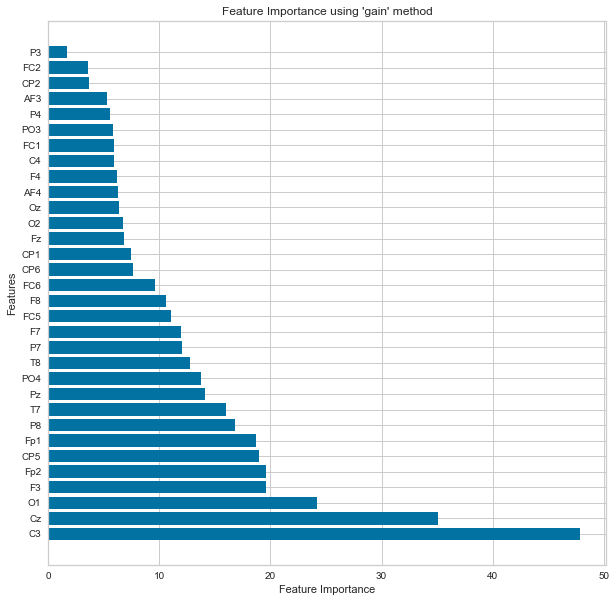

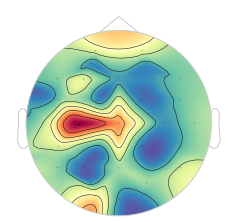

In [85]:
importance = plot_importance(xgb)

In [86]:
import xgboost as xgb
from xgboost import XGBClassifier

In [87]:
X1

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0      1.272718  1.230883  1.217525  1.251449  1.174643  1.177752  1.188140   
1      1.274649  1.222795  1.190128  1.230705  1.170421  1.174026  1.164280   
2      1.255730  1.231268  1.203830  1.228580  1.165853  1.166521  1.164186   
3      1.247601  1.243170  1.200220  1.206562  1.179577  1.179542  1.182123   
4      1.240923  1.230055  1.188557  1.201641  1.167166  1.169438  1.168105   
...         ...       ...       ...       ...       ...       ...       ...   
29915  1.302466  1.334328  1.275179  1.264969  1.184758  1.220660  1.127938   
29916  1.315561  1.315492  1.278695  1.274556  1.197400  1.226832  1.155667   
29917  1.321695  1.312093  1.295262  1.282973  1.194625  1.240488  1.134119   
29918  1.292157  1.312236  1.271227  1.259599  1.167872  1.235927  1.138483   
29919  1.272434  1.299976  1.275698  1.240575  1.146544  1.218745  1.106543   

             C3       CP1       CP5  ...        T8       FC6       FC2  \
0      1.230586  1.236045  1.209684  ...  1.218089  1.186616  1.180885   
1      1.209270  1.215695  1.196882  ...  1.198907  1.171564  1.178251   
2      1.225009  1.212970  1.205846  ...  1.186844  1.150551  1.188550   
3      1.222464  1.212895  1.206303  ...  1.193807  1.169153  1.190600   
4      1.216268  1.189762  1.212374  ...  1.203073  1.175744  1.187055   
...         ...       ...       ...  ...       ...       ...       ...   
29915  1.143201  1.166359  1.089522  ...  1.112756  1.107095  1.168516   
29916  1.154249  1.181887  1.111336  ...  1.137378  1.130894  1.170828   
29917  1.146396  1.174820  1.115087  ...  1.128227  1.122688  1.177031   
29918  1.155709  1.158595  1.111132  ...  1.104042  1.090977  1.164657   
29919  1.143495  1.157530  1.109480  ...  1.099136  1.094972  1.141745   

             F4        F8       AF4       Fp2        Fz        Cz  Y  
0      1.177174  1.276833  1.237486  1.243378  1.170001  1.206382  0  
1      1.173011  1.258353  1.202471  1.226021  1.173059  1.201029  0  
2      1.177356  1.258344  1.199938  1.215850  1.158812  1.192502  0  
3      1.179510  1.254742  1.212006  1.213532  1.188219  1.181259  0  
4      1.172874  1.227501  1.191099  1.192409  1.179803  1.184930  0  
...         ...       ...       ...       ...       ...       ... ..  
29915  1.278714  1.203691  1.260678  1.312566  1.204767  1.123033  1  
29916  1.273741  1.210429  1.280697  1.310561  1.213517  1.125212  1  
29917  1.264657  1.203916  1.294850  1.301086  1.216530  1.153380  1  
29918  1.261629  1.186246  1.288470  1.302348  1.176626  1.139820  1  
29919  1.258826  1.161942  1.280664  1.287315  1.162734  1.122010  1  

[29920 rows x 33 columns]

In [88]:
X3 = X1
X = X3.iloc[:,:-1]
Y = X3['Y']

In [89]:
X

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0      1.272718  1.230883  1.217525  1.251449  1.174643  1.177752  1.188140   
1      1.274649  1.222795  1.190128  1.230705  1.170421  1.174026  1.164280   
2      1.255730  1.231268  1.203830  1.228580  1.165853  1.166521  1.164186   
3      1.247601  1.243170  1.200220  1.206562  1.179577  1.179542  1.182123   
4      1.240923  1.230055  1.188557  1.201641  1.167166  1.169438  1.168105   
...         ...       ...       ...       ...       ...       ...       ...   
29915  1.302466  1.334328  1.275179  1.264969  1.184758  1.220660  1.127938   
29916  1.315561  1.315492  1.278695  1.274556  1.197400  1.226832  1.155667   
29917  1.321695  1.312093  1.295262  1.282973  1.194625  1.240488  1.134119   
29918  1.292157  1.312236  1.271227  1.259599  1.167872  1.235927  1.138483   
29919  1.272434  1.299976  1.275698  1.240575  1.146544  1.218745  1.106543   

             C3       CP1       CP5  ...        C4        T8       FC6  \
0      1.230586  1.236045  1.209684  ...  1.159494  1.218089  1.186616   
1      1.209270  1.215695  1.196882  ...  1.152371  1.198907  1.171564   
2      1.225009  1.212970  1.205846  ...  1.152333  1.186844  1.150551   
3      1.222464  1.212895  1.206303  ...  1.144902  1.193807  1.169153   
4      1.216268  1.189762  1.212374  ...  1.152977  1.203073  1.175744   
...         ...       ...       ...  ...       ...       ...       ...   
29915  1.143201  1.166359  1.089522  ...  1.103484  1.112756  1.107095   
29916  1.154249  1.181887  1.111336  ...  1.117601  1.137378  1.130894   
29917  1.146396  1.174820  1.115087  ...  1.128700  1.128227  1.122688   
29918  1.155709  1.158595  1.111132  ...  1.115410  1.104042  1.090977   
29919  1.143495  1.157530  1.109480  ...  1.105007  1.099136  1.094972   

            FC2        F4        F8       AF4       Fp2        Fz        Cz  
0      1.180885  1.177174  1.276833  1.237486  1.243378  1.170001  1.206382  
1      1.178251  1.173011  1.258353  1.202471  1.226021  1.173059  1.201029  
2      1.188550  1.177356  1.258344  1.199938  1.215850  1.158812  1.192502  
3      1.190600  1.179510  1.254742  1.212006  1.213532  1.188219  1.181259  
4      1.187055  1.172874  1.227501  1.191099  1.192409  1.179803  1.184930  
...         ...       ...       ...       ...       ...       ...       ...  
29915  1.168516  1.278714  1.203691  1.260678  1.312566  1.204767  1.123033  
29916  1.170828  1.273741  1.210429  1.280697  1.310561  1.213517  1.125212  
29917  1.177031  1.264657  1.203916  1.294850  1.301086  1.216530  1.153380  
29918  1.164657  1.261629  1.186246  1.288470  1.302348  1.176626  1.139820  
29919  1.141745  1.258826  1.161942  1.280664  1.287315  1.162734  1.122010  

[29920 rows x 32 columns]

In [90]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
29915    1
29916    1
29917    1
29918    1
29919    1
Name: Y, Length: 29920, dtype: int64

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [92]:
y_train

17937    1
4722     0
646      0
7971     0
15412    1
        ..
28636    1
17730    1
28030    1
15725    1
19966    1
Name: Y, Length: 20046, dtype: int64

In [93]:
X_train

Fp1       AF3        F7        F3       FC1       FC5        T7  \
17937  1.242300  1.212991  1.246169  1.213570  1.193982  1.196880  1.190753   
4722   1.254007  1.266373  1.254869  1.321334  1.207422  1.244146  1.241870   
646    1.190847  1.176990  1.165514  1.147476  1.130408  1.144165  1.169798   
7971   1.186307  1.201778  1.171261  1.172375  1.166659  1.223265  1.245497   
15412  1.121611  1.131985  1.132439  1.154478  1.181461  1.183004  1.222137   
...         ...       ...       ...       ...       ...       ...       ...   
28636  1.143309  1.182695  1.153983  1.197426  1.160705  1.110478  1.069516   
17730  1.242052  1.193151  1.206527  1.138306  1.135193  1.133233  1.135184   
28030  1.136163  1.166493  1.139932  1.167863  1.157699  1.152919  1.143491   
15725  1.138713  1.135587  1.115377  1.146227  1.168492  1.179133  1.174775   
19966  1.174273  1.237761  1.162691  1.168684  1.134329  1.199983  1.112313   

             C3       CP1       CP5  ...        C4        T8       FC6  \
17937  1.161016  1.145566  1.152535  ...  1.113795  1.173228  1.149587   
4722   1.230260  1.151113  1.176362  ...  1.165971  1.300961  1.223933   
646    1.159185  1.142490  1.136071  ...  1.149699  1.152041  1.148767   
7971   1.216422  1.176709  1.163742  ...  1.151886  1.264243  1.265745   
15412  1.121284  1.096896  1.110676  ...  1.118101  1.113003  1.153516   
...         ...       ...       ...  ...       ...       ...       ...   
28636  1.110417  1.203120  1.095191  ...  1.126366  1.123974  1.127978   
17730  1.122413  1.142749  1.135801  ...  1.101870  1.164172  1.154749   
28030  1.168446  1.138749  1.152639  ...  1.139710  1.183760  1.175389   
15725  1.147743  1.142418  1.091528  ...  1.123523  1.172661  1.144483   
19966  1.149826  1.146452  1.137917  ...  1.150791  1.269046  1.285482   

            FC2        F4        F8       AF4       Fp2        Fz        Cz  
17937  1.137546  1.218348  1.196480  1.257437  1.188493  1.164319  1.145938  
4722   1.183664  1.263344  1.228368  1.290472  1.277677  1.234621  1.231346  
646    1.138165  1.122604  1.137121  1.142199  1.126331  1.117127  1.137109  
7971   1.145634  1.203284  1.265879  1.240110  1.180403  1.148728  1.142645  
15412  1.122979  1.106217  1.162117  1.114724  1.119862  1.129535  1.148246  
...         ...       ...       ...       ...       ...       ...       ...  
28636  1.141427  1.177316  1.129407  1.178336  1.224355  1.153527  1.127790  
17730  1.126145  1.161688  1.195857  1.282162  1.166112  1.136710  1.180291  
28030  1.151787  1.173923  1.208498  1.185102  1.161548  1.133932  1.145435  
15725  1.159299  1.144193  1.145194  1.154763  1.130469  1.133510  1.157700  
19966  1.143304  1.199966  1.213175  1.297549  1.237018  1.143170  1.113176  

[20046 rows x 32 columns]

<h3>XGBoost</h3>

In [94]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.74%


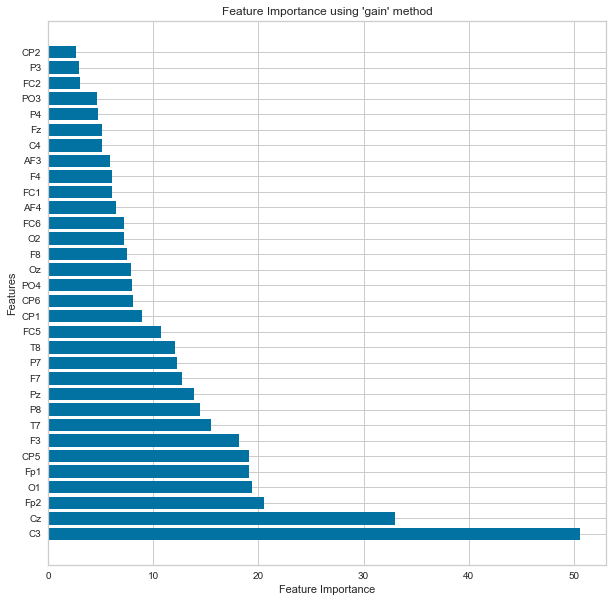

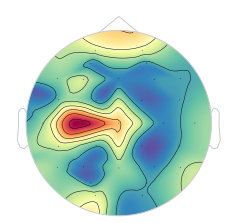

In [95]:
importance1 = plot_importance(model)

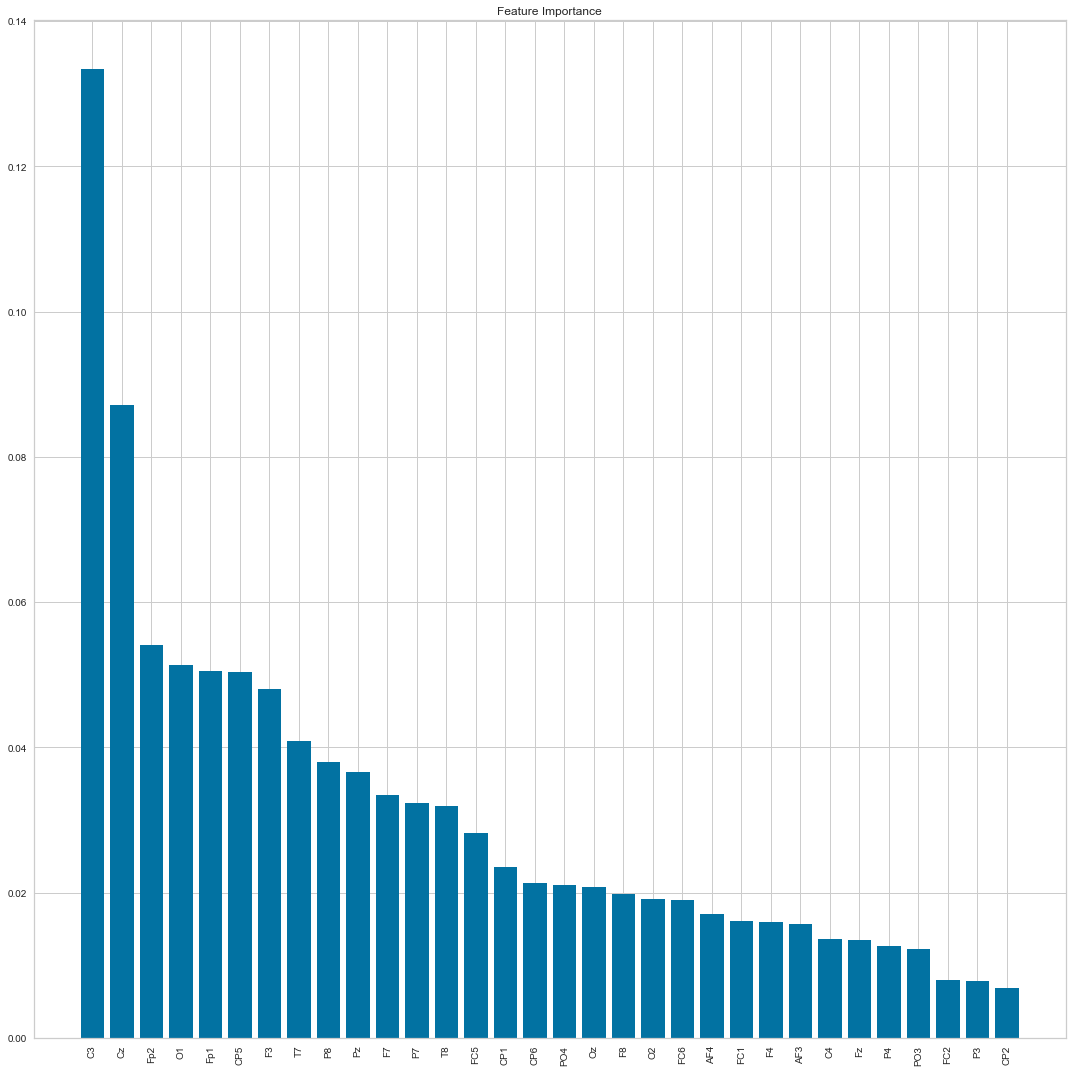

In [96]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

<h2>KNN Classifier</h2>

In [60]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9973668219566538


<h2>n=5 -> 94.80%</h2>

In [41]:
raw.ch_names

['Fp1',
 'AF3',
 'F7',
 'F3',
 'FC1',
 'FC5',
 'T7',
 'C3',
 'CP1',
 'CP5',
 'P7',
 'P3',
 'Pz',
 'PO3',
 'O1',
 'Oz',
 'O2',
 'PO4',
 'P4',
 'P8',
 'CP6',
 'CP2',
 'C4',
 'T8',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'AF4',
 'Fp2',
 'Fz',
 'Cz']

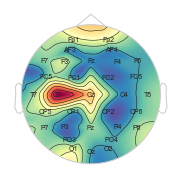

(<matplotlib.image.AxesImage at 0x169c0b521f0>,
 <matplotlib.contour.QuadContourSet at 0x169c0b524c0>)

In [98]:
fig, ax = plt.subplots(figsize=(3,3))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances))/2, vmax=max(importances))
mne.viz.plot_topomap(data=importances, pos=raw.info, show_names=True, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h2>2. Katz</h2>

In [99]:
katz_pd['Y'] = 1
katz['Y'] = 0

In [100]:
X1 = katz.append(katz_pd).reset_index().drop('index', axis=1)
X = X1.iloc[:,:-1]
X1

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0      2.288694  2.261343  1.957151  2.114255  1.901227  2.042649  1.872106   
1      2.271240  1.942415  2.027974  1.843473  1.908158  1.786109  1.800702   
2      1.940628  2.067835  1.866208  2.178841  1.924513  2.013998  1.730977   
3      2.016670  2.138956  1.882197  2.160561  1.754106  1.873918  1.743211   
4      1.941926  1.854944  1.774345  1.909435  2.089550  1.800276  1.731069   
...         ...       ...       ...       ...       ...       ...       ...   
29915  2.273880  2.240037  1.853203  2.066624  1.902269  1.655253  1.455511   
29916  2.429512  2.648021  1.853325  2.330468  2.101536  1.737237  1.550703   
29917  2.232809  2.621895  2.163446  2.500254  2.049216  1.980658  1.742630   
29918  2.326799  2.451778  2.131609  2.342816  2.146675  1.953826  1.713879   
29919  2.388890  2.242660  2.115555  2.228450  1.825508  1.962976  1.685117   

             C3       CP1       CP5  ...        T8       FC6       FC2  \
0      1.760949  1.966785  2.153076  ...  2.273533  2.065337  1.798328   
1      1.913688  1.785070  2.119511  ...  2.287471  2.135288  1.826597   
2      1.635522  1.859220  2.051848  ...  2.288025  2.070668  1.760393   
3      1.568061  1.728979  1.894356  ...  2.084844  1.960826  1.592298   
4      1.672566  1.763378  2.024382  ...  2.109949  1.831585  1.616957   
...         ...       ...       ...  ...       ...       ...       ...   
29915  1.705448  1.995976  1.519806  ...  1.756127  1.687256  2.054365   
29916  1.648882  1.791950  1.489246  ...  1.619034  1.580614  1.802070   
29917  1.946400  2.001467  1.715268  ...  1.671359  1.661265  2.014919   
29918  1.895048  2.154152  1.879994  ...  1.691163  1.753858  1.981460   
29919  1.928179  1.976264  1.825972  ...  1.715186  1.629030  1.909944   

             F4        F8       AF4       Fp2        Fz        Cz  Y  
0      1.956942  2.221768  2.133967  1.964263  2.013900  1.824711  0  
1      1.831944  2.061051  2.015384  2.022400  1.804499  1.867882  0  
2      1.797831  2.127728  2.215672  2.149643  1.986197  1.788811  0  
3      1.727301  1.972872  2.114864  1.937659  1.940941  1.984725  0  
4      1.727273  2.070163  1.997455  1.802772  1.836918  2.058511  0  
...         ...       ...       ...       ...       ...       ... ..  
29915  2.364443  1.859390  2.451252  2.713914  2.200910  1.820856  1  
29916  2.209148  1.674591  2.041000  2.514249  1.829933  1.768632  1  
29917  2.478721  1.767663  2.494465  2.196929  2.227738  1.939562  1  
29918  2.131307  1.931789  2.245645  2.718037  2.021489  2.124850  1  
29919  2.475002  1.771426  2.319296  2.124985  2.048622  2.001551  1  

[29920 rows x 33 columns]

<h2>Pycaret</h2>

In [101]:
clf = setup(data=X1, target='Y')

In [48]:
compare_models(fold=15)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=8702, reg_alpha=0, ...)

In [102]:
xgb = create_model('xgboost', fold=15)

<b>QDA - 78.26<br><b>LGBM - 76.75<br><b>XGboost - 75.90</b>

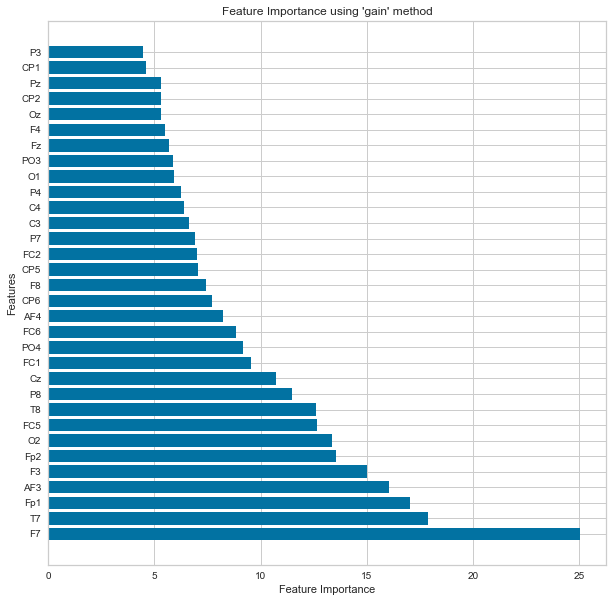

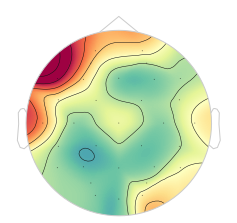

In [103]:
importance = plot_importance(xgb)

In [49]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [104]:
import xgboost as xgb
from xgboost import XGBClassifier

In [105]:
X3 = X1
X = X3.iloc[:,:-1]
Y = X3['Y']

In [106]:
X

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0      2.288694  2.261343  1.957151  2.114255  1.901227  2.042649  1.872106   
1      2.271240  1.942415  2.027974  1.843473  1.908158  1.786109  1.800702   
2      1.940628  2.067835  1.866208  2.178841  1.924513  2.013998  1.730977   
3      2.016670  2.138956  1.882197  2.160561  1.754106  1.873918  1.743211   
4      1.941926  1.854944  1.774345  1.909435  2.089550  1.800276  1.731069   
...         ...       ...       ...       ...       ...       ...       ...   
29915  2.273880  2.240037  1.853203  2.066624  1.902269  1.655253  1.455511   
29916  2.429512  2.648021  1.853325  2.330468  2.101536  1.737237  1.550703   
29917  2.232809  2.621895  2.163446  2.500254  2.049216  1.980658  1.742630   
29918  2.326799  2.451778  2.131609  2.342816  2.146675  1.953826  1.713879   
29919  2.388890  2.242660  2.115555  2.228450  1.825508  1.962976  1.685117   

             C3       CP1       CP5  ...        C4        T8       FC6  \
0      1.760949  1.966785  2.153076  ...  2.265941  2.273533  2.065337   
1      1.913688  1.785070  2.119511  ...  2.231307  2.287471  2.135288   
2      1.635522  1.859220  2.051848  ...  2.035051  2.288025  2.070668   
3      1.568061  1.728979  1.894356  ...  2.130167  2.084844  1.960826   
4      1.672566  1.763378  2.024382  ...  2.100656  2.109949  1.831585   
...         ...       ...       ...  ...       ...       ...       ...   
29915  1.705448  1.995976  1.519806  ...  1.757780  1.756127  1.687256   
29916  1.648882  1.791950  1.489246  ...  1.689206  1.619034  1.580614   
29917  1.946400  2.001467  1.715268  ...  1.860141  1.671359  1.661265   
29918  1.895048  2.154152  1.879994  ...  1.830872  1.691163  1.753858   
29919  1.928179  1.976264  1.825972  ...  1.821216  1.715186  1.629030   

            FC2        F4        F8       AF4       Fp2        Fz        Cz  
0      1.798328  1.956942  2.221768  2.133967  1.964263  2.013900  1.824711  
1      1.826597  1.831944  2.061051  2.015384  2.022400  1.804499  1.867882  
2      1.760393  1.797831  2.127728  2.215672  2.149643  1.986197  1.788811  
3      1.592298  1.727301  1.972872  2.114864  1.937659  1.940941  1.984725  
4      1.616957  1.727273  2.070163  1.997455  1.802772  1.836918  2.058511  
...         ...       ...       ...       ...       ...       ...       ...  
29915  2.054365  2.364443  1.859390  2.451252  2.713914  2.200910  1.820856  
29916  1.802070  2.209148  1.674591  2.041000  2.514249  1.829933  1.768632  
29917  2.014919  2.478721  1.767663  2.494465  2.196929  2.227738  1.939562  
29918  1.981460  2.131307  1.931789  2.245645  2.718037  2.021489  2.124850  
29919  1.909944  2.475002  1.771426  2.319296  2.124985  2.048622  2.001551  

[29920 rows x 32 columns]

In [107]:
Y = X1['Y']
Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [108]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.16%


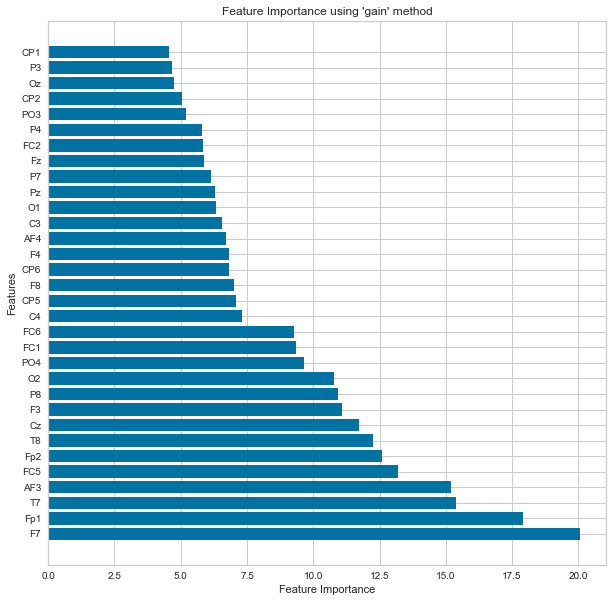

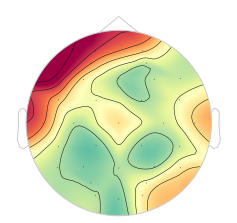

In [115]:
importance1 = plot_importance(model)

In [112]:
type(importance[0])

str

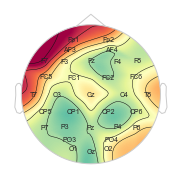

(<matplotlib.image.AxesImage at 0x169ce4799d0>,
 <matplotlib.contour.QuadContourSet at 0x169ce479790>)

In [116]:
fig, ax = plt.subplots(figsize=(3,3))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importance1))/2, vmax=max(importance1))
mne.viz.plot_topomap(data=importance1, pos=raw.info, names=raw.ch_names, \
                     show_names=True, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h2>3. Petrosian</h2>

In [117]:
petrosian_pd['Y'] = 1
petrosian['Y'] = 0

In [118]:
X1 = petrosian.append(petrosian_pd).reset_index().drop('index', axis=1)
X1

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0      1.008246  1.007155  1.007883  1.007883  1.006546  1.006546  1.007155   
1      1.008246  1.007033  1.007640  1.007761  1.006668  1.006546  1.006790   
2      1.008004  1.007519  1.007640  1.007640  1.006180  1.006424  1.006668   
3      1.008004  1.007398  1.007761  1.007276  1.006302  1.006668  1.007033   
4      1.007519  1.007276  1.007761  1.007276  1.006302  1.006911  1.007033   
...         ...       ...       ...       ...       ...       ...       ...   
29915  1.008246  1.008488  1.007883  1.008850  1.006911  1.007276  1.006790   
29916  1.008367  1.008367  1.008125  1.008850  1.007155  1.007519  1.006668   
29917  1.008488  1.008488  1.008004  1.008609  1.006668  1.007883  1.006911   
29918  1.008609  1.008367  1.008004  1.008246  1.006180  1.008004  1.006668   
29919  1.008609  1.008125  1.008246  1.008246  1.006058  1.008004  1.006302   

             C3       CP1       CP5  ...        T8       FC6       FC2  \
0      1.007883  1.006911  1.007398  ...  1.007033  1.006302  1.006911   
1      1.008246  1.007155  1.007155  ...  1.006790  1.006424  1.007033   
2      1.008004  1.006790  1.006790  ...  1.006546  1.006180  1.007155   
3      1.008004  1.006790  1.007033  ...  1.006790  1.006546  1.006790   
4      1.007883  1.006668  1.007155  ...  1.006911  1.006911  1.006790   
...         ...       ...       ...  ...       ...       ...       ...   
29915  1.006058  1.007033  1.005202  ...  1.005202  1.005447  1.005936   
29916  1.006058  1.007398  1.005447  ...  1.005447  1.005692  1.006058   
29917  1.005692  1.006790  1.005814  ...  1.005325  1.005202  1.005936   
29918  1.005692  1.006911  1.005692  ...  1.005080  1.004957  1.005936   
29919  1.005570  1.006546  1.005570  ...  1.005080  1.004834  1.005936   

             F4        F8       AF4       Fp2        Fz        Cz  Y  
0      1.007033  1.008125  1.007640  1.007761  1.006911  1.007155  0  
1      1.007398  1.007883  1.007398  1.008004  1.006790  1.007033  0  
2      1.006911  1.007883  1.007640  1.007761  1.007033  1.006546  0  
3      1.006790  1.007519  1.007276  1.007519  1.006790  1.006546  0  
4      1.006546  1.007398  1.007155  1.007033  1.006911  1.006424  0  
...         ...       ...       ...       ...       ...       ... ..  
29915  1.007398  1.007519  1.007761  1.007761  1.007033  1.005325  1  
29916  1.007276  1.007155  1.008125  1.008004  1.006790  1.005936  1  
29917  1.007155  1.006790  1.008246  1.007761  1.006668  1.006424  1  
29918  1.007276  1.006911  1.008367  1.007883  1.006424  1.006424  1  
29919  1.007276  1.006911  1.008488  1.007761  1.006058  1.006424  1  

[29920 rows x 33 columns]

<h2>Pycaret</h2>

In [119]:
clf = setup(data=X1, target='Y')

In [63]:
compare_models(fold=15)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [64]:
knn = create_model('knn', n_neighbors=5, leaf_size=30, p=2, weights='uniform', metric='minkowski', algorithm='auto', fold=15)

In [120]:
et = create_model('et', fold=15)

In [121]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

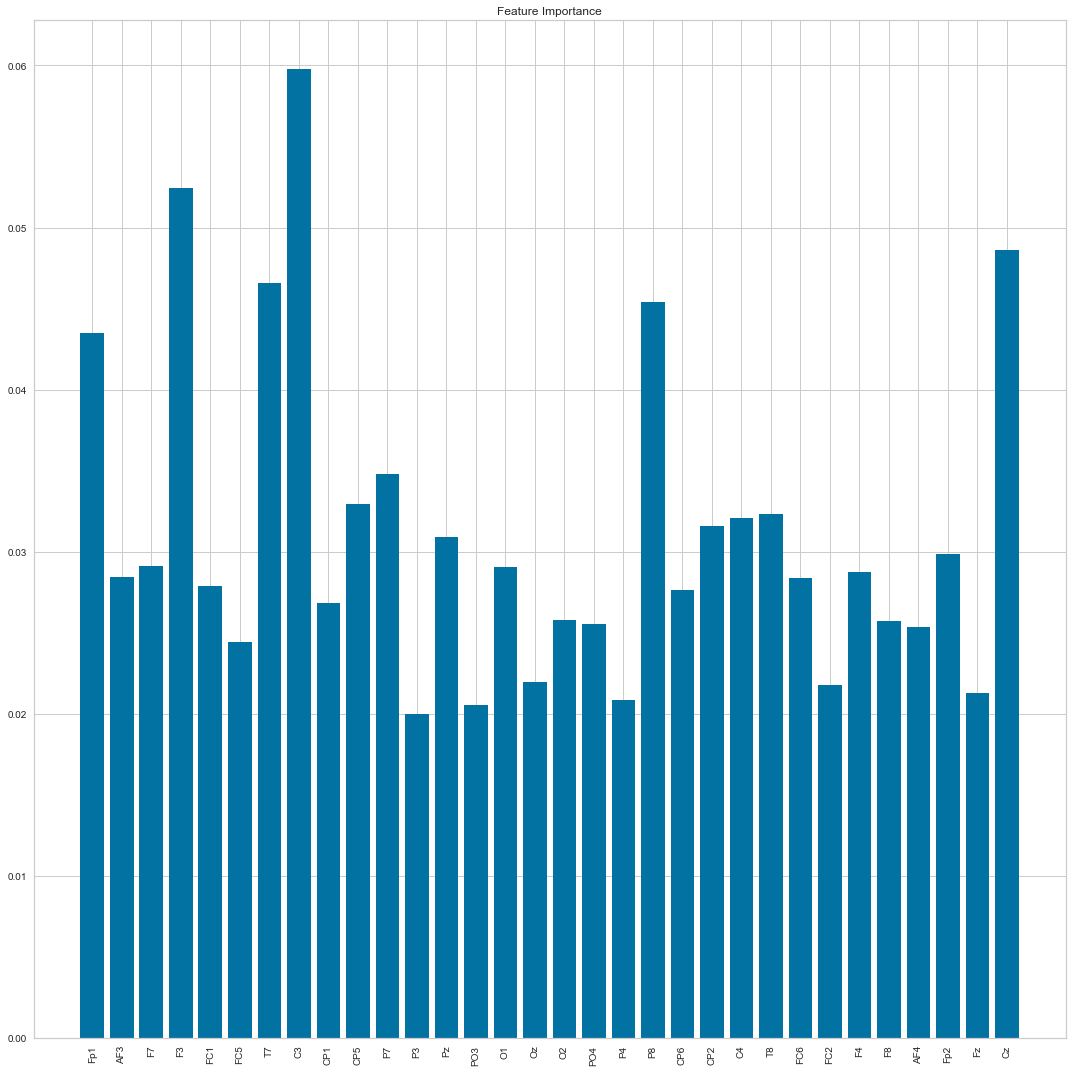

In [123]:
importances = et.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

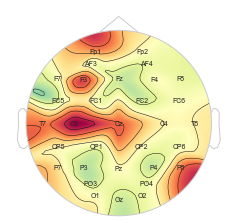

(<matplotlib.image.AxesImage at 0x169caa579a0>,
 <matplotlib.contour.QuadContourSet at 0x169ca1a9940>)

In [125]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances))/2, vmax=max(importances))
mne.viz.plot_topomap(data=importances, show_names=True, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

In [126]:
xgb = create_model('xgboost', fold=15)

In [127]:
evaluate_model(xgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

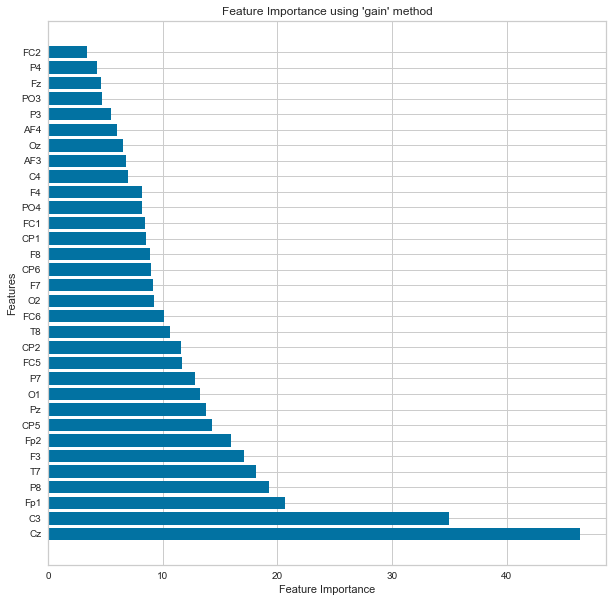

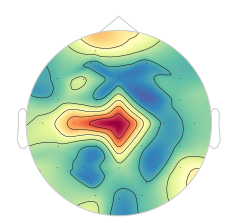

In [128]:
importances_xgb = plot_importance(xgb)

<h3>KNN gives highest - 91.17% for k=5</h3>

In [131]:
X3 = X1
X = X3.iloc[:,:-1]
Y = X3['Y']

In [132]:
#X = X1.iloc[:, :-1]
X

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0      1.008246  1.007155  1.007883  1.007883  1.006546  1.006546  1.007155   
1      1.008246  1.007033  1.007640  1.007761  1.006668  1.006546  1.006790   
2      1.008004  1.007519  1.007640  1.007640  1.006180  1.006424  1.006668   
3      1.008004  1.007398  1.007761  1.007276  1.006302  1.006668  1.007033   
4      1.007519  1.007276  1.007761  1.007276  1.006302  1.006911  1.007033   
...         ...       ...       ...       ...       ...       ...       ...   
29915  1.008246  1.008488  1.007883  1.008850  1.006911  1.007276  1.006790   
29916  1.008367  1.008367  1.008125  1.008850  1.007155  1.007519  1.006668   
29917  1.008488  1.008488  1.008004  1.008609  1.006668  1.007883  1.006911   
29918  1.008609  1.008367  1.008004  1.008246  1.006180  1.008004  1.006668   
29919  1.008609  1.008125  1.008246  1.008246  1.006058  1.008004  1.006302   

             C3       CP1       CP5  ...        C4        T8       FC6  \
0      1.007883  1.006911  1.007398  ...  1.006058  1.007033  1.006302   
1      1.008246  1.007155  1.007155  ...  1.006180  1.006790  1.006424   
2      1.008004  1.006790  1.006790  ...  1.005936  1.006546  1.006180   
3      1.008004  1.006790  1.007033  ...  1.006302  1.006790  1.006546   
4      1.007883  1.006668  1.007155  ...  1.006302  1.006911  1.006911   
...         ...       ...       ...  ...       ...       ...       ...   
29915  1.006058  1.007033  1.005202  ...  1.004834  1.005202  1.005447   
29916  1.006058  1.007398  1.005447  ...  1.005447  1.005447  1.005692   
29917  1.005692  1.006790  1.005814  ...  1.005202  1.005325  1.005202   
29918  1.005692  1.006911  1.005692  ...  1.004957  1.005080  1.004957   
29919  1.005570  1.006546  1.005570  ...  1.004957  1.005080  1.004834   

            FC2        F4        F8       AF4       Fp2        Fz        Cz  
0      1.006911  1.007033  1.008125  1.007640  1.007761  1.006911  1.007155  
1      1.007033  1.007398  1.007883  1.007398  1.008004  1.006790  1.007033  
2      1.007155  1.006911  1.007883  1.007640  1.007761  1.007033  1.006546  
3      1.006790  1.006790  1.007519  1.007276  1.007519  1.006790  1.006546  
4      1.006790  1.006546  1.007398  1.007155  1.007033  1.006911  1.006424  
...         ...       ...       ...       ...       ...       ...       ...  
29915  1.005936  1.007398  1.007519  1.007761  1.007761  1.007033  1.005325  
29916  1.006058  1.007276  1.007155  1.008125  1.008004  1.006790  1.005936  
29917  1.005936  1.007155  1.006790  1.008246  1.007761  1.006668  1.006424  
29918  1.005936  1.007276  1.006911  1.008367  1.007883  1.006424  1.006424  
29919  1.005936  1.007276  1.006911  1.008488  1.007761  1.006058  1.006424  

[29920 rows x 32 columns]

In [133]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
29915    1
29916    1
29917    1
29918    1
29919    1
Name: Y, Length: 29920, dtype: int64

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [135]:
y_train

17937    1
4722     0
646      0
7971     0
15412    1
        ..
28636    1
17730    1
28030    1
15725    1
19966    1
Name: Y, Length: 20046, dtype: int64

In [136]:
X_train

Fp1       AF3        F7        F3       FC1       FC5        T7  \
17937  1.008004  1.007761  1.007519  1.007276  1.006911  1.006424  1.006911   
4722   1.007761  1.008004  1.008850  1.008729  1.007155  1.007640  1.007640   
646    1.007398  1.006058  1.006302  1.005936  1.005570  1.006790  1.006180   
7971   1.007155  1.006911  1.006911  1.006911  1.005936  1.006911  1.007640   
15412  1.005447  1.006546  1.005814  1.007033  1.006911  1.007883  1.008004   
...         ...       ...       ...       ...       ...       ...       ...   
28636  1.006058  1.007276  1.006058  1.006546  1.006668  1.006424  1.004589   
17730  1.007398  1.006911  1.007761  1.005814  1.006180  1.006302  1.005570   
28030  1.006180  1.006546  1.006058  1.007033  1.006790  1.006546  1.005570   
15725  1.006058  1.005936  1.005814  1.005936  1.006546  1.006180  1.006911   
19966  1.007398  1.007033  1.006790  1.007033  1.005080  1.006911  1.005325   

             C3       CP1       CP5  ...        C4        T8       FC6  \
17937  1.006546  1.005692  1.006668  ...  1.005570  1.007276  1.006058   
4722   1.006668  1.005447  1.007155  ...  1.006424  1.008367  1.007519   
646    1.006058  1.006058  1.005814  ...  1.006302  1.005936  1.006180   
7971   1.006911  1.006424  1.006058  ...  1.005570  1.007761  1.008488   
15412  1.006058  1.004957  1.004712  ...  1.005570  1.006302  1.006302   
...         ...       ...       ...  ...       ...       ...       ...   
28636  1.006058  1.007276  1.004589  ...  1.005447  1.005692  1.005202   
17730  1.006058  1.005936  1.006546  ...  1.006058  1.007276  1.007155   
28030  1.006546  1.005814  1.005692  ...  1.006058  1.006790  1.007033   
15725  1.006790  1.005936  1.005325  ...  1.005202  1.006424  1.005692   
19966  1.006546  1.005202  1.005814  ...  1.005936  1.008488  1.007761   

            FC2        F4        F8       AF4       Fp2        Fz        Cz  
17937  1.005814  1.007883  1.006790  1.007519  1.006790  1.006790  1.006668  
4722   1.007398  1.008125  1.007033  1.008609  1.008004  1.007640  1.007398  
646    1.005202  1.005570  1.005692  1.006180  1.005570  1.005570  1.006058  
7971   1.005570  1.007155  1.008367  1.007640  1.006424  1.005692  1.005202  
15412  1.005202  1.005447  1.007155  1.005570  1.006424  1.005936  1.006546  
...         ...       ...       ...       ...       ...       ...       ...  
28636  1.005936  1.006546  1.005936  1.006058  1.008125  1.006424  1.006180  
17730  1.005936  1.006424  1.007155  1.008367  1.006911  1.005936  1.006790  
28030  1.006180  1.006668  1.006911  1.007276  1.006790  1.006668  1.005936  
15725  1.006424  1.005936  1.006424  1.006058  1.005692  1.005447  1.006302  
19966  1.005325  1.006790  1.007640  1.008609  1.007640  1.005325  1.005325  

[20046 rows x 32 columns]

In [71]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9893660117480251


<h2>XGBoost</h2>

In [137]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.68%


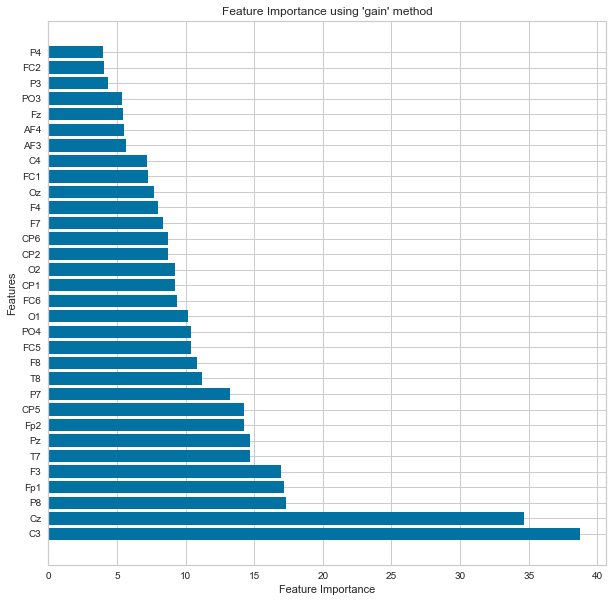

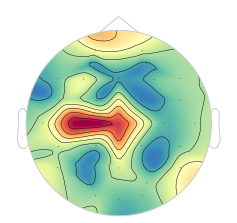

In [138]:
importances1 = plot_importance(model)

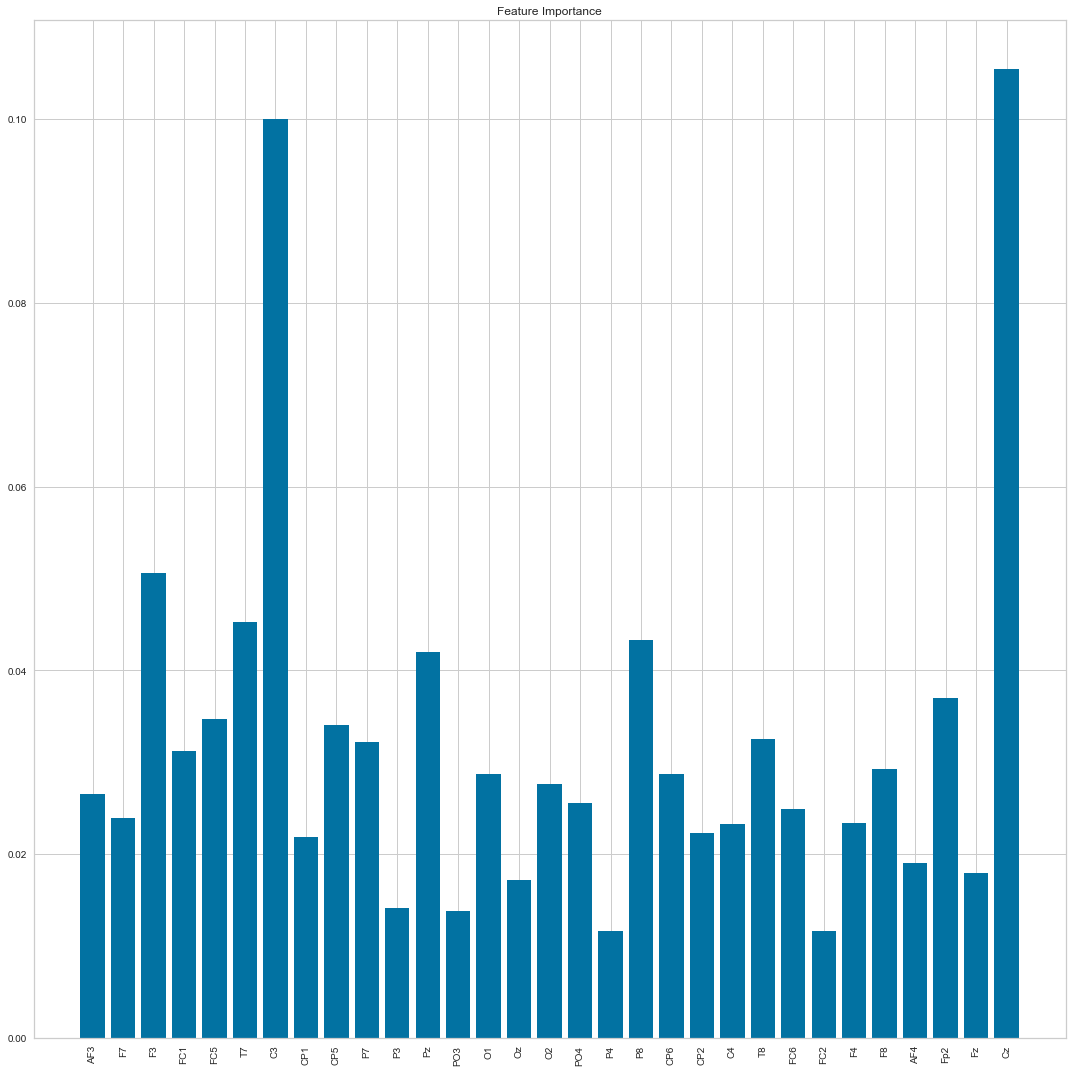

In [74]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

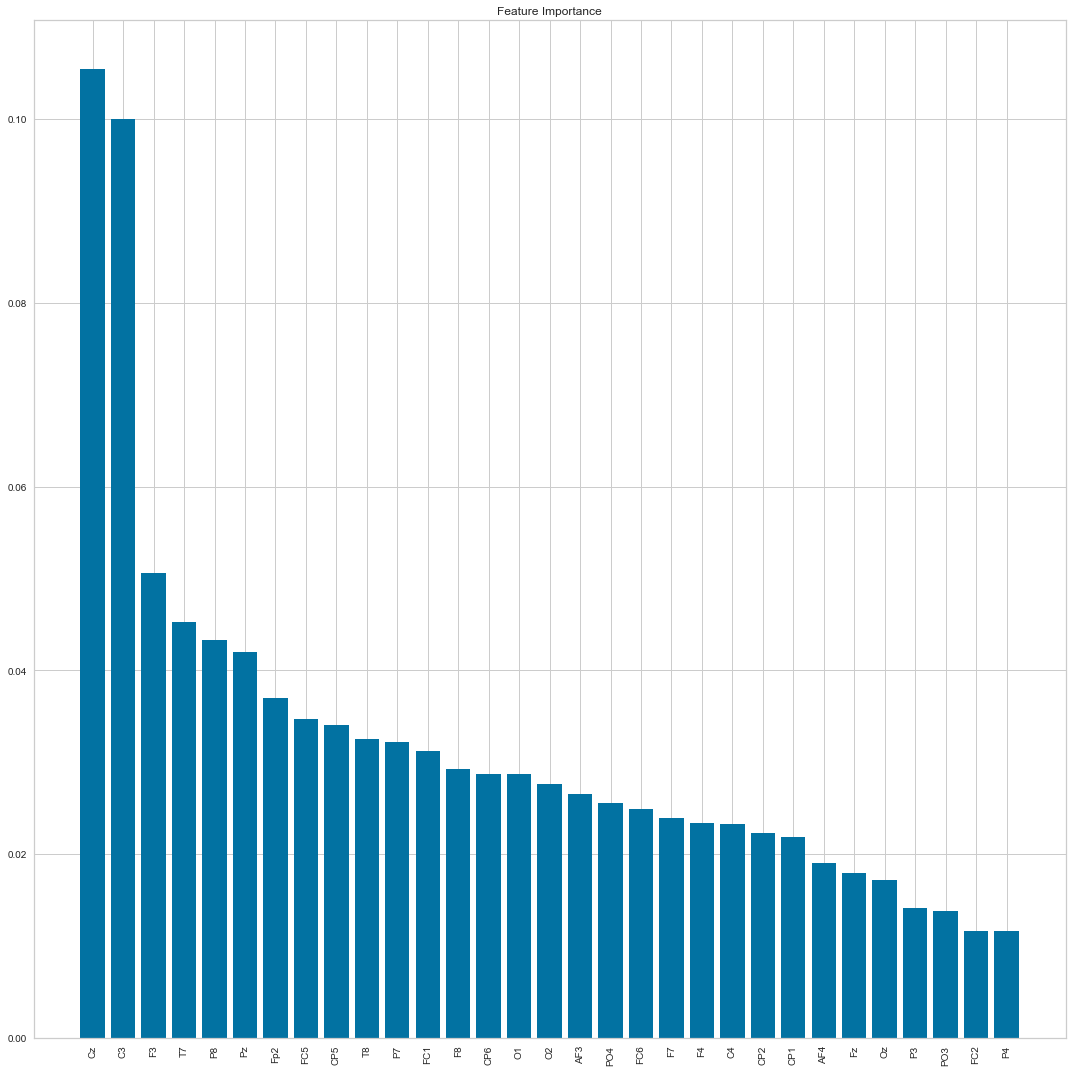

In [75]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [76]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.02659116, 0.02388841, 0.05059079, 0.03122246,
       0.03467944, 0.04524683, 0.09999699, 0.02188302, 0.03410388,
       0.03222184, 0.01415813, 0.04205283, 0.01384732, 0.02868412,
       0.01723251, 0.02763917, 0.0255864 , 0.01161441, 0.04329266,
       0.02875729, 0.02231336, 0.02327479, 0.03247539, 0.02487771,
       0.01164681, 0.02333245, 0.02927809, 0.01906677, 0.03700412,
       0.01796455, 0.10547625])

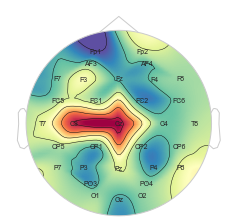

(<matplotlib.image.AxesImage at 0x256442638b0>,
 <matplotlib.contour.QuadContourSet at 0x25644263b50>)

In [77]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, show_names=True, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h2>4. Spectral Entropy</h2>

In [139]:
spec_ent_pd['Y'] = 1
spec_ent['Y'] = 0

In [140]:
X1 = spec_ent.append(spec_ent_pd).reset_index().drop('index', axis=1)
X1

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0      0.593967  0.601235  0.498436  0.591953  0.563955  0.563122  0.553224   
1      0.614138  0.607232  0.506640  0.591044  0.566440  0.557145  0.544182   
2      0.603545  0.592898  0.526742  0.554479  0.560185  0.546910  0.520545   
3      0.597484  0.588534  0.542518  0.584253  0.561445  0.565588  0.523113   
4      0.593893  0.606251  0.544915  0.583564  0.555708  0.541626  0.529886   
...         ...       ...       ...       ...       ...       ...       ...   
29915  0.582344  0.617095  0.508996  0.609488  0.564630  0.537744  0.420671   
29916  0.590508  0.619190  0.526174  0.608025  0.528527  0.554011  0.489189   
29917  0.589718  0.617652  0.510845  0.610871  0.547688  0.545353  0.486477   
29918  0.596477  0.609560  0.501755  0.609975  0.551250  0.535818  0.462978   
29919  0.605421  0.612176  0.510427  0.585492  0.496786  0.541082  0.482486   

             C3       CP1       CP5  ...        T8       FC6       FC2  \
0      0.494111  0.429831  0.587258  ...  0.613855  0.556259  0.371323   
1      0.473788  0.417434  0.575476  ...  0.598543  0.547647  0.430053   
2      0.497092  0.435798  0.576644  ...  0.586474  0.567684  0.429973   
3      0.487036  0.409150  0.603123  ...  0.600176  0.551018  0.483833   
4      0.517733  0.485719  0.581710  ...  0.583697  0.561011  0.546970   
...         ...       ...       ...  ...       ...       ...       ...   
29915  0.517055  0.543404  0.430285  ...  0.399515  0.394880  0.561543   
29916  0.533756  0.536110  0.438087  ...  0.413793  0.428625  0.521214   
29917  0.513008  0.551001  0.444994  ...  0.396075  0.388548  0.510680   
29918  0.487817  0.538834  0.438963  ...  0.426350  0.424775  0.516870   
29919  0.488282  0.526028  0.435384  ...  0.427121  0.421981  0.453984   

             F4        F8       AF4       Fp2        Fz        Cz  Y  
0      0.439225  0.494452  0.552718  0.523264  0.560992  0.543731  0  
1      0.476861  0.524949  0.578967  0.586756  0.553241  0.537679  0  
2      0.487659  0.504153  0.594890  0.579253  0.569723  0.564027  0  
3      0.451305  0.517955  0.588549  0.574537  0.575964  0.568325  0  
4      0.466231  0.527657  0.590284  0.574503  0.562033  0.546991  0  
...         ...       ...       ...       ...       ...       ... ..  
29915  0.596860  0.409361  0.591391  0.603197  0.570853  0.520504  1  
29916  0.593514  0.451607  0.600515  0.603231  0.526303  0.489447  1  
29917  0.564740  0.427891  0.596123  0.605524  0.518556  0.483152  1  
29918  0.587804  0.462513  0.611604  0.613915  0.539440  0.477173  1  
29919  0.569051  0.514775  0.591692  0.597198  0.465400  0.450125  1  

[29920 rows x 33 columns]

In [141]:
clf = setup(data=X1, target='Y')

In [81]:
compare_models(fold=15)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [142]:
xgb = create_model('xgboost', fold=15)

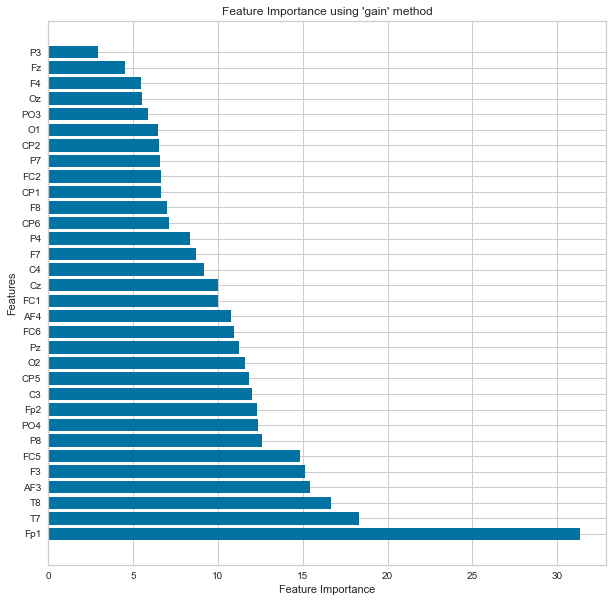

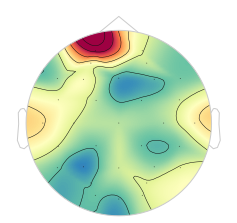

In [143]:
importances = plot_importance(xgb)

In [151]:
X3 = X1
X = X3.iloc[:,:-1]
Y = X3['Y']

In [152]:
X

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0      0.593967  0.601235  0.498436  0.591953  0.563955  0.563122  0.553224   
1      0.614138  0.607232  0.506640  0.591044  0.566440  0.557145  0.544182   
2      0.603545  0.592898  0.526742  0.554479  0.560185  0.546910  0.520545   
3      0.597484  0.588534  0.542518  0.584253  0.561445  0.565588  0.523113   
4      0.593893  0.606251  0.544915  0.583564  0.555708  0.541626  0.529886   
...         ...       ...       ...       ...       ...       ...       ...   
29915  0.582344  0.617095  0.508996  0.609488  0.564630  0.537744  0.420671   
29916  0.590508  0.619190  0.526174  0.608025  0.528527  0.554011  0.489189   
29917  0.589718  0.617652  0.510845  0.610871  0.547688  0.545353  0.486477   
29918  0.596477  0.609560  0.501755  0.609975  0.551250  0.535818  0.462978   
29919  0.605421  0.612176  0.510427  0.585492  0.496786  0.541082  0.482486   

             C3       CP1       CP5  ...        C4        T8       FC6  \
0      0.494111  0.429831  0.587258  ...  0.577837  0.613855  0.556259   
1      0.473788  0.417434  0.575476  ...  0.560025  0.598543  0.547647   
2      0.497092  0.435798  0.576644  ...  0.584703  0.586474  0.567684   
3      0.487036  0.409150  0.603123  ...  0.550563  0.600176  0.551018   
4      0.517733  0.485719  0.581710  ...  0.560732  0.583697  0.561011   
...         ...       ...       ...  ...       ...       ...       ...   
29915  0.517055  0.543404  0.430285  ...  0.458975  0.399515  0.394880   
29916  0.533756  0.536110  0.438087  ...  0.454602  0.413793  0.428625   
29917  0.513008  0.551001  0.444994  ...  0.449460  0.396075  0.388548   
29918  0.487817  0.538834  0.438963  ...  0.457649  0.426350  0.424775   
29919  0.488282  0.526028  0.435384  ...  0.410330  0.427121  0.421981   

            FC2        F4        F8       AF4       Fp2        Fz        Cz  
0      0.371323  0.439225  0.494452  0.552718  0.523264  0.560992  0.543731  
1      0.430053  0.476861  0.524949  0.578967  0.586756  0.553241  0.537679  
2      0.429973  0.487659  0.504153  0.594890  0.579253  0.569723  0.564027  
3      0.483833  0.451305  0.517955  0.588549  0.574537  0.575964  0.568325  
4      0.546970  0.466231  0.527657  0.590284  0.574503  0.562033  0.546991  
...         ...       ...       ...       ...       ...       ...       ...  
29915  0.561543  0.596860  0.409361  0.591391  0.603197  0.570853  0.520504  
29916  0.521214  0.593514  0.451607  0.600515  0.603231  0.526303  0.489447  
29917  0.510680  0.564740  0.427891  0.596123  0.605524  0.518556  0.483152  
29918  0.516870  0.587804  0.462513  0.611604  0.613915  0.539440  0.477173  
29919  0.453984  0.569051  0.514775  0.591692  0.597198  0.465400  0.450125  

[29920 rows x 32 columns]

In [153]:
Y = X3['Y']
Y

0        0
1        0
2        0
3        0
4        0
        ..
29915    1
29916    1
29917    1
29918    1
29919    1
Name: Y, Length: 29920, dtype: int64

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [155]:
X_train

Fp1       AF3        F7        F3       FC1       FC5        T7  \
17937  0.575658  0.550792  0.559634  0.542688  0.519563  0.528486  0.521174   
4722   0.585791  0.592925  0.601985  0.605804  0.537036  0.498238  0.594650   
646    0.530773  0.571302  0.556995  0.537513  0.505331  0.553562  0.583957   
7971   0.564203  0.567708  0.538386  0.579861  0.568582  0.587817  0.588293   
15412  0.511100  0.516309  0.489089  0.541082  0.520350  0.507409  0.586545   
...         ...       ...       ...       ...       ...       ...       ...   
28636  0.484126  0.543405  0.466823  0.537573  0.508653  0.441881  0.415333   
17730  0.476183  0.420499  0.395493  0.425986  0.421492  0.354032  0.338227   
28030  0.528492  0.532562  0.473694  0.558329  0.527974  0.517093  0.466921   
15725  0.543307  0.539727  0.525338  0.540373  0.546839  0.578378  0.567924   
19966  0.526593  0.522147  0.456440  0.548104  0.521343  0.536505  0.444966   

             C3       CP1       CP5  ...        C4        T8       FC6  \
17937  0.528748  0.512096  0.468356  ...  0.470251  0.455672  0.467404   
4722   0.580076  0.423515  0.437232  ...  0.442308  0.558418  0.481211   
646    0.567529  0.526465  0.498207  ...  0.548257  0.532768  0.535262   
7971   0.458163  0.497043  0.548420  ...  0.494329  0.624299  0.602224   
15412  0.458622  0.498102  0.507072  ...  0.494454  0.496772  0.518099   
...         ...       ...       ...  ...       ...       ...       ...   
28636  0.415258  0.529543  0.467207  ...  0.463284  0.387946  0.433179   
17730  0.452726  0.391502  0.398165  ...  0.419072  0.447629  0.424797   
28030  0.551786  0.518343  0.472399  ...  0.533051  0.567050  0.570825   
15725  0.540370  0.532226  0.508693  ...  0.504858  0.539676  0.545627   
19966  0.530076  0.514006  0.519422  ...  0.553786  0.613056  0.622337   

            FC2        F4        F8       AF4       Fp2        Fz        Cz  
17937  0.521841  0.540214  0.515645  0.585407  0.476391  0.505308  0.530684  
4722   0.538825  0.596612  0.543476  0.574343  0.610998  0.543530  0.529764  
646    0.541397  0.496903  0.533383  0.518858  0.507439  0.504810  0.511881  
7971   0.538878  0.589289  0.592444  0.583649  0.545467  0.557953  0.565255  
15412  0.497086  0.489436  0.525040  0.500860  0.504014  0.489506  0.429227  
...         ...       ...       ...       ...       ...       ...       ...  
28636  0.500660  0.529148  0.452526  0.529289  0.563786  0.534802  0.509882  
17730  0.448072  0.453885  0.480705  0.591819  0.486262  0.450578  0.499650  
28030  0.525874  0.558629  0.564510  0.569577  0.553864  0.539536  0.567767  
15725  0.534855  0.546123  0.561236  0.559176  0.546399  0.539756  0.556781  
19966  0.546319  0.587676  0.594225  0.608220  0.602295  0.532518  0.501116  

[20046 rows x 32 columns]

In [156]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.18%


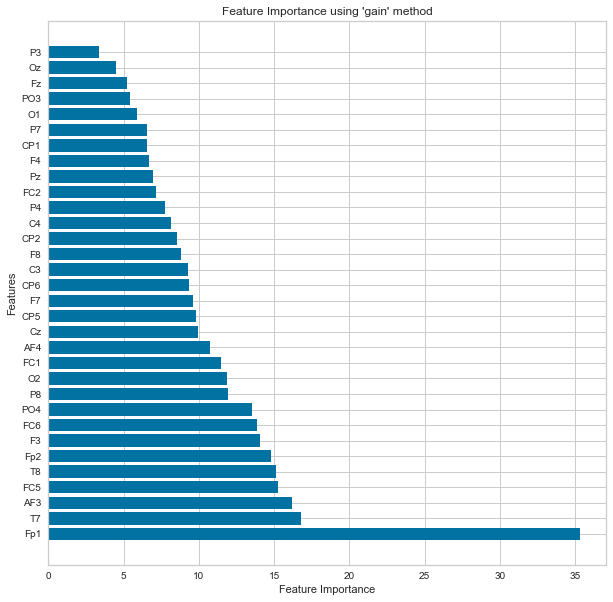

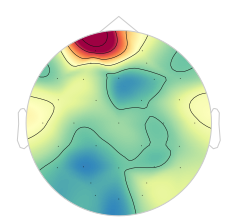

In [157]:
importances1 = plot_importance(model)

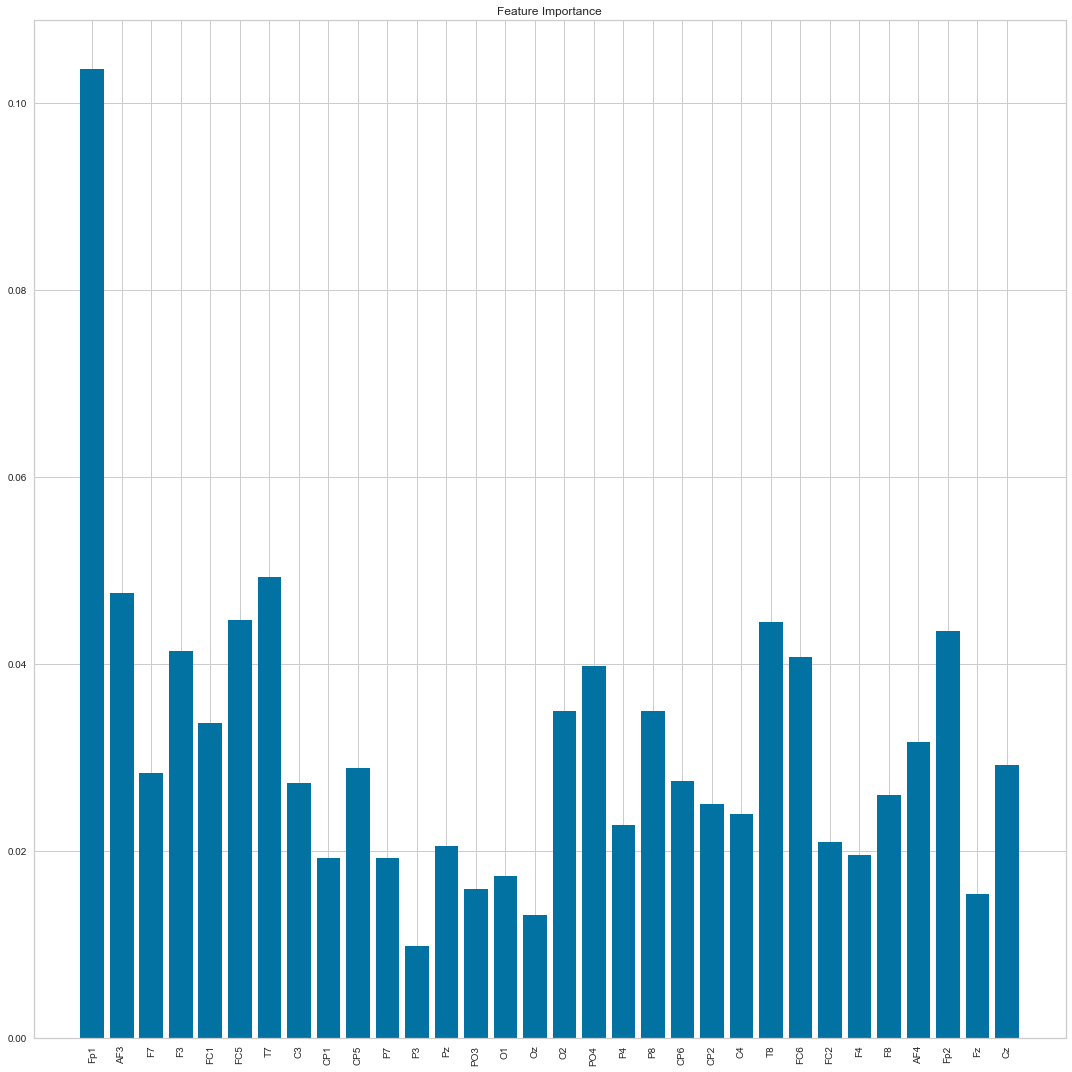

In [158]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

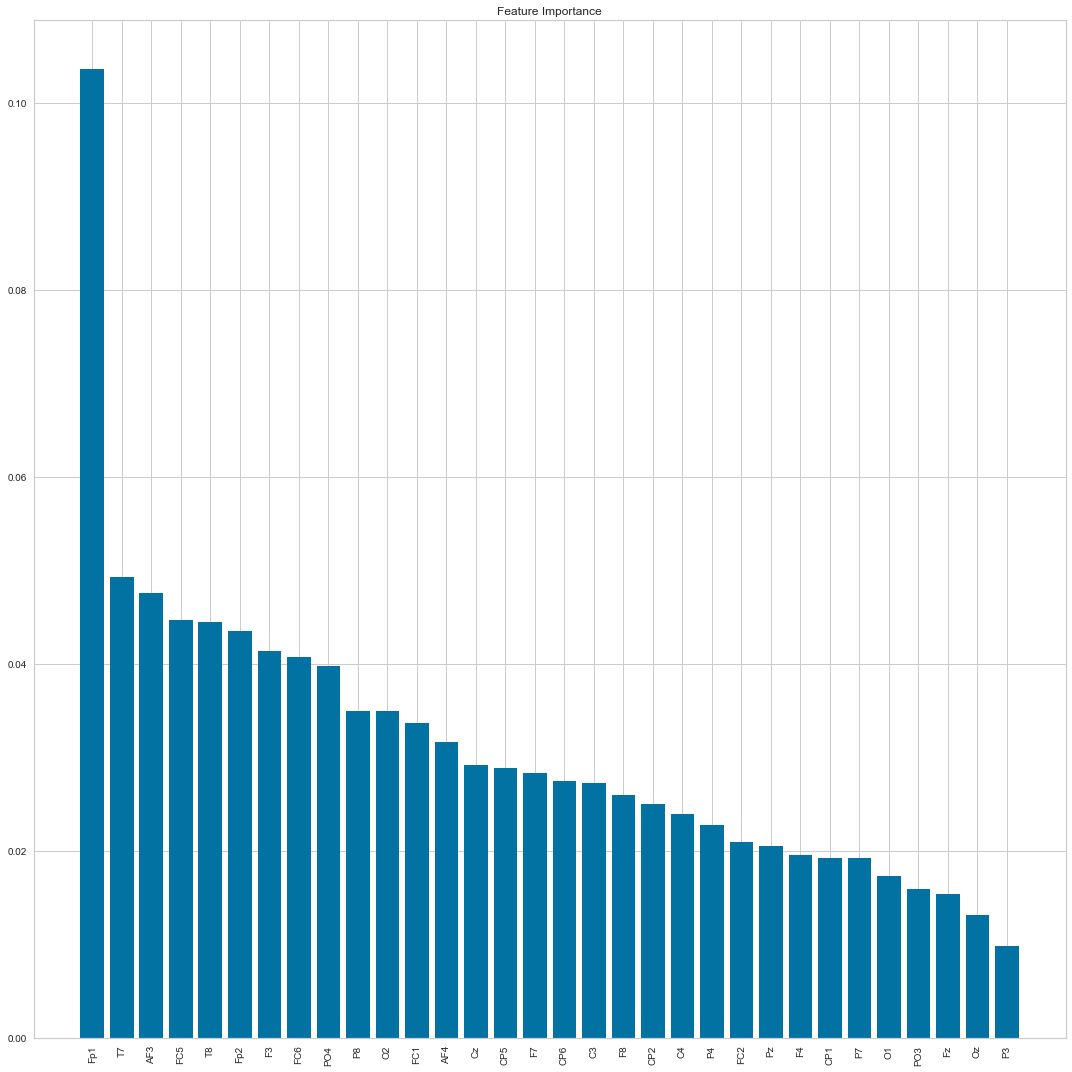

In [159]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

<h2>5. Permutation Entropy</h2>

In [160]:
perm_ent_pd['Y'] = 1
perm_ent['Y'] = 0

In [161]:
X1 = perm_ent.append(perm_ent_pd).reset_index().drop('index', axis=1)
X1

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0      0.653851  0.627360  0.645523  0.643488  0.609878  0.612827  0.627862   
1      0.654297  0.622920  0.639471  0.640382  0.613473  0.612262  0.617867   
2      0.648503  0.636544  0.639944  0.637357  0.602035  0.608664  0.615517   
3      0.648773  0.632806  0.642671  0.629717  0.604678  0.614617  0.624414   
4      0.636262  0.630430  0.642235  0.628659  0.604159  0.620976  0.623103   
...         ...       ...       ...       ...       ...       ...       ...   
29915  0.654539  0.657843  0.642106  0.667201  0.621868  0.628960  0.619058   
29916  0.657028  0.656054  0.646558  0.667549  0.627021  0.636139  0.615762   
29917  0.659264  0.658886  0.642490  0.662209  0.614835  0.645759  0.621863   
29918  0.661372  0.654796  0.644055  0.653564  0.603004  0.648451  0.615354   
29919  0.662130  0.649190  0.651025  0.652863  0.598040  0.648162  0.606123   

             C3       CP1       CP5  ...        T8       FC6       FC2  \
0      0.645651  0.619856  0.633039  ...  0.624846  0.604807  0.621454   
1      0.654224  0.627592  0.627596  ...  0.618726  0.607816  0.623577   
2      0.648177  0.617404  0.619040  ...  0.613217  0.603204  0.627368   
3      0.647890  0.618342  0.625010  ...  0.618313  0.611849  0.616097   
4      0.645244  0.615781  0.627882  ...  0.620957  0.620841  0.616797   
...         ...       ...       ...  ...       ...       ...       ...   
29915  0.596964  0.624216  0.576290  ...  0.574500  0.582105  0.595544   
29916  0.597088  0.632344  0.583377  ...  0.580794  0.586775  0.599772   
29917  0.588695  0.614997  0.592294  ...  0.578545  0.576290  0.595017   
29918  0.589531  0.618046  0.590149  ...  0.566606  0.570447  0.594645   
29919  0.585921  0.610046  0.586416  ...  0.568128  0.565781  0.593980   

             F4        F8       AF4       Fp2        Fz        Cz  Y  
0      0.622621  0.651042  0.638345  0.642443  0.622322  0.627119  0  
1      0.631795  0.645470  0.633832  0.648552  0.618896  0.623855  0  
2      0.620675  0.644206  0.638844  0.641758  0.624919  0.611311  0  
3      0.618576  0.633304  0.630103  0.636296  0.619182  0.612911  0  
4      0.612879  0.629869  0.626783  0.622218  0.621935  0.609994  0  
...         ...       ...       ...       ...       ...       ... ..  
29915  0.633930  0.634928  0.639111  0.642337  0.625494  0.580375  1  
29916  0.631238  0.626966  0.647299  0.648187  0.619062  0.597185  1  
29917  0.626356  0.617682  0.650844  0.643080  0.615354  0.609699  1  
29918  0.629325  0.620991  0.654619  0.646137  0.609465  0.609101  1  
29919  0.630051  0.622177  0.657409  0.643074  0.596950  0.608317  1  

[29920 rows x 33 columns]

In [162]:
clf = setup(data=X1, target='Y')

In [96]:
compare_models(fold=15)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [163]:
xgb = create_model('xgboost', fold=15)

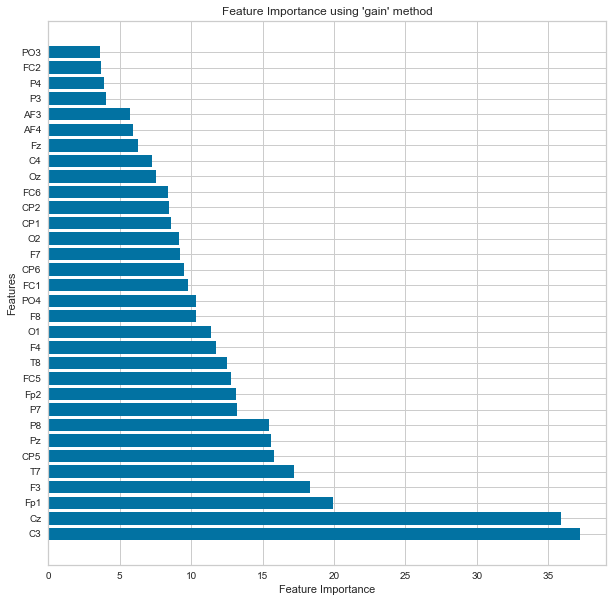

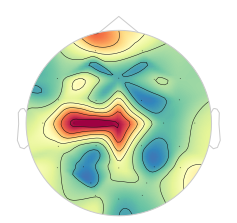

In [164]:
importances = plot_importance(xgb)

In [165]:
X3 = X1
X = X3.iloc[:,:-1]
Y = X3['Y']

In [166]:
X

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0      0.653851  0.627360  0.645523  0.643488  0.609878  0.612827  0.627862   
1      0.654297  0.622920  0.639471  0.640382  0.613473  0.612262  0.617867   
2      0.648503  0.636544  0.639944  0.637357  0.602035  0.608664  0.615517   
3      0.648773  0.632806  0.642671  0.629717  0.604678  0.614617  0.624414   
4      0.636262  0.630430  0.642235  0.628659  0.604159  0.620976  0.623103   
...         ...       ...       ...       ...       ...       ...       ...   
29915  0.654539  0.657843  0.642106  0.667201  0.621868  0.628960  0.619058   
29916  0.657028  0.656054  0.646558  0.667549  0.627021  0.636139  0.615762   
29917  0.659264  0.658886  0.642490  0.662209  0.614835  0.645759  0.621863   
29918  0.661372  0.654796  0.644055  0.653564  0.603004  0.648451  0.615354   
29919  0.662130  0.649190  0.651025  0.652863  0.598040  0.648162  0.606123   

             C3       CP1       CP5  ...        C4        T8       FC6  \
0      0.645651  0.619856  0.633039  ...  0.599637  0.624846  0.604807   
1      0.654224  0.627592  0.627596  ...  0.602575  0.618726  0.607816   
2      0.648177  0.617404  0.619040  ...  0.595977  0.613217  0.603204   
3      0.647890  0.618342  0.625010  ...  0.606074  0.618313  0.611849   
4      0.645244  0.615781  0.627882  ...  0.606908  0.620957  0.620841   
...         ...       ...       ...  ...       ...       ...       ...   
29915  0.596964  0.624216  0.576290  ...  0.566676  0.574500  0.582105   
29916  0.597088  0.632344  0.583377  ...  0.583377  0.580794  0.586775   
29917  0.588695  0.614997  0.592294  ...  0.577007  0.578545  0.576290   
29918  0.589531  0.618046  0.590149  ...  0.569582  0.566606  0.570447   
29919  0.585921  0.610046  0.586416  ...  0.570393  0.568128  0.565781   

            FC2        F4        F8       AF4       Fp2        Fz        Cz  
0      0.621454  0.622621  0.651042  0.638345  0.642443  0.622322  0.627119  
1      0.623577  0.631795  0.645470  0.633832  0.648552  0.618896  0.623855  
2      0.627368  0.620675  0.644206  0.638844  0.641758  0.624919  0.611311  
3      0.616097  0.618576  0.633304  0.630103  0.636296  0.619182  0.612911  
4      0.616797  0.612879  0.629869  0.626783  0.622218  0.621935  0.609994  
...         ...       ...       ...       ...       ...       ...       ...  
29915  0.595544  0.633930  0.634928  0.639111  0.642337  0.625494  0.580375  
29916  0.599772  0.631238  0.626966  0.647299  0.648187  0.619062  0.597185  
29917  0.595017  0.626356  0.617682  0.650844  0.643080  0.615354  0.609699  
29918  0.594645  0.629325  0.620991  0.654619  0.646137  0.609465  0.609101  
29919  0.593980  0.630051  0.622177  0.657409  0.643074  0.596950  0.608317  

[29920 rows x 32 columns]

In [167]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
29915    1
29916    1
29917    1
29918    1
29919    1
Name: Y, Length: 29920, dtype: int64

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [169]:
y_train

17937    1
4722     0
646      0
7971     0
15412    1
        ..
28636    1
17730    1
28030    1
15725    1
19966    1
Name: Y, Length: 20046, dtype: int64

In [170]:
X_train

Fp1       AF3        F7        F3       FC1       FC5        T7  \
17937  0.645565  0.639988  0.634135  0.630563  0.621018  0.609887  0.621029   
4722   0.642854  0.648109  0.667377  0.665466  0.627784  0.639197  0.639626   
646    0.633277  0.600095  0.605893  0.595789  0.585855  0.618696  0.602647   
7971   0.626007  0.617648  0.621873  0.622262  0.595055  0.621054  0.639631   
15412  0.576957  0.611820  0.592081  0.624991  0.619232  0.645896  0.647922   
...         ...       ...       ...       ...       ...       ...       ...   
28636  0.599487  0.630715  0.600266  0.613045  0.615819  0.608064  0.558752   
17730  0.632344  0.619163  0.642051  0.590479  0.602039  0.604182  0.586575   
28030  0.602837  0.612611  0.600044  0.623089  0.617551  0.609973  0.584701   
15725  0.600043  0.595848  0.591898  0.595247  0.612147  0.595350  0.621868   
19966  0.634353  0.625005  0.619062  0.625069  0.572971  0.621613  0.579196   

             C3       CP1       CP5  ...        C4        T8       FC6  \
17937  0.612108  0.588651  0.616108  ...  0.583025  0.629382  0.598272   
4722   0.615805  0.582010  0.626507  ...  0.609566  0.656212  0.637312   
646    0.600386  0.599877  0.591103  ...  0.606295  0.596432  0.601706   
7971   0.621767  0.608403  0.597945  ...  0.586100  0.642088  0.657653   
15412  0.599324  0.570612  0.562913  ...  0.584821  0.604966  0.604074   
...         ...       ...       ...  ...       ...       ...       ...   
28636  0.599039  0.628595  0.557227  ...  0.582497  0.588851  0.575868   
17730  0.597675  0.595050  0.612875  ...  0.599073  0.629666  0.626516   
28030  0.611119  0.593271  0.587593  ...  0.600200  0.617916  0.625045   
15725  0.619020  0.593183  0.579765  ...  0.576150  0.607988  0.590138   
19966  0.612879  0.573911  0.592063  ...  0.593588  0.660094  0.642257   

            FC2        F4        F8       AF4       Fp2        Fz        Cz  
17937  0.591738  0.642183  0.618693  0.636184  0.619395  0.618771  0.615273  
4722   0.630503  0.650210  0.624768  0.661878  0.648232  0.639802  0.633780  
646    0.577051  0.586195  0.587566  0.603004  0.586846  0.583387  0.597418  
7971   0.585899  0.626401  0.655108  0.637613  0.602900  0.584079  0.572368  
15412  0.575530  0.580763  0.626505  0.585293  0.607469  0.593343  0.612213  
...         ...       ...       ...       ...       ...       ...       ...  
28636  0.594618  0.612223  0.595774  0.599932  0.648465  0.609441  0.601475  
17730  0.596835  0.607400  0.625801  0.656756  0.621144  0.595319  0.617773  
28030  0.597519  0.613956  0.621863  0.629810  0.618140  0.615182  0.593195  
15725  0.608625  0.596409  0.609680  0.598875  0.589059  0.583851  0.606314  
19966  0.576299  0.619317  0.638619  0.661126  0.638956  0.579186  0.579908  

[20046 rows x 32 columns]

<h2>KNN</h2>

In [103]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9882519748835326


<h2>XGBoost</h2>

In [171]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.78%


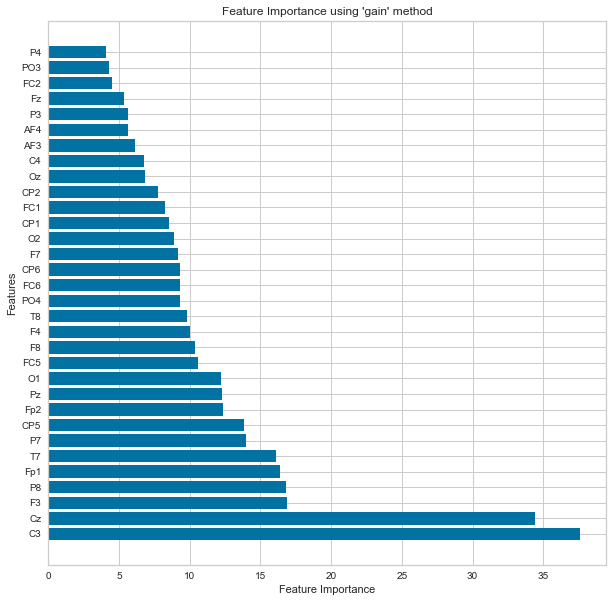

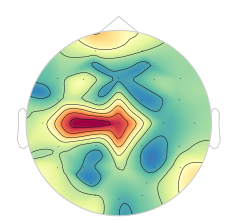

In [172]:
importances1 = plot_importance(model)

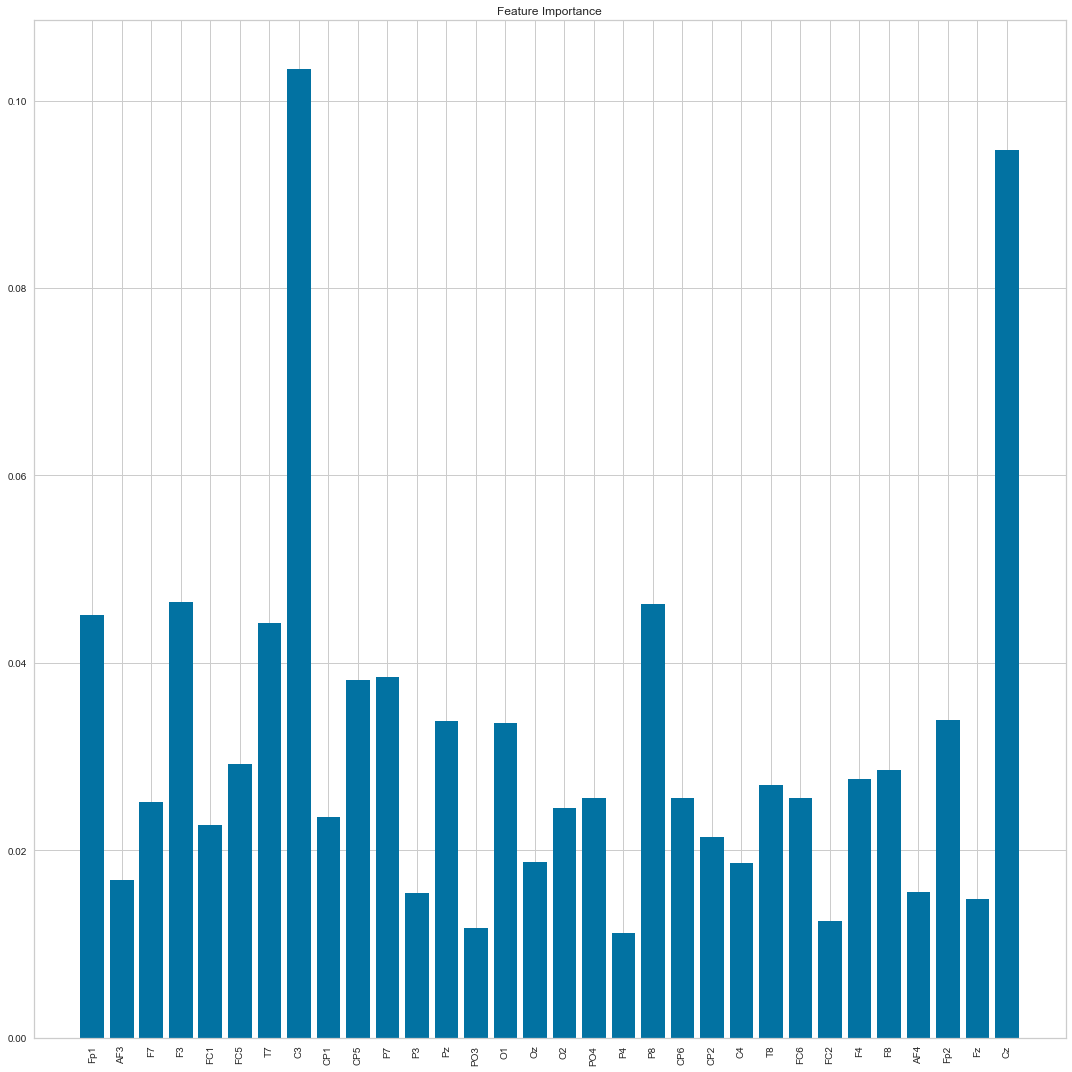

In [173]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

<h1>6. Spectral value Decomposition Entropy</h1>

In [312]:
svd_ent_pd['Y'] = 1
svd_ent['Y'] = 0

In [313]:
X1 = svd_ent.append(svd_ent_pd).reset_index().drop('index', axis=1)
X1

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0      0.458908  0.434869  0.340702  0.386782  0.365884  0.406409  0.351328   
1      0.451221  0.414923  0.333681  0.400294  0.382259  0.401564  0.351616   
2      0.442712  0.405934  0.358528  0.414467  0.378981  0.403102  0.354399   
3      0.443365  0.405043  0.397247  0.411909  0.373343  0.402101  0.362022   
4      0.427519  0.416873  0.382063  0.425301  0.385304  0.405295  0.371534   
...         ...       ...       ...       ...       ...       ...       ...   
29915  0.491320  0.532891  0.407463  0.501256  0.374406  0.386265  0.255809   
29916  0.494811  0.534464  0.420167  0.504118  0.382389  0.415714  0.291688   
29917  0.498712  0.534855  0.434211  0.500521  0.384193  0.425555  0.311619   
29918  0.491966  0.537778  0.425562  0.489813  0.377582  0.427540  0.316076   
29919  0.482435  0.529011  0.418537  0.482210  0.365277  0.421706  0.315356   

             C3       CP1       CP5  ...        T8       FC6       FC2  \
0      0.261940  0.284195  0.438961  ...  0.470504  0.379502  0.268096   
1      0.244627  0.282746  0.449121  ...  0.457795  0.395324  0.266374   
2      0.263503  0.292610  0.446254  ...  0.447096  0.390877  0.260363   
3      0.297858  0.306358  0.446022  ...  0.452488  0.400232  0.281295   
4      0.352647  0.328541  0.445981  ...  0.462046  0.425562  0.325038   
...         ...       ...       ...  ...       ...       ...       ...   
29915  0.365567  0.390283  0.305585  ...  0.257560  0.238938  0.387072   
29916  0.367154  0.395046  0.315791  ...  0.268185  0.261035  0.407889   
29917  0.369996  0.385941  0.328629  ...  0.271540  0.264359  0.405937   
29918  0.367673  0.392526  0.320136  ...  0.276268  0.258890  0.386163   
29919  0.365150  0.383333  0.319630  ...  0.273827  0.255927  0.380407   

             F4        F8       AF4       Fp2        Fz        Cz  Y  
0      0.302053  0.422935  0.424511  0.366348  0.368851  0.346873  0  
1      0.315600  0.413950  0.428986  0.410144  0.376822  0.350924  0  
2      0.304534  0.423262  0.433876  0.421878  0.373819  0.349290  0  
3      0.288024  0.426370  0.448459  0.427499  0.372182  0.351973  0  
4      0.280174  0.424157  0.400534  0.405728  0.356408  0.380610  0  
...         ...       ...       ...       ...       ...       ... ..  
29915  0.490676  0.308015  0.460963  0.537015  0.393121  0.366599  1  
29916  0.496592  0.321031  0.476799  0.540702  0.413991  0.377063  1  
29917  0.490521  0.325659  0.485507  0.537316  0.409525  0.385335  1  
29918  0.488776  0.333566  0.482036  0.529777  0.388482  0.371548  1  
29919  0.489559  0.336372  0.479302  0.525972  0.378131  0.361346  1  

[29920 rows x 33 columns]

In [314]:
clf = setup(data=X1, target='Y')

In [113]:
compare_models(fold=15)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6572, verbose=0,
                     warm_start=False)

In [273]:
knn = create_model('knn', fold=15, n_neighbors=5)

In [219]:
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<h2> KNN giving 99.85% accuracy </h2>

In [ ]:
et = create_model('et', fold=15)

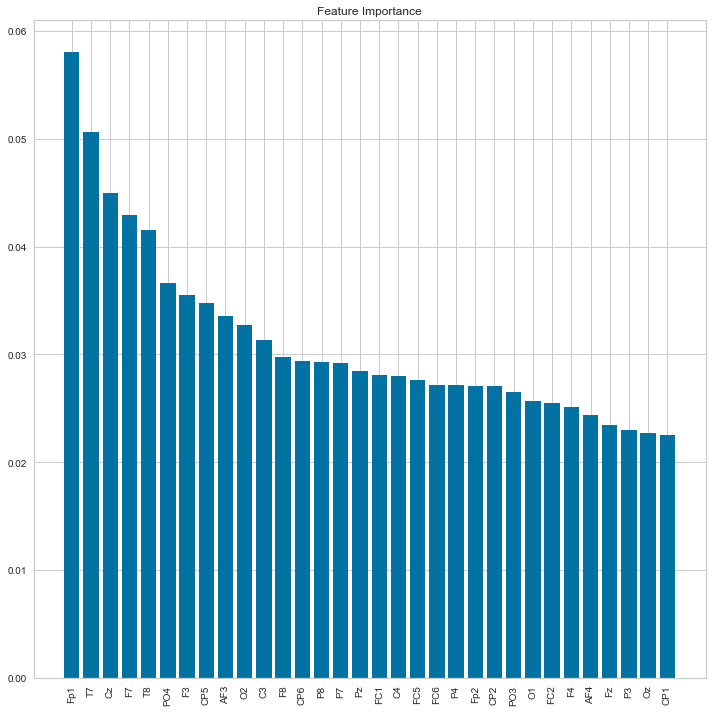

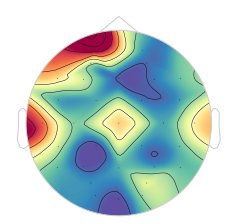

In [315]:
et_plot_importance(et)

## This topo plot is the one to use

In [283]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [177]:
xgb = create_model('xgboost', fold=15)

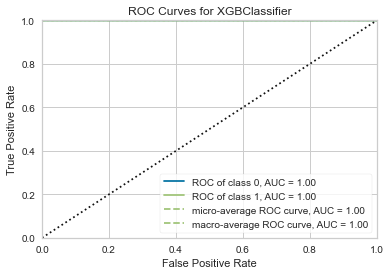

In [183]:
plot_model(xgb, plot='auc', use_train_data=True)

In [184]:
evaluate_model(xgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

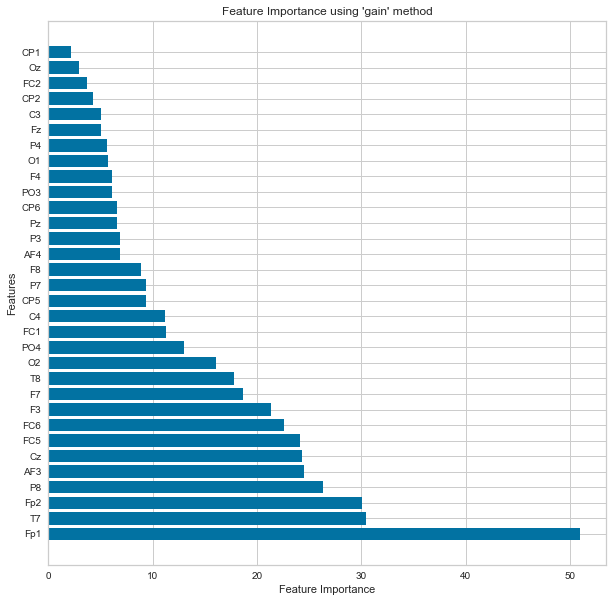

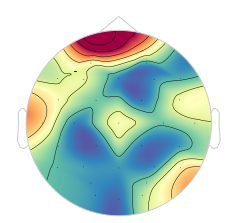

In [186]:
importances = plot_importance(xgb)

In [323]:
X3 = X1
X = X3.iloc[:,:-1]
Y = X3['Y']

In [324]:
X

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0      0.458908  0.434869  0.340702  0.386782  0.365884  0.406409  0.351328   
1      0.451221  0.414923  0.333681  0.400294  0.382259  0.401564  0.351616   
2      0.442712  0.405934  0.358528  0.414467  0.378981  0.403102  0.354399   
3      0.443365  0.405043  0.397247  0.411909  0.373343  0.402101  0.362022   
4      0.427519  0.416873  0.382063  0.425301  0.385304  0.405295  0.371534   
...         ...       ...       ...       ...       ...       ...       ...   
29915  0.491320  0.532891  0.407463  0.501256  0.374406  0.386265  0.255809   
29916  0.494811  0.534464  0.420167  0.504118  0.382389  0.415714  0.291688   
29917  0.498712  0.534855  0.434211  0.500521  0.384193  0.425555  0.311619   
29918  0.491966  0.537778  0.425562  0.489813  0.377582  0.427540  0.316076   
29919  0.482435  0.529011  0.418537  0.482210  0.365277  0.421706  0.315356   

             C3       CP1       CP5  ...        C4        T8       FC6  \
0      0.261940  0.284195  0.438961  ...  0.435934  0.470504  0.379502   
1      0.244627  0.282746  0.449121  ...  0.435363  0.457795  0.395324   
2      0.263503  0.292610  0.446254  ...  0.429538  0.447096  0.390877   
3      0.297858  0.306358  0.446022  ...  0.429794  0.452488  0.400232   
4      0.352647  0.328541  0.445981  ...  0.431816  0.462046  0.425562   
...         ...       ...       ...  ...       ...       ...       ...   
29915  0.365567  0.390283  0.305585  ...  0.294424  0.257560  0.238938   
29916  0.367154  0.395046  0.315791  ...  0.315680  0.268185  0.261035   
29917  0.369996  0.385941  0.328629  ...  0.317967  0.271540  0.264359   
29918  0.367673  0.392526  0.320136  ...  0.310189  0.276268  0.258890   
29919  0.365150  0.383333  0.319630  ...  0.307608  0.273827  0.255927   

            FC2        F4        F8       AF4       Fp2        Fz        Cz  
0      0.268096  0.302053  0.422935  0.424511  0.366348  0.368851  0.346873  
1      0.266374  0.315600  0.413950  0.428986  0.410144  0.376822  0.350924  
2      0.260363  0.304534  0.423262  0.433876  0.421878  0.373819  0.349290  
3      0.281295  0.288024  0.426370  0.448459  0.427499  0.372182  0.351973  
4      0.325038  0.280174  0.424157  0.400534  0.405728  0.356408  0.380610  
...         ...       ...       ...       ...       ...       ...       ...  
29915  0.387072  0.490676  0.308015  0.460963  0.537015  0.393121  0.366599  
29916  0.407889  0.496592  0.321031  0.476799  0.540702  0.413991  0.377063  
29917  0.405937  0.490521  0.325659  0.485507  0.537316  0.409525  0.385335  
29918  0.386163  0.488776  0.333566  0.482036  0.529777  0.388482  0.371548  
29919  0.380407  0.489559  0.336372  0.479302  0.525972  0.378131  0.361346  

[29920 rows x 32 columns]

In [325]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
29915    1
29916    1
29917    1
29918    1
29919    1
Name: Y, Length: 29920, dtype: int64

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [327]:
X_train

Fp1       AF3        F7        F3       FC1       FC5        T7  \
17937  0.463970  0.439346  0.432147  0.418799  0.385360  0.382307  0.361818   
4722   0.475585  0.502975  0.474437  0.496693  0.383540  0.353159  0.463873   
646    0.427477  0.456099  0.447334  0.413360  0.396414  0.350573  0.414679   
7971   0.413513  0.441675  0.378010  0.430965  0.423339  0.444539  0.452143   
15412  0.336411  0.349766  0.306281  0.366667  0.392016  0.349466  0.430008   
...         ...       ...       ...       ...       ...       ...       ...   
28636  0.360178  0.398411  0.336836  0.393789  0.343703  0.303071  0.258321   
17730  0.386687  0.333761  0.343439  0.300425  0.290633  0.271893  0.291750   
28030  0.349927  0.370891  0.322959  0.399683  0.349576  0.358168  0.354240   
15725  0.390974  0.392531  0.395430  0.384117  0.383771  0.446299  0.450348   
19966  0.430396  0.482563  0.394156  0.439289  0.407291  0.463789  0.342806   

             C3       CP1       CP5  ...        C4        T8       FC6  \
17937  0.331932  0.350068  0.333092  ...  0.346125  0.375331  0.361038   
4722   0.438799  0.283649  0.375059  ...  0.383192  0.478424  0.376619   
646    0.417666  0.364582  0.422640  ...  0.407274  0.413610  0.396771   
7971   0.374567  0.404811  0.382327  ...  0.337468  0.489395  0.449241   
15412  0.323865  0.379760  0.333305  ...  0.372315  0.345059  0.364202   
...         ...       ...       ...  ...       ...       ...       ...   
28636  0.290903  0.379287  0.336937  ...  0.321135  0.327982  0.342674   
17730  0.303986  0.277349  0.310726  ...  0.303133  0.328602  0.349541   
28030  0.388888  0.398954  0.377596  ...  0.366532  0.418606  0.389482   
15725  0.389575  0.388731  0.380480  ...  0.396505  0.407650  0.388033   
19966  0.412894  0.381932  0.378483  ...  0.418743  0.481825  0.522999   

            FC2        F4        F8       AF4       Fp2        Fz        Cz  
17937  0.344245  0.427893  0.427218  0.491747  0.388071  0.375154  0.374454  
4722   0.381533  0.445930  0.395465  0.521707  0.484528  0.393271  0.408225  
646    0.383300  0.398048  0.409363  0.409474  0.397847  0.367542  0.368353  
7971   0.364818  0.414701  0.510332  0.447147  0.392604  0.384285  0.403214  
15412  0.363159  0.368911  0.355891  0.355617  0.348525  0.349193  0.344460  
...         ...       ...       ...       ...       ...       ...       ...  
28636  0.334832  0.401309  0.324298  0.385208  0.447357  0.386659  0.349084  
17730  0.340383  0.370431  0.389170  0.488777  0.356858  0.333501  0.371644  
28030  0.339810  0.384058  0.413882  0.386713  0.368638  0.343489  0.368493  
15725  0.399869  0.379418  0.386559  0.390925  0.377598  0.391401  0.415761  
19966  0.420331  0.486215  0.464806  0.528036  0.498866  0.410616  0.370713  

[20046 rows x 32 columns]

## ET

In [328]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=123)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.81%


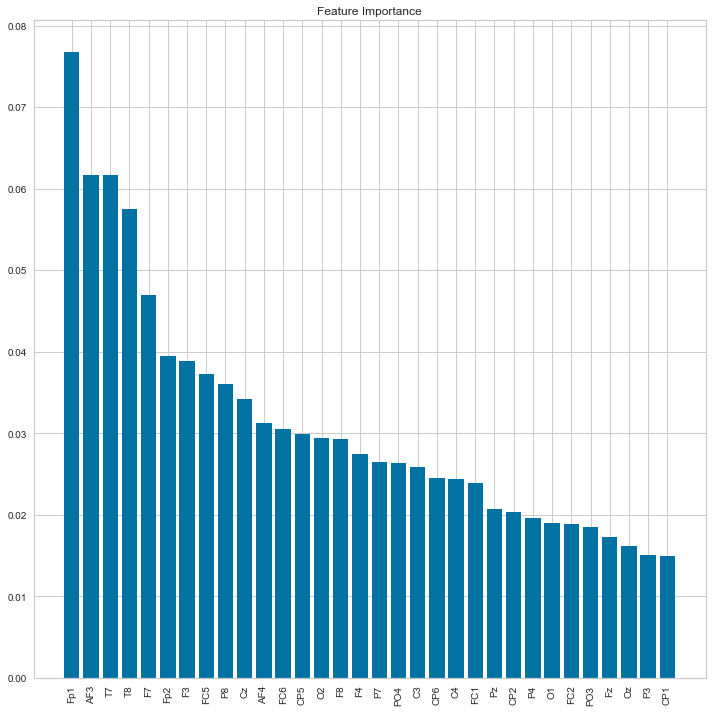

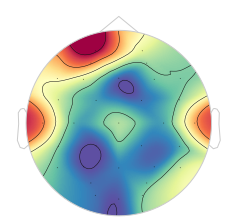

In [330]:
et_plot_importance(clf)

<h2>KNN</h2>

In [121]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.993619607048815


<h2>XGBoost</h2>


In [192]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.33%


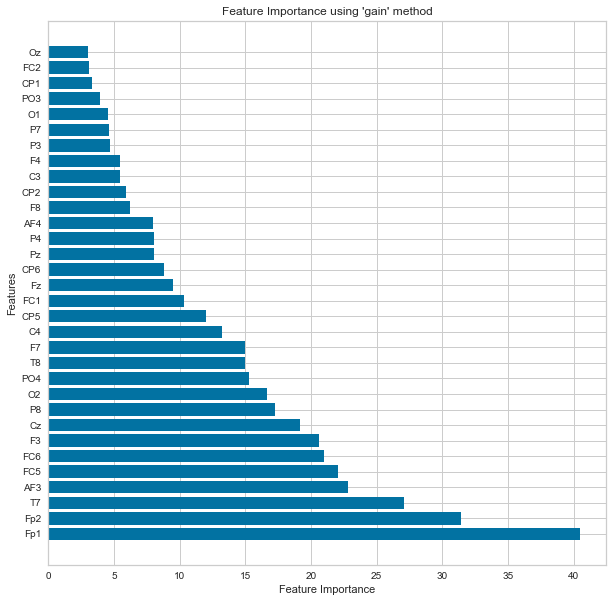

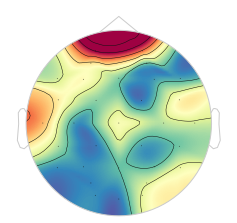

In [193]:
importances1 = plot_importance(model)

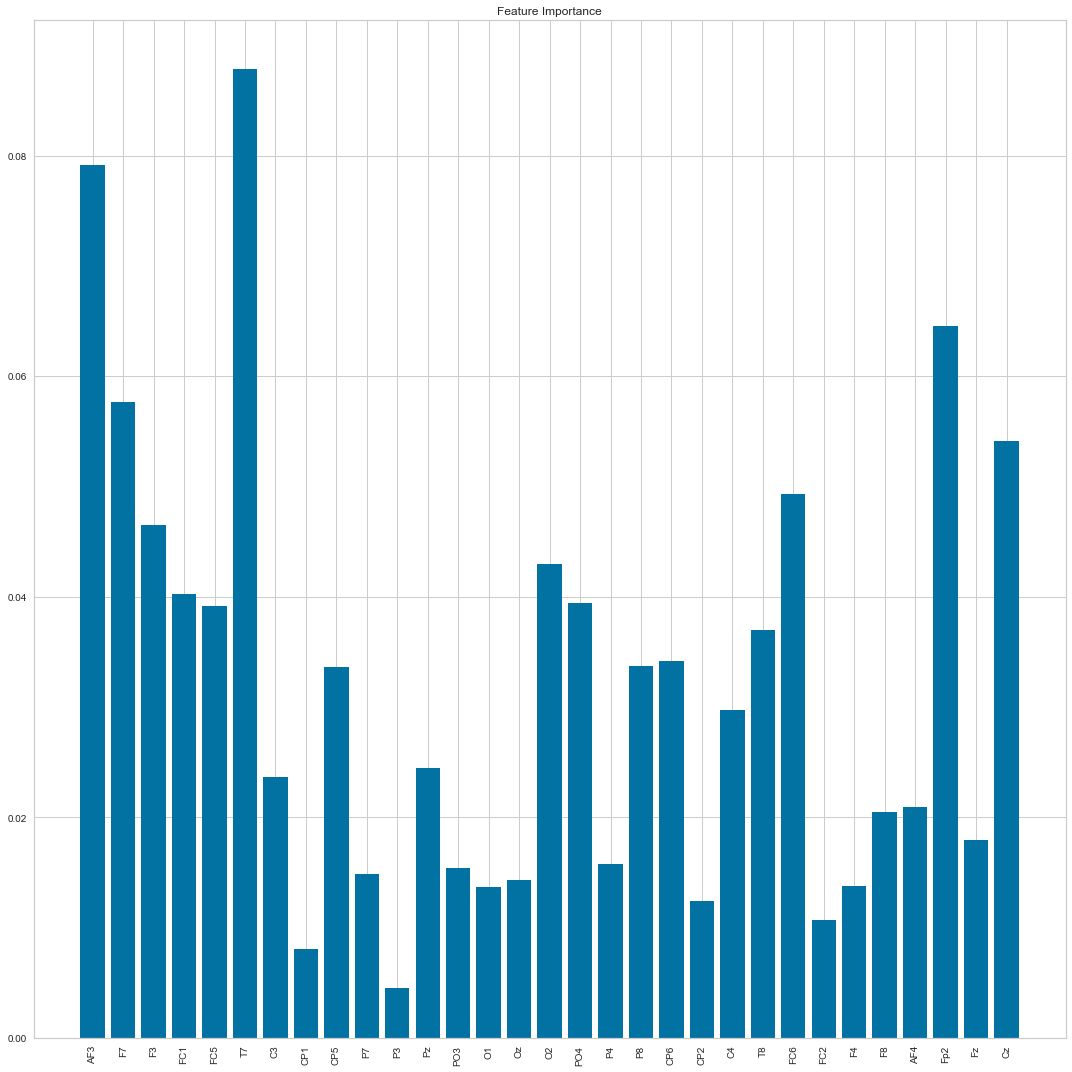

In [124]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

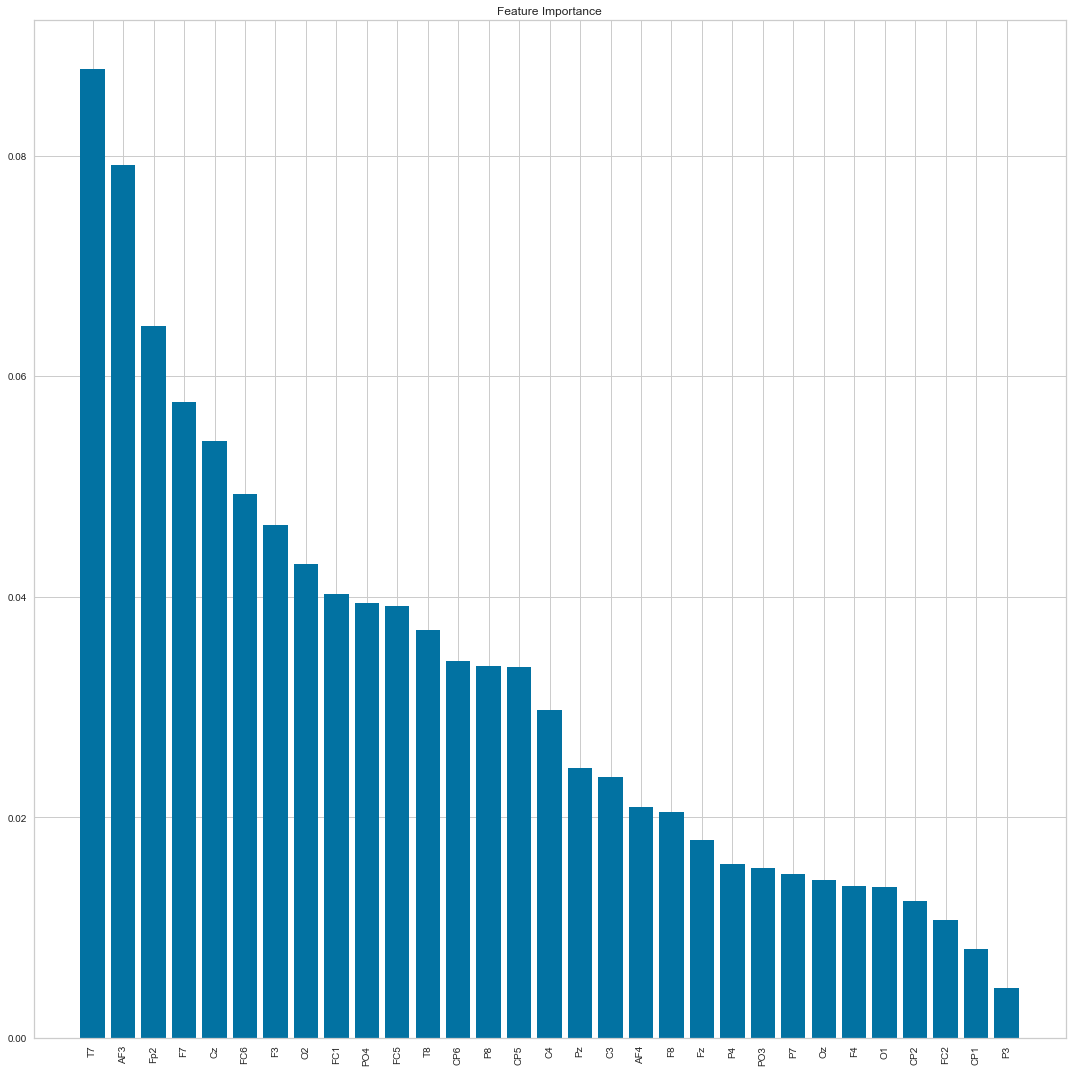

In [125]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

<h2>7. Approximate Entropy</h2>

In [331]:
app_ent_pd['Y'] = 1
app_ent['Y'] = 0

In [332]:
X1 = app_ent.append(app_ent_pd).reset_index().drop('index', axis=1)
X1

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0      0.608399  0.592641  0.499266  0.590276  0.541234  0.547793  0.526568   
1      0.612127  0.575712  0.501814  0.574655  0.526315  0.532914  0.504102   
2      0.598262  0.573636  0.526803  0.580620  0.516986  0.541781  0.497811   
3      0.595707  0.562079  0.540473  0.568735  0.515643  0.536079  0.519471   
4      0.566543  0.568753  0.520980  0.567246  0.527861  0.534045  0.518571   
...         ...       ...       ...       ...       ...       ...       ...   
29915  0.625501  0.601957  0.557660  0.630726  0.547207  0.547802  0.361863   
29916  0.627664  0.601883  0.568643  0.623606  0.559052  0.573659  0.419267   
29917  0.609589  0.603574  0.561676  0.622378  0.555172  0.578524  0.464195   
29918  0.598225  0.608214  0.559858  0.615026  0.560449  0.581922  0.467989   
29919  0.598081  0.609277  0.565282  0.606942  0.555057  0.574599  0.458250   

             C3       CP1       CP5  ...        T8       FC6       FC2  \
0      0.440637  0.428584  0.590560  ...  0.611423  0.573341  0.390734   
1      0.431733  0.434503  0.583169  ...  0.611636  0.566332  0.394060   
2      0.422138  0.449770  0.579532  ...  0.604212  0.538910  0.376080   
3      0.475700  0.474518  0.592080  ...  0.607388  0.550898  0.410824   
4      0.542767  0.503279  0.598884  ...  0.612203  0.563076  0.515210   
...         ...       ...       ...  ...       ...       ...       ...   
29915  0.529693  0.594552  0.433390  ...  0.370591  0.341516  0.532282   
29916  0.534752  0.590988  0.461154  ...  0.401638  0.385716  0.545655   
29917  0.539782  0.569908  0.502642  ...  0.414660  0.401158  0.542534   
29918  0.546876  0.577603  0.492699  ...  0.416120  0.403427  0.519654   
29919  0.538084  0.572569  0.480695  ...  0.424862  0.398008  0.523851   

             F4        F8       AF4       Fp2        Fz        Cz  Y  
0      0.499534  0.586011  0.575989  0.573572  0.564809  0.520519  0  
1      0.498518  0.576815  0.577422  0.599860  0.536493  0.520509  0  
2      0.465711  0.589777  0.580878  0.588510  0.523997  0.518797  0  
3      0.428255  0.565751  0.594195  0.586411  0.527057  0.520588  0  
4      0.407216  0.579116  0.551464  0.564179  0.512798  0.543995  0  
...         ...       ...       ...       ...       ...       ... ..  
29915  0.615334  0.447154  0.609980  0.631148  0.564928  0.530694  1  
29916  0.614887  0.465081  0.615485  0.629969  0.569627  0.547933  1  
29917  0.626238  0.487228  0.618468  0.629948  0.567193  0.557401  1  
29918  0.627264  0.486361  0.626323  0.624822  0.566822  0.558985  1  
29919  0.632558  0.499372  0.622872  0.611816  0.570500  0.551940  1  

[29920 rows x 33 columns]

In [333]:
clf = setup(data=X1, target='Y')

In [131]:
compare_models(fold=15)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [132]:
knn = create_model('knn', fold=15, n_neighbors=5)

In [197]:
xgb = create_model('xgboost', fold=15)

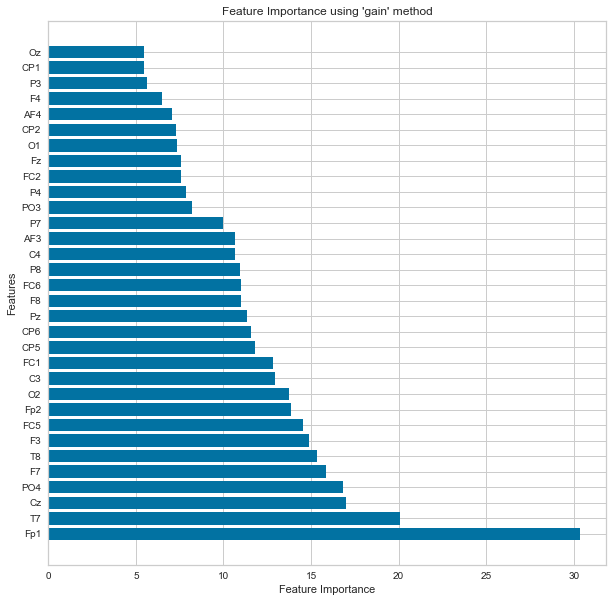

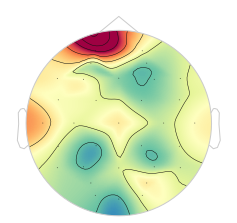

In [198]:
importances = plot_importance(xgb)

In [334]:
et = create_model('et', fold=15)

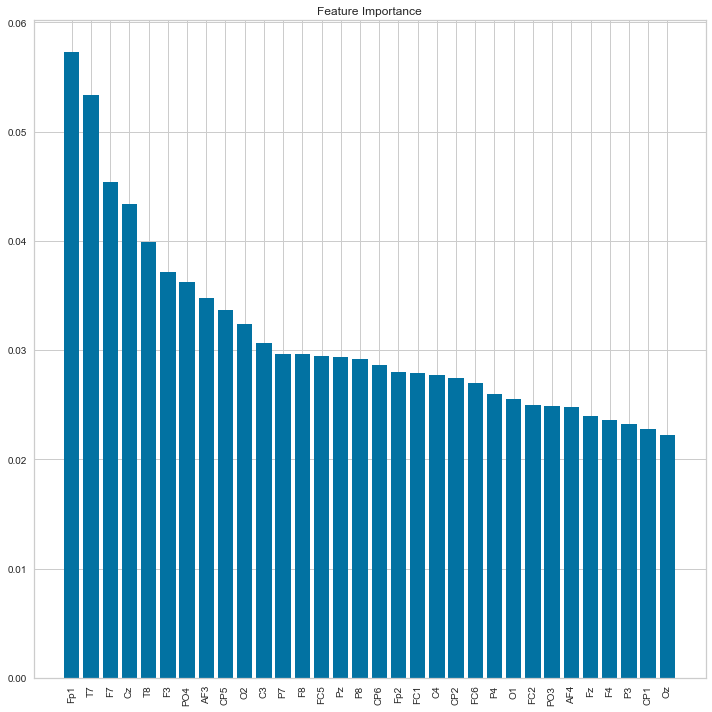

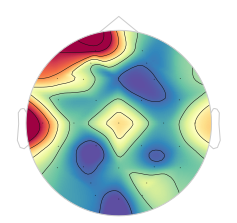

In [335]:
et_plot_importance(et)

## This is the plot to use

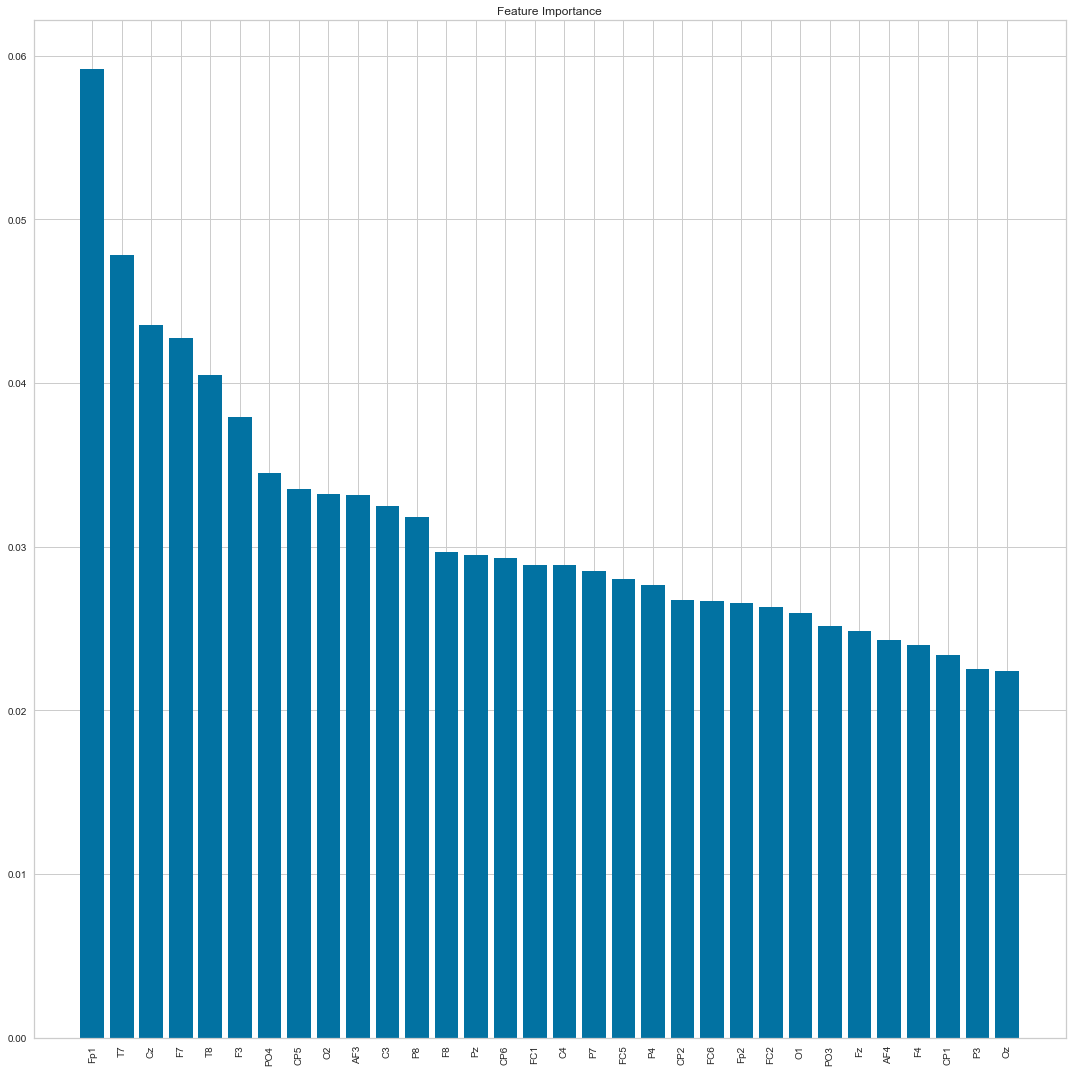

In [203]:
fig, ax = plt.subplots(figsize=(15,15))

importances = et.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

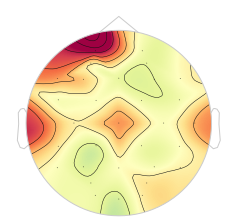

(<matplotlib.image.AxesImage at 0x169d4ccedf0>,
 <matplotlib.contour.QuadContourSet at 0x169d4cceee0>)

In [204]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances))/2, vmax=max(importances))
mne.viz.plot_topomap(data=importances, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

In [300]:
X3 = X1
X = X3.iloc[:,:-1]
Y = X3['Y']

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [207]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9715414219161435


In [305]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=123)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.06%


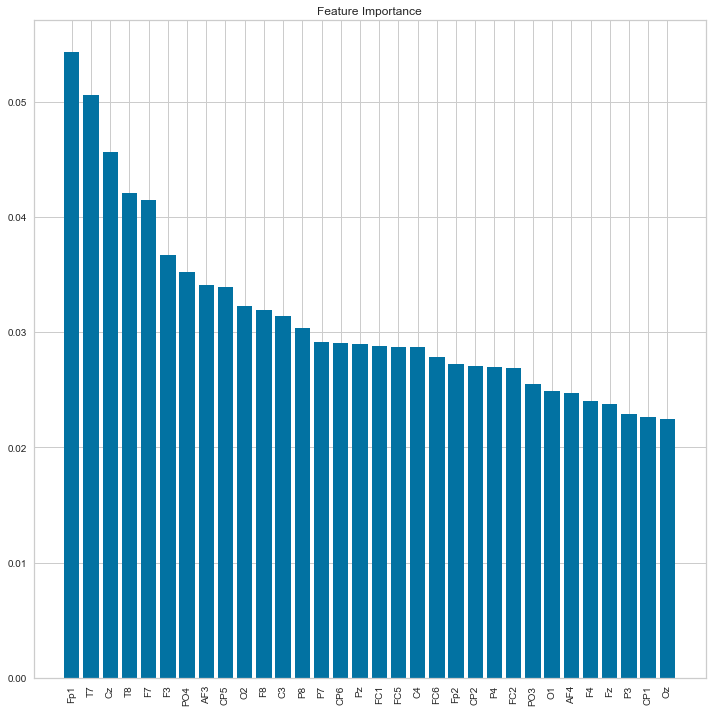

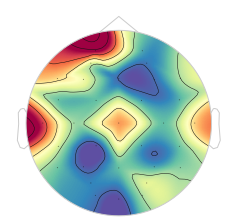

In [308]:
et_plot_importance(clf)

In [309]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.89%


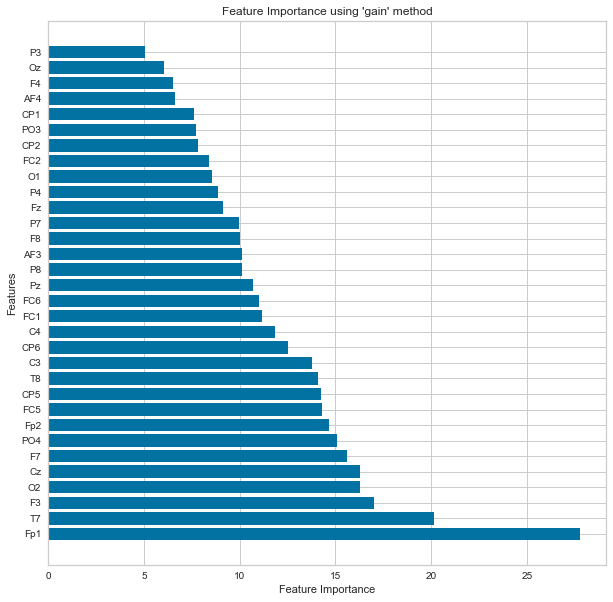

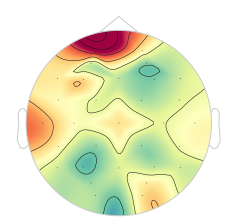

In [310]:
importances1 = plot_importance(model)

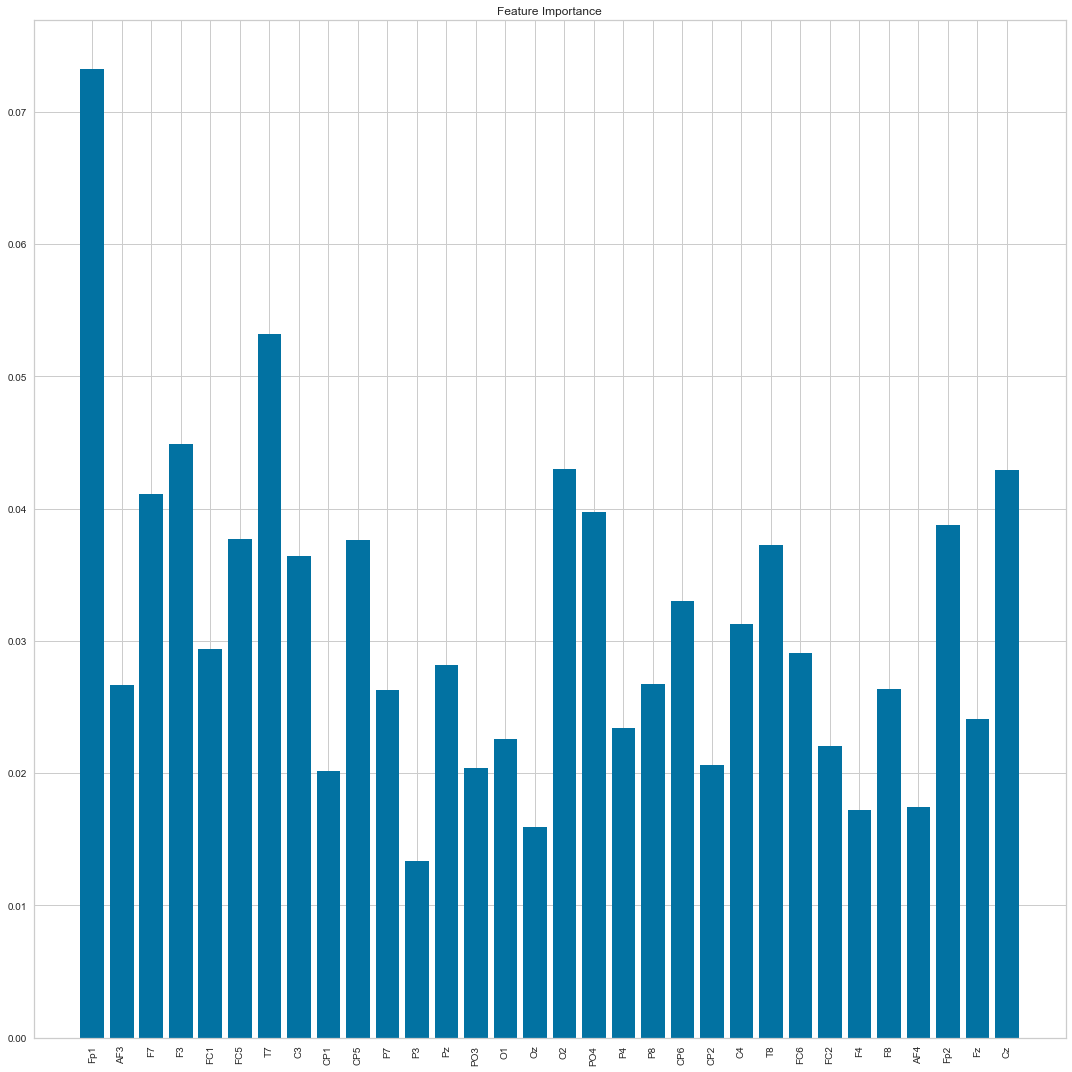

In [211]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

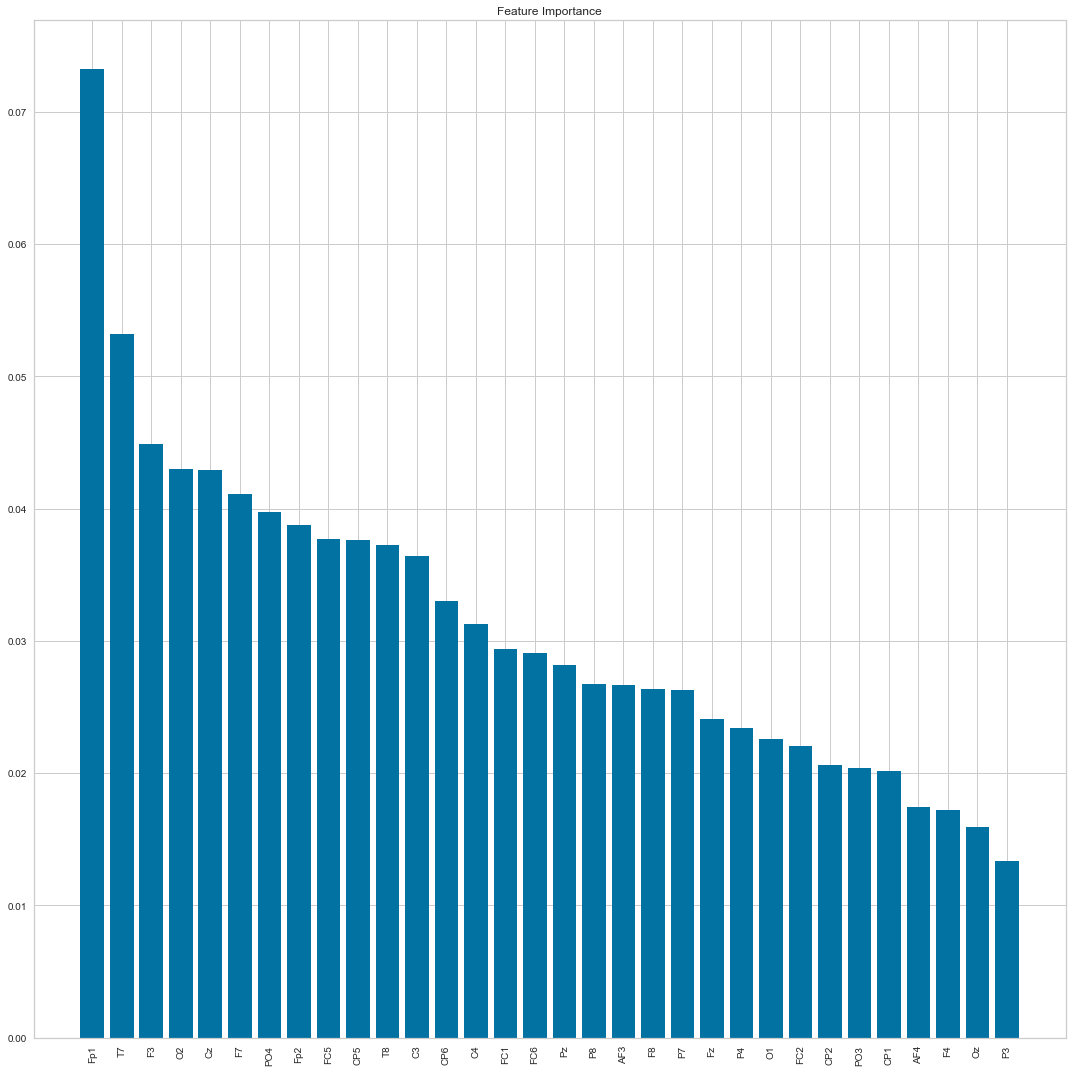

In [212]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

<h2>8. Sample Entropy</h2>

In [336]:
samp_ent_pd['Y'] = 1
samp_ent['Y'] = 0

In [337]:
X1 = samp_ent.append(samp_ent_pd).reset_index().drop('index', axis=1)
X1

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0      0.582628  0.614241  0.447238  0.569299  0.488091  0.532631  0.485144   
1      0.583185  0.560122  0.440506  0.552947  0.486461  0.511653  0.433857   
2      0.571587  0.539989  0.482044  0.567084  0.485137  0.527220  0.422681   
3      0.573620  0.534649  0.512365  0.550360  0.489326  0.535212  0.438767   
4      0.527894  0.544877  0.481538  0.546149  0.518319  0.529601  0.448878   
...         ...       ...       ...       ...       ...       ...       ...   
29915  0.637334  0.608775  0.532827  0.639966  0.458132  0.542300  0.305981   
29916  0.626646  0.604223  0.536136  0.639423  0.473052  0.572744  0.360072   
29917  0.611052  0.605296  0.529384  0.637263  0.477170  0.572685  0.402550   
29918  0.588989  0.623230  0.513661  0.618308  0.495499  0.571515  0.405219   
29919  0.582324  0.632066  0.523014  0.617307  0.492942  0.569940  0.388213   

             C3       CP1       CP5  ...        T8       FC6       FC2  \
0      0.381798  0.374451  0.581432  ...  0.597126  0.554783  0.351066   
1      0.378004  0.393586  0.576374  ...  0.618027  0.550460  0.362531   
2      0.378056  0.418751  0.573873  ...  0.606687  0.517334  0.345098   
3      0.415559  0.459515  0.590014  ...  0.589053  0.528840  0.385214   
4      0.472037  0.451159  0.600163  ...  0.592395  0.554378  0.486038   
...         ...       ...       ...  ...       ...       ...       ...   
29915  0.474596  0.562722  0.396967  ...  0.341799  0.322902  0.464357   
29916  0.478411  0.565082  0.425411  ...  0.371863  0.355174  0.490128   
29917  0.485400  0.560123  0.469048  ...  0.382379  0.366258  0.476293   
29918  0.502791  0.558306  0.441060  ...  0.375645  0.359717  0.456561   
29919  0.500461  0.552671  0.433871  ...  0.396154  0.342748  0.454406   

             F4        F8       AF4       Fp2        Fz        Cz  Y  
0      0.433761  0.553919  0.566720  0.530955  0.508668  0.490510  0  
1      0.430035  0.543375  0.561501  0.559718  0.477255  0.483114  0  
2      0.403887  0.552810  0.569258  0.545561  0.470186  0.492849  0  
3      0.368973  0.521215  0.594823  0.544818  0.487543  0.490200  0  
4      0.353087  0.540221  0.545153  0.523380  0.468574  0.524681  0  
...         ...       ...       ...       ...       ...       ... ..  
29915  0.635218  0.379274  0.584798  0.645550  0.536886  0.475362  1  
29916  0.633244  0.393561  0.594939  0.657913  0.542628  0.462255  1  
29917  0.635181  0.436893  0.617087  0.659517  0.538784  0.472857  1  
29918  0.642485  0.432889  0.617586  0.653432  0.521770  0.464130  1  
29919  0.643761  0.446554  0.603887  0.627815  0.526140  0.456685  1  

[29920 rows x 33 columns]

In [338]:
clf = setup(data=X1, target='Y')

In [149]:
compare_models(fold=15)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [150]:
knn = create_model('knn', fold=15, n_neighbors=5)

In [341]:
xgb = create_model('xgboost', fold=15)

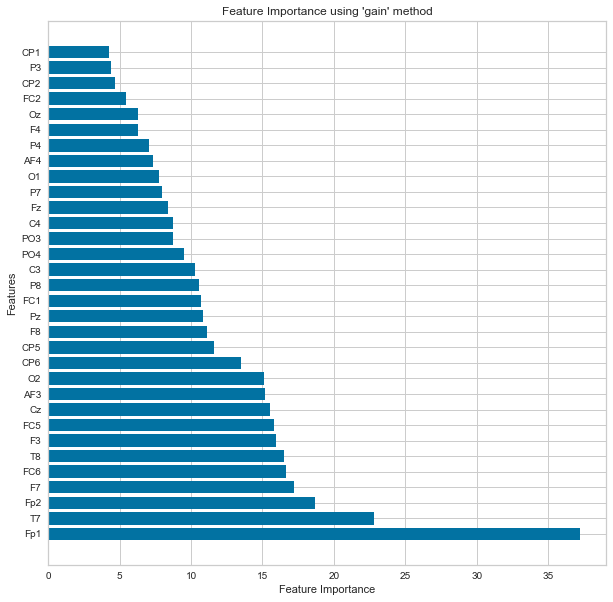

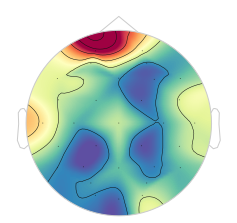

In [342]:
importances = plot_importance(xgb)

In [339]:
et = create_model('et', fold=15)

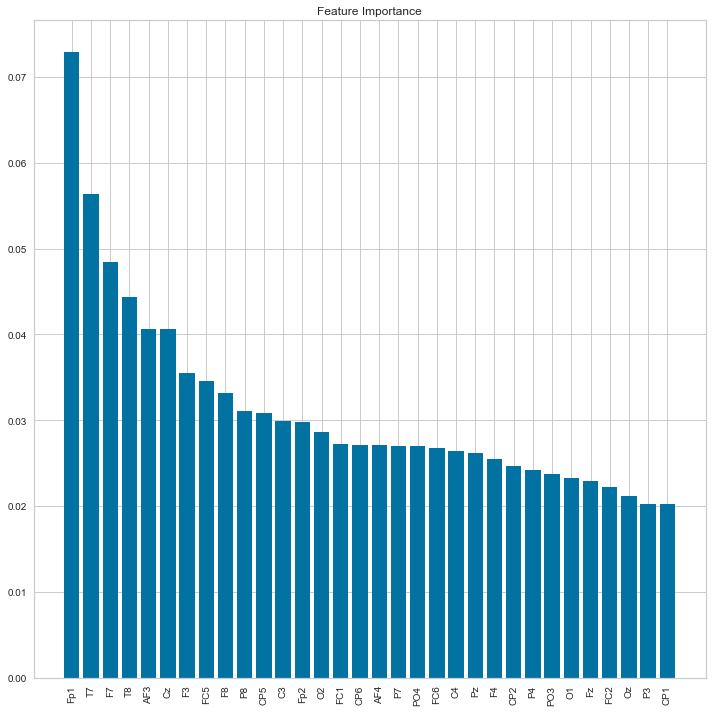

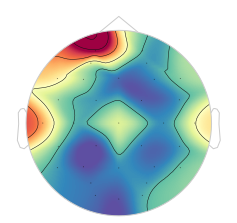

In [340]:
et_plot_importance(et)

In [220]:
X3 = X1
X = X3.iloc[:,:-1]
Y = X3['Y']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [222]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9862264533117278


In [223]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.93%


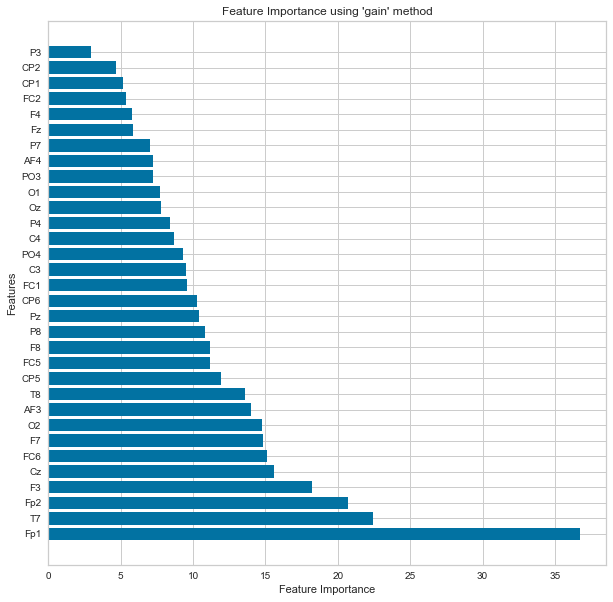

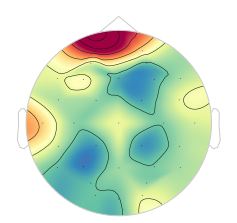

In [224]:
importances1 = plot_importance(model)

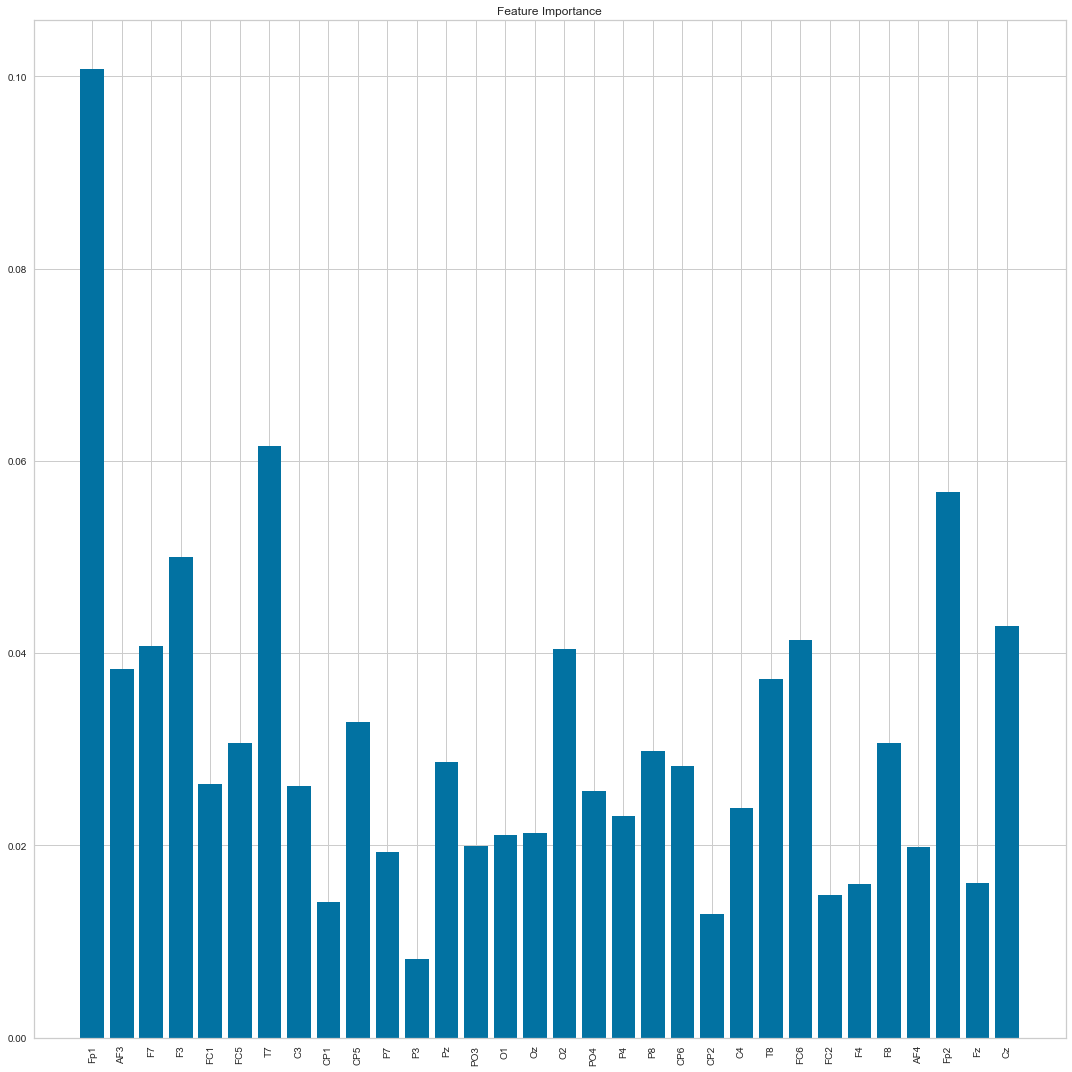

In [225]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

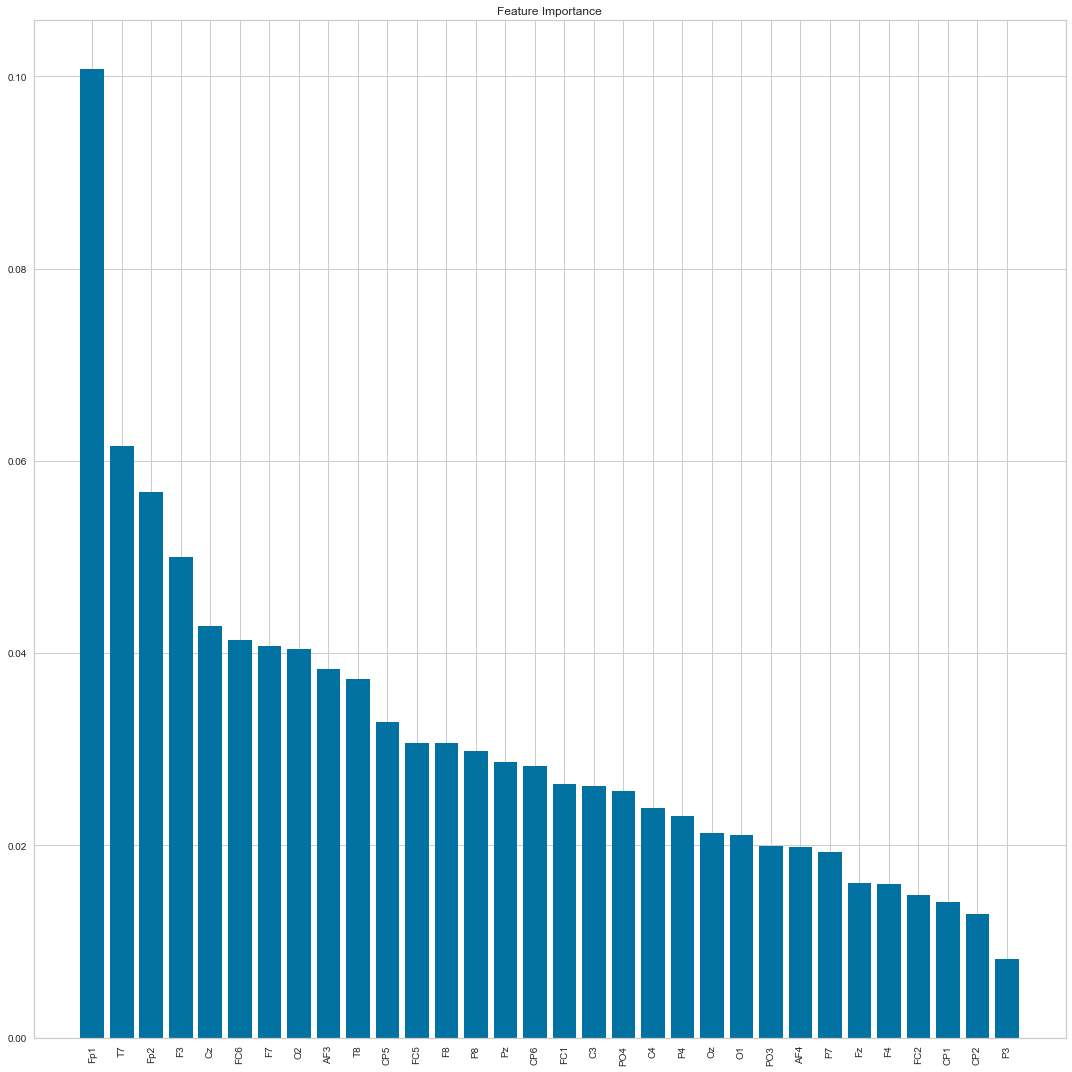

In [226]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

<h2>9. Hjorth<h2>

In [343]:
hjorth_pd['Y'] = 1
hjorth['Y'] = 0

In [344]:
X1 = hjorth.append(hjorth_pd).reset_index().drop('index', axis=1)
X1

Fp1  \
0      (0.23509864086702706, 1.7016537852098106)   
1      (0.22473453337618343, 1.7687015854157146)   
2      (0.21540896186317315, 1.8066134400946827)   
3      (0.21747492270593274, 1.7856238988733846)   
4       (0.20071959394782343, 1.856762572287078)   
...                                          ...   
29915  (0.26585237626080843, 1.5293650694670524)   
29916   (0.26504717367398567, 1.554163066181047)   
29917  (0.26997937379789827, 1.4975419342322922)   
29918  (0.26332561200030435, 1.5090963049317396)   
29919  (0.25421811413068834, 1.5434974054025645)   

                                             AF3  \
0        (0.2389916789133262, 1.573095909368606)   
1       (0.1970427352893741, 1.8808984076206943)   
2      (0.18411000393573784, 2.0393517217872077)   
3       (0.1821020645869565, 2.0672439102748403)   
4      (0.19258198052120623, 1.9595871010725674)   
...                                          ...   
29915   (0.31449066038269824, 1.342781799613308)   
29916  (0.31912564291534334, 1.3129275927010018)   
29917   (0.3169561635683267, 1.3252044428954524)   
29918   (0.3196615622746494, 1.3255802414194717)   
29919  (0.30795193134920246, 1.3502790806606038)   

                                              F7  \
0        (0.1382944775474783, 2.538243768530137)   
1       (0.13488210276278542, 2.526149654820842)   
2       (0.14962476108871417, 2.289372265965418)   
3       (0.18247539216612174, 1.842189675027226)   
4      (0.17287641366250714, 1.9310203036292808)   
...                                          ...   
29915    (0.1836511004031137, 2.231431039988655)   
29916     (0.190296870676841, 2.207769121397378)   
29917   (0.20072846334638453, 2.096816556010338)   
29918  (0.19426909043699814, 2.1554299536116948)   
29919    (0.1880024361365287, 2.241454078599297)   

                                              F3  \
0      (0.21082225106143992, 1.7761978590151895)   
1       (0.20390386538180694, 1.847957058892789)   
2       (0.2069512030404091, 1.8151354270949216)   
3      (0.19937684049189916, 1.8145346932466861)   
4       (0.20440516916818574, 1.744850473007409)   
...                                          ...   
29915   (0.2731439519658122, 1.4886985544601348)   
29916   (0.2764628026884965, 1.4749403325248425)   
29917   (0.2742450893047986, 1.4649668323284455)   
29918   (0.26589627570946994, 1.445331613156503)   
29919    (0.25787558779001546, 1.45797613638713)   

                                             FC1  \
0      (0.18283999279027985, 1.8464558266319033)   
1      (0.18625822541370723, 1.7842532789814416)   
2      (0.17673629300186022, 1.8004949825024235)   
3       (0.1637884338754405, 1.9895211776648944)   
4      (0.17271899840126825, 1.8749606995236494)   
...                                          ...   
29915  (0.16441060555245587, 2.1614120671114656)   
29916  (0.16716695433504355, 2.1177323526488485)   
29917  (0.16844738469147577, 2.0617791407163044)   
29918  (0.16461272325978538, 2.0393684998196626)   
29919   (0.15580181079750682, 2.088500128269587)   

                                             FC5  \
0      (0.20005564336469422, 1.6262825664660145)   
1        (0.1880281073827649, 1.723663475430726)   
2      (0.18769985428486866, 1.7080282248566572)   
3      (0.18879198585896007, 1.7279164454677713)   
4       (0.1894617043893342, 1.7111424373154787)   
...                                          ...   
29915   (0.1738364610015802, 2.0895869847550386)   
29916  (0.19194529435335483, 1.9305148013757876)   
29917   (0.19996391985819462, 1.869086517822175)   
29918   (0.20102265012994827, 1.875591943825862)   
29919  (0.19529094969293143, 1.9317330898703933)   

                                              T7  \
0      (0.18825840538570549, 1.7284094986118896)   
1      (0.16066932558289765, 1.9636650684493346)   
2       (0.15477899184767732, 2.042790611951186)   
3        (0.1581146360696983, 2.058372022667972)   
4      (0.16168529275545168, 2.0146

In [345]:
X2 = X1.iloc[:, :-1].applymap(lambda x: (float(x.split(',')[0].split('(')[1]) + float(x.split(',')[1].split(')')[0]))/2)
X2

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0      0.968376  0.906044  1.338269  0.993510  1.014648  0.913169  0.958334   
1      0.996718  1.038971  1.330516  1.025930  0.985256  0.955846  1.062167   
2      1.011011  1.111731  1.219499  1.011043  0.988616  0.947864  1.098785   
3      1.001549  1.124673  1.012333  1.006956  1.076655  0.958354  1.108243   
4      1.028741  1.076085  1.051948  0.974628  1.023840  0.950302  1.088181   
...         ...       ...       ...       ...       ...       ...       ...   
29915  0.897609  0.828636  1.207541  0.880921  1.162911  1.131712  1.710224   
29916  0.909605  0.816027  1.199033  0.875702  1.142450  1.061230  1.443640   
29917  0.883761  0.821080  1.148773  0.869606  1.115113  1.034525  1.301282   
29918  0.886211  0.822621  1.174850  0.855614  1.101991  1.038307  1.285449   
29919  0.898858  0.829116  1.214728  0.857926  1.122151  1.063512  1.185497   

             C3       CP1       CP5  ...        C4        T8       FC6  \
0      1.506872  1.741255  0.948624  ...  0.832327  0.849376  0.967921   
1      1.718549  1.799392  0.881379  ...  0.841269  0.867237  0.988927   
2      1.776562  1.675593  0.868843  ...  0.820924  0.876779  0.985522   
3      1.548430  1.557651  0.888190  ...  0.833448  0.883875  0.984013   
4      1.293270  1.418186  0.903237  ...  0.824255  0.872577  0.936248   
...         ...       ...       ...  ...       ...       ...       ...   
29915  1.083837  1.001249  1.099142  ...  1.224133  1.610705  1.735056   
29916  1.091778  1.026497  1.083536  ...  1.131799  1.507799  1.539480   
29917  1.079700  0.993662  1.023511  ...  1.119212  1.495084  1.465415   
29918  1.092143  1.011645  1.119277  ...  1.115691  1.386723  1.381893   
29919  1.089319  1.028765  1.110670  ...  1.110279  1.370107  1.323510   

            FC2        F4        F8       AF4       Fp2        Fz        Cz  
0      1.831850  1.344074  1.146706  1.016242  1.165043  0.977256  1.208538  
1      1.867095  1.343227  1.179487  0.978808  1.075697  0.971686  1.212759  
2      1.942571  1.448023  1.117698  0.967964  1.054126  1.002227  1.165402  
3      1.703911  1.576433  1.088579  0.889431  1.017759  1.031725  1.181779  
4      1.276620  1.665210  1.053448  1.023855  1.051075  1.083694  1.083061  
...         ...       ...       ...       ...       ...       ...       ...  
29915  1.069494  0.878730  1.538960  0.979804  0.805820  1.155968  0.970617  
29916  1.002381  0.845848  1.436362  0.949383  0.798351  1.073391  0.949244  
29917  0.999303  0.851115  1.383485  0.935522  0.798018  1.080418  0.926358  
29918  1.036412  0.857387  1.261704  0.932386  0.800905  1.099118  0.966165  
29919  1.028482  0.849584  1.225163  0.911326  0.805168  1.109126  0.970132  

[29920 rows x 32 columns]

In [346]:
X2 = pd.concat([X2, X1.iloc[:, -1]], axis=1)
X2

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0      0.968376  0.906044  1.338269  0.993510  1.014648  0.913169  0.958334   
1      0.996718  1.038971  1.330516  1.025930  0.985256  0.955846  1.062167   
2      1.011011  1.111731  1.219499  1.011043  0.988616  0.947864  1.098785   
3      1.001549  1.124673  1.012333  1.006956  1.076655  0.958354  1.108243   
4      1.028741  1.076085  1.051948  0.974628  1.023840  0.950302  1.088181   
...         ...       ...       ...       ...       ...       ...       ...   
29915  0.897609  0.828636  1.207541  0.880921  1.162911  1.131712  1.710224   
29916  0.909605  0.816027  1.199033  0.875702  1.142450  1.061230  1.443640   
29917  0.883761  0.821080  1.148773  0.869606  1.115113  1.034525  1.301282   
29918  0.886211  0.822621  1.174850  0.855614  1.101991  1.038307  1.285449   
29919  0.898858  0.829116  1.214728  0.857926  1.122151  1.063512  1.185497   

             C3       CP1       CP5  ...        T8       FC6       FC2  \
0      1.506872  1.741255  0.948624  ...  0.849376  0.967921  1.831850   
1      1.718549  1.799392  0.881379  ...  0.867237  0.988927  1.867095   
2      1.776562  1.675593  0.868843  ...  0.876779  0.985522  1.942571   
3      1.548430  1.557651  0.888190  ...  0.883875  0.984013  1.703911   
4      1.293270  1.418186  0.903237  ...  0.872577  0.936248  1.276620   
...         ...       ...       ...  ...       ...       ...       ...   
29915  1.083837  1.001249  1.099142  ...  1.610705  1.735056  1.069494   
29916  1.091778  1.026497  1.083536  ...  1.507799  1.539480  1.002381   
29917  1.079700  0.993662  1.023511  ...  1.495084  1.465415  0.999303   
29918  1.092143  1.011645  1.119277  ...  1.386723  1.381893  1.036412   
29919  1.089319  1.028765  1.110670  ...  1.370107  1.323510  1.028482   

             F4        F8       AF4       Fp2        Fz        Cz  Y  
0      1.344074  1.146706  1.016242  1.165043  0.977256  1.208538  0  
1      1.343227  1.179487  0.978808  1.075697  0.971686  1.212759  0  
2      1.448023  1.117698  0.967964  1.054126  1.002227  1.165402  0  
3      1.576433  1.088579  0.889431  1.017759  1.031725  1.181779  0  
4      1.665210  1.053448  1.023855  1.051075  1.083694  1.083061  0  
...         ...       ...       ...       ...       ...       ... ..  
29915  0.878730  1.538960  0.979804  0.805820  1.155968  0.970617  1  
29916  0.845848  1.436362  0.949383  0.798351  1.073391  0.949244  1  
29917  0.851115  1.383485  0.935522  0.798018  1.080418  0.926358  1  
29918  0.857387  1.261704  0.932386  0.800905  1.099118  0.966165  1  
29919  0.849584  1.225163  0.911326  0.805168  1.109126  0.970132  1  

[29920 rows x 33 columns]

In [347]:
clf = setup(data=X2, target='Y')

In [169]:
compare_models(fold=15)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6310, verbose=0,
                     warm_start=False)

In [348]:
xgb = create_model('xgboost', fold=15)

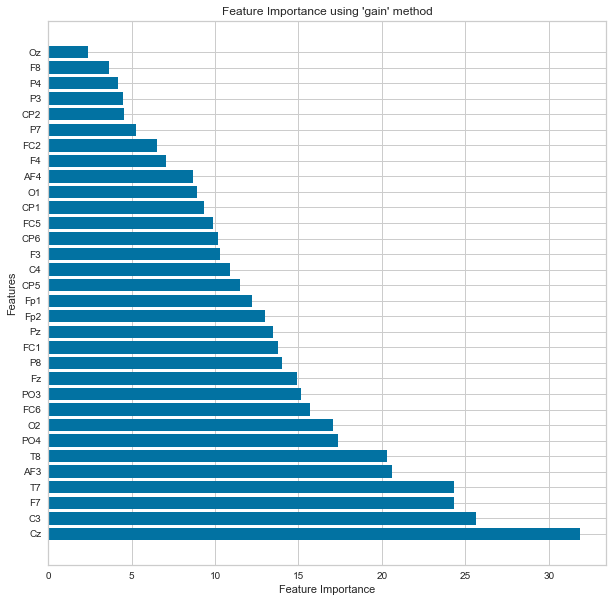

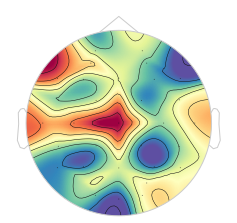

In [349]:
importances = plot_importance(xgb)

In [351]:
et = create_model('et', fold=15)

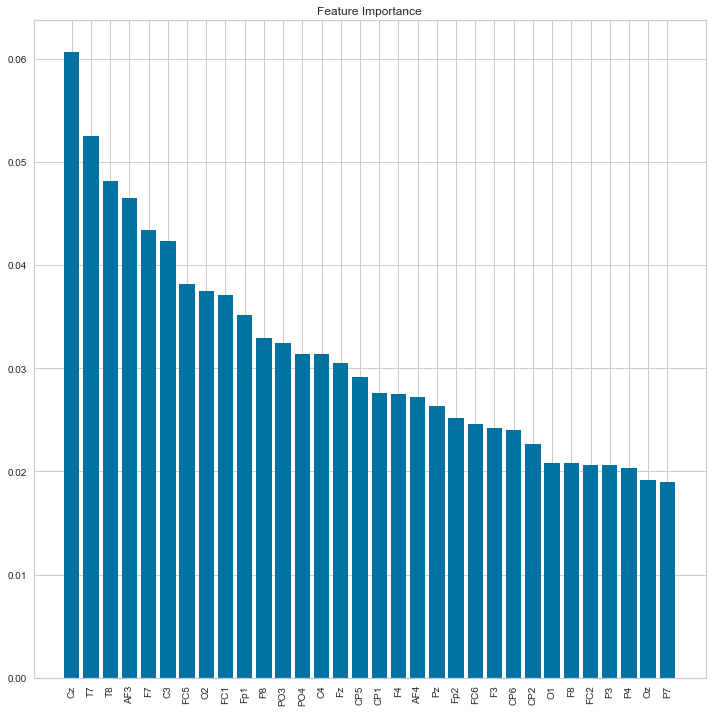

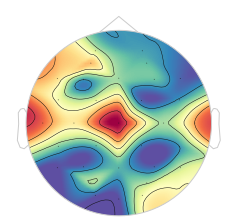

In [354]:
et_plot_importance(et)

## This is the plot to use

In [350]:
X3 = X2
X = X3.iloc[:,:-1]
Y = X3['Y']

In [239]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
29915    1
29916    1
29917    1
29918    1
29919    1
Name: Y, Length: 29920, dtype: int64

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [241]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9787320234960503


In [242]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.05%


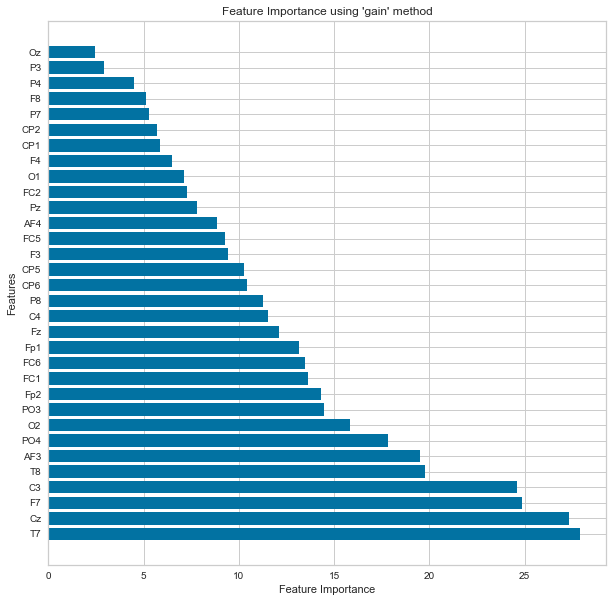

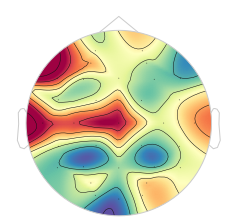

In [243]:
importances1 = plot_importance(model)

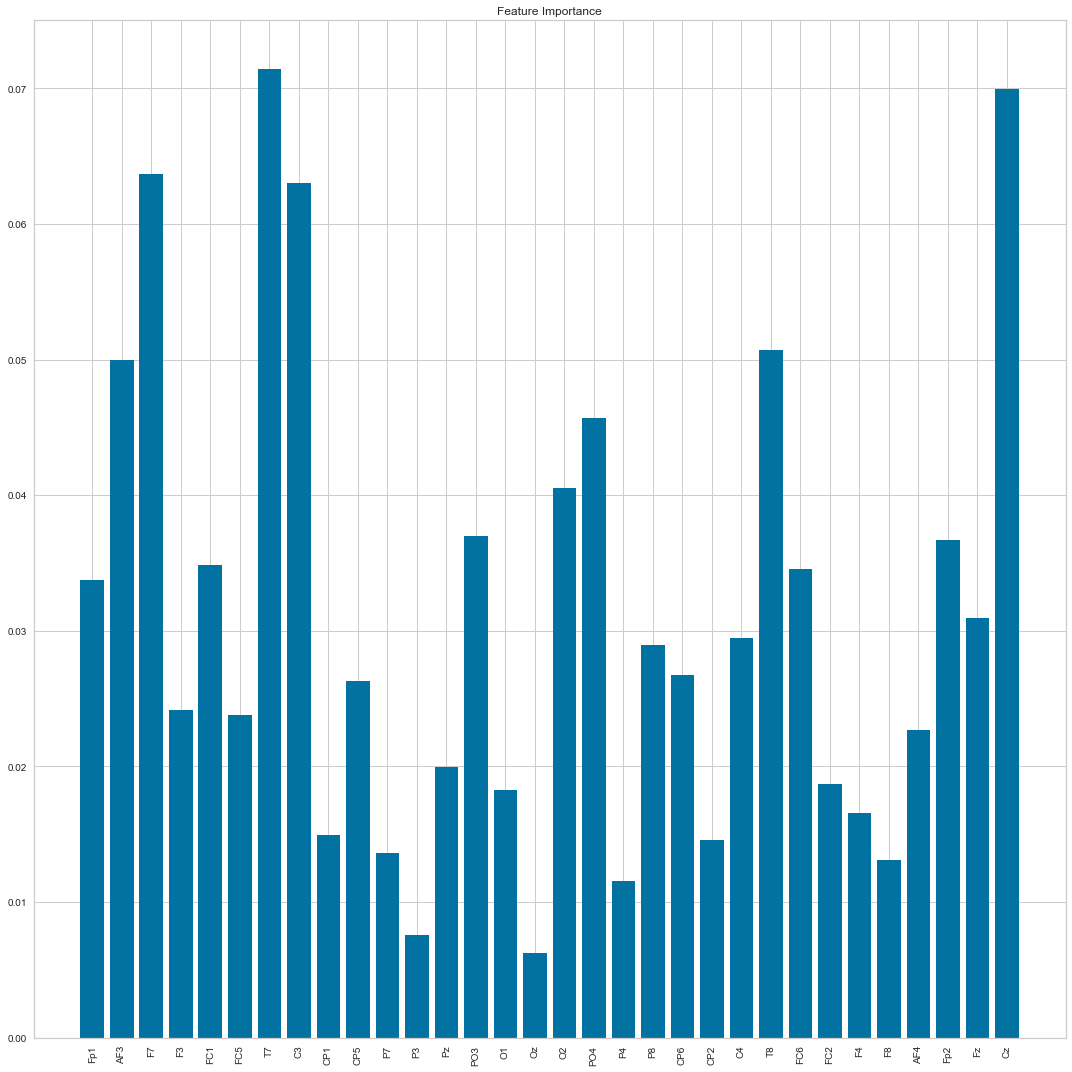

In [244]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

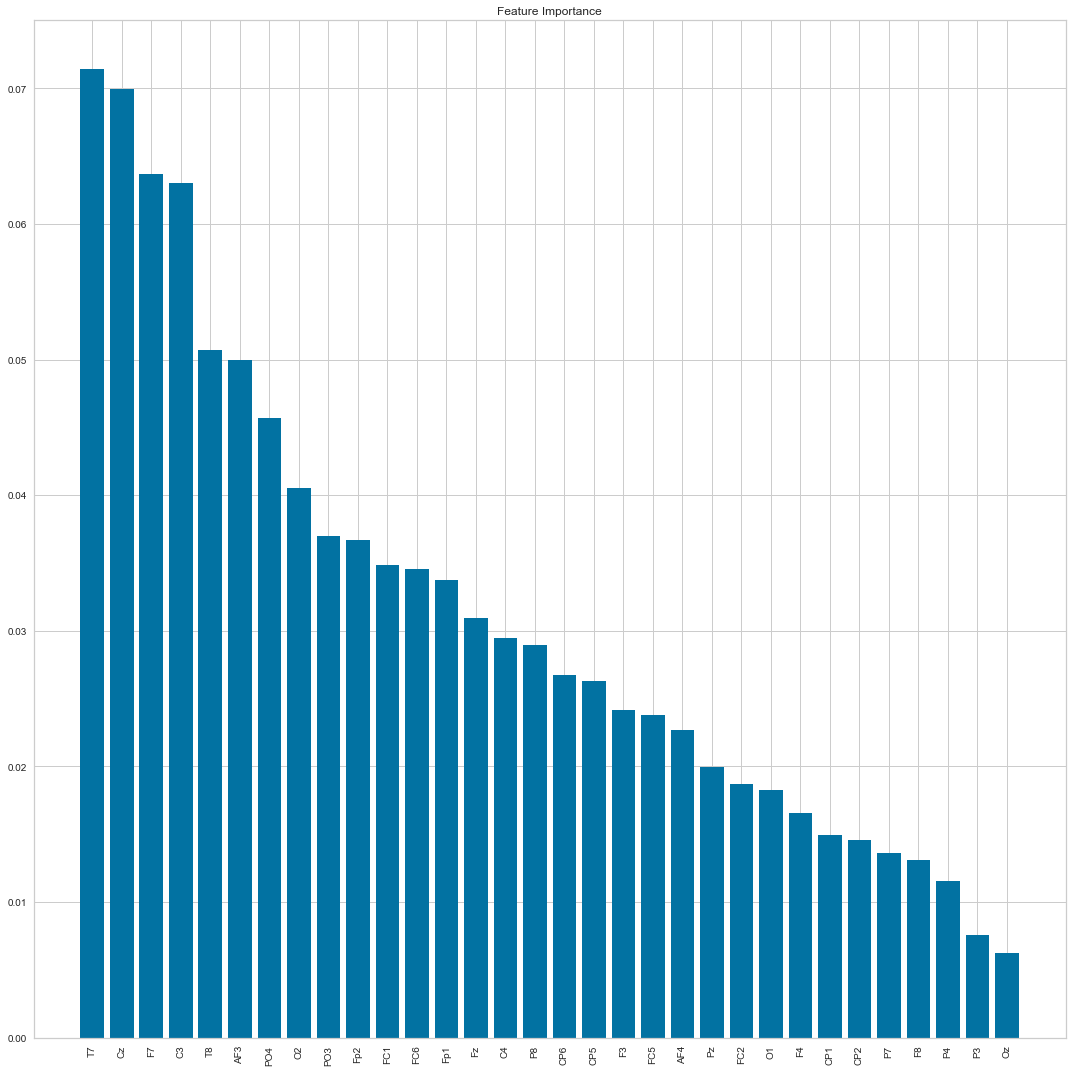

In [245]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

<h2>10. Num Zero Crossings</h2>

In [355]:
num_zero_pd['Y'] = 1
num_zero['Y'] = 0

In [356]:
X1 = num_zero.append(num_zero_pd).reset_index().drop('index', axis=1)
X1

Fp1  AF3  F7  F3  FC1  FC5  T7  C3  CP1  CP5  ...  T8  FC6  FC2  F4  \
0       35   31  17  27   17   35  16  13   15   32  ...  42   33   25  20   
1       32   27  18  32   18   36  15  14   15   35  ...  42   37   19  24   
2       32   25  25  35   19   34  13  15   20   34  ...  42   40   15  22   
3       31   25  26  31   19   33  18  17   22   34  ...  46   41   18  22   
4       26   27  22  33   22   32  20  21   22   34  ...  48   43   19  19   
...    ...  ...  ..  ..  ...  ...  ..  ..  ...  ...  ...  ..  ...  ...  ..   
29915   47   48  34  44   23   26  10  24   29   21  ...  17   10   28  38   
29916   48   51  33  48   25   29  13  23   30   24  ...  19   11   34  43   
29917   50   51  34  48   24   29  14  24   29   23  ...  16   13   32  38   
29918   48   52  30  49   23   29  16  23   30   21  ...  16   14   30  37   
29919   46   50  31  47   21   29  17  25   27   19  ...  15   14   31  39   

       F8  AF4  Fp2  Fz  Cz  Y  
0      25   29   23  33  23  0  
1      25   32   26  36  23  0  
2      26   32   27  35  23  0  
3      30   34   28  35  25  0  
4      30   30   29  33  28  0  
...    ..  ...  ...  ..  .. ..  
29915  18   35   55  29  22  1  
29916  17   38   57  34  27  1  
29917  21   39   56  32  27  1  
29918  21   38   55  28  25  1  
29919  23   38   54  27  26  1  

[29920 rows x 33 columns]

In [357]:
clf = setup(data=X1, target='Y')

In [185]:
compare_models(fold=15)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [186]:
knn = create_model('knn', fold=15, n_neighbors=5)

In [358]:
xgb = create_model('xgboost', fold=15)

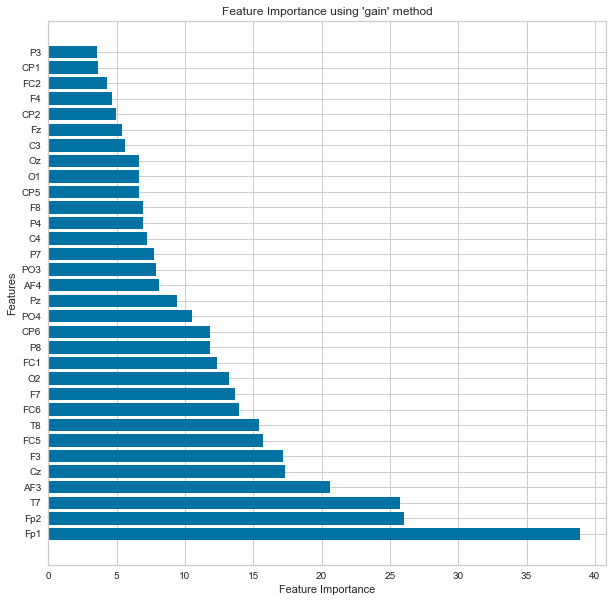

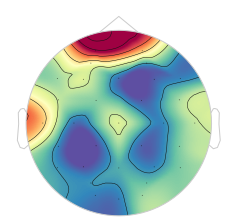

In [359]:
importances = plot_importance(xgb)

In [360]:
et = create_model('et', fold=15)

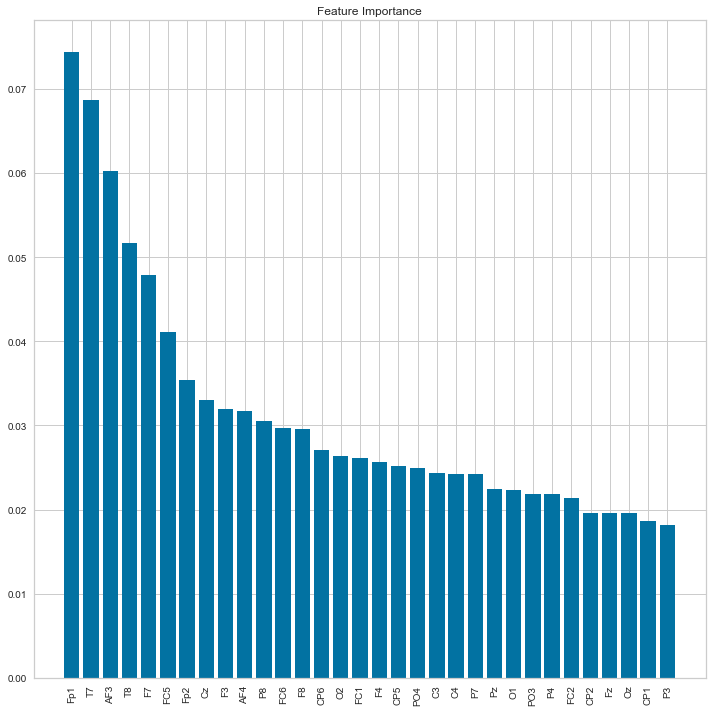

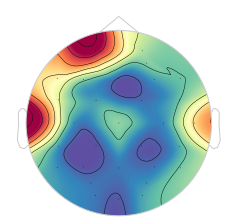

In [361]:
et_plot_importance(et)

In [254]:
X3 = X1
X = X3.iloc[:,:-1]
Y = X3['Y']

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [256]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9922017419485517


In [257]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.40%


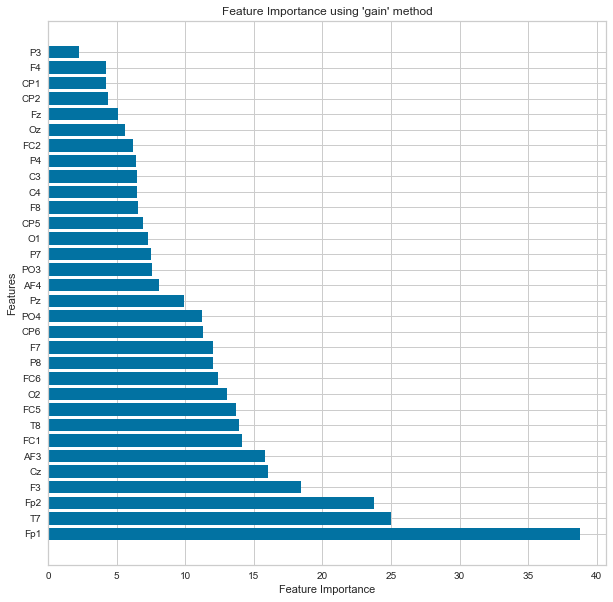

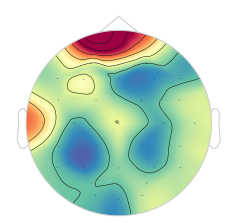

In [258]:
importances1 = plot_importance(model)

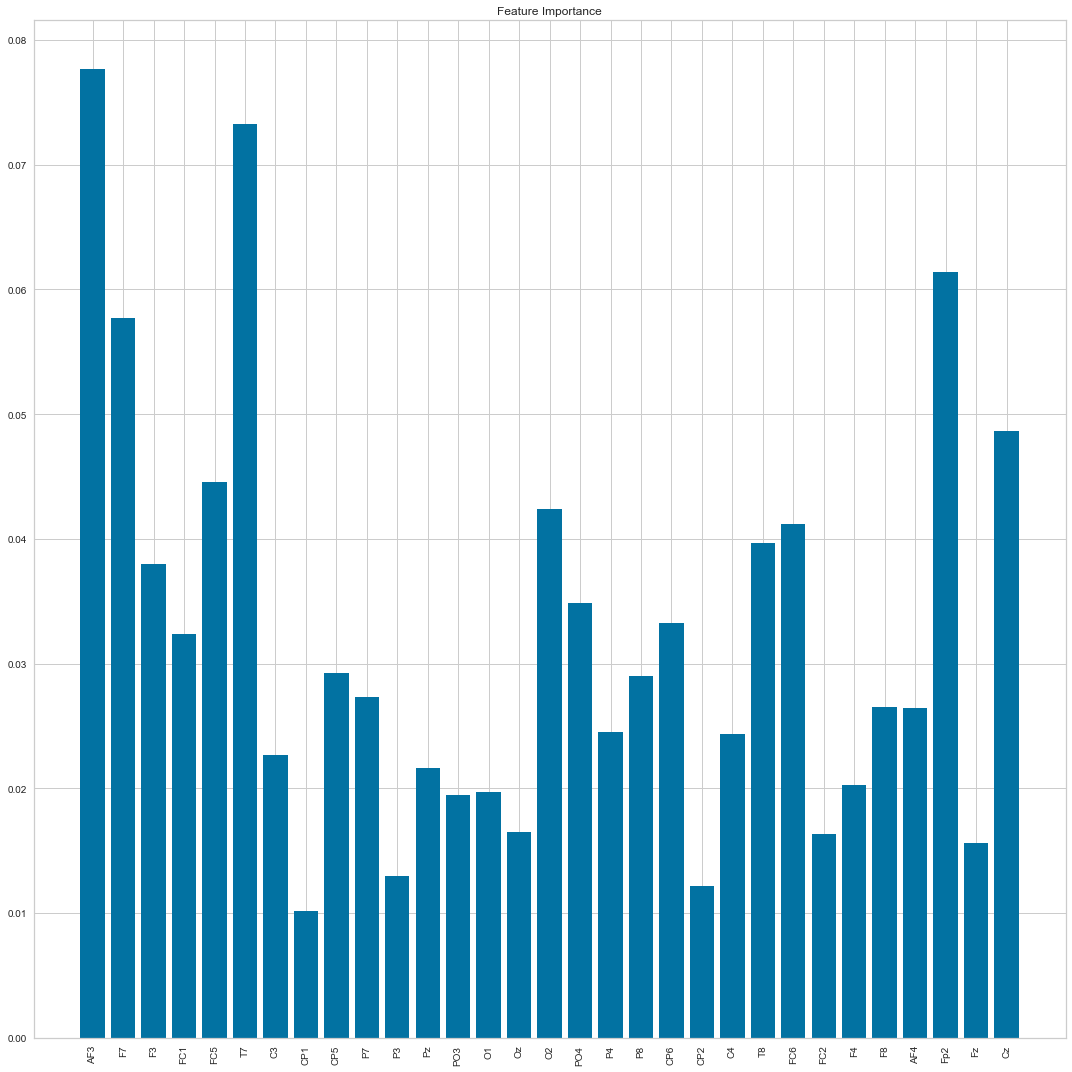

In [194]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

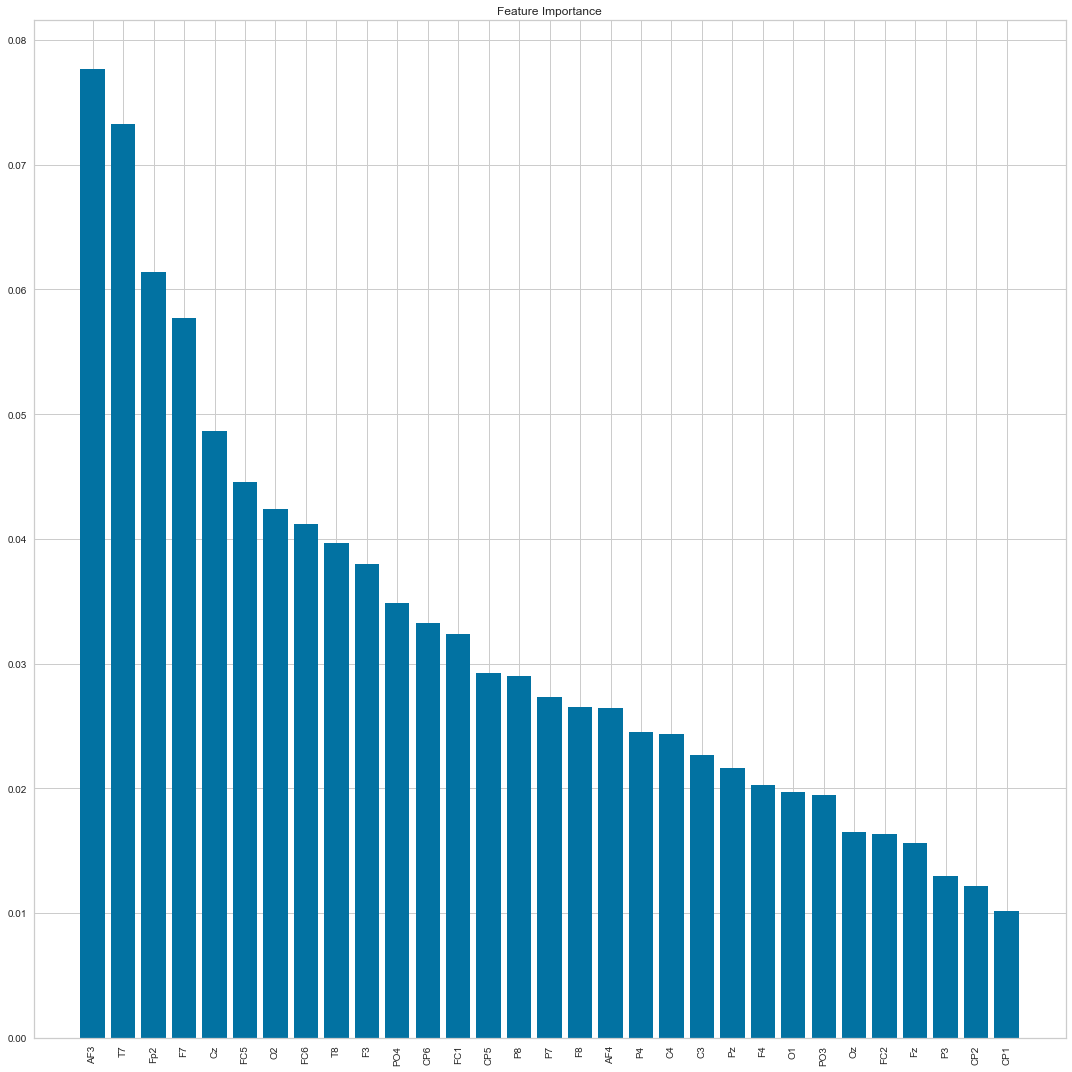

In [195]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

<h2>12. Detrended Fluctuation </h2>

In [362]:
det_fluc_pd['Y'] = 1
det_fluc['Y'] = 0

In [363]:
X1 = det_fluc.append(det_fluc_pd).reset_index().drop('index', axis=1)
X1

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0      1.380256  1.488126  1.649236  1.494442  1.590985  1.603191  1.633116   
1      1.383177  1.436692  1.608022  1.489039  1.558199  1.608659  1.639360   
2      1.409752  1.458431  1.600342  1.519146  1.594245  1.648993  1.639111   
3      1.399992  1.470498  1.565102  1.541624  1.638368  1.630962  1.648737   
4      1.411446  1.477599  1.664193  1.534740  1.571277  1.657381  1.671368   
...         ...       ...       ...       ...       ...       ...       ...   
29915  1.384984  1.270171  1.496957  1.376228  1.579521  1.530622  1.771613   
29916  1.338495  1.271227  1.519406  1.397965  1.611433  1.521978  1.785542   
29917  1.352346  1.263027  1.455145  1.356222  1.573461  1.506917  1.741844   
29918  1.418003  1.284542  1.534227  1.418118  1.641452  1.513277  1.742674   
29919  1.412585  1.310202  1.509134  1.451597  1.622167  1.537492  1.737077   

             C3       CP1       CP5  ...        T8       FC6       FC2  \
0      1.533686  1.524974  1.548991  ...  1.504753  1.608704  1.617063   
1      1.594404  1.502572  1.535177  ...  1.491832  1.563374  1.602164   
2      1.573934  1.508335  1.498072  ...  1.524516  1.628937  1.591778   
3      1.545116  1.572608  1.480441  ...  1.506958  1.577103  1.599725   
4      1.595824  1.583559  1.489984  ...  1.484342  1.536206  1.610764   
...         ...       ...       ...  ...       ...       ...       ...   
29915  1.678705  1.639588  1.796789  ...  1.827818  1.814811  1.635255   
29916  1.659736  1.626838  1.842232  ...  1.710908  1.698281  1.615988   
29917  1.692160  1.662736  1.793267  ...  1.770268  1.765969  1.639678   
29918  1.658233  1.644045  1.777910  ...  1.796640  1.801764  1.651132   
29919  1.676569  1.625503  1.770242  ...  1.841029  1.874465  1.718125   

             F4        F8       AF4       Fp2        Fz        Cz  Y  
0      1.591630  1.461176  1.524330  1.521949  1.599900  1.593243  0  
1      1.626429  1.439995  1.528798  1.474631  1.543713  1.562020  0  
2      1.613667  1.475830  1.581943  1.539003  1.583211  1.530354  0  
3      1.591576  1.451109  1.501421  1.492131  1.566339  1.564976  0  
4      1.610511  1.489340  1.513806  1.522189  1.575189  1.574359  0  
...         ...       ...       ...       ...       ...       ... ..  
29915  1.361302  1.680853  1.427145  1.276722  1.583724  1.674430  1  
29916  1.360521  1.593640  1.425374  1.210242  1.616125  1.696337  1  
29917  1.376658  1.607597  1.402419  1.230150  1.583809  1.683038  1  
29918  1.346177  1.652528  1.396207  1.282114  1.639569  1.712910  1  
29919  1.405060  1.702499  1.439060  1.313658  1.669230  1.724115  1  

[29920 rows x 33 columns]

In [364]:
clf = setup(data=X1, target='Y')

In [201]:
compare_models(fold=15)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [202]:
knn = create_model('knn', fold=15, n_neighbors=5)

In [365]:
xgb = create_model('xgboost', fold=15)

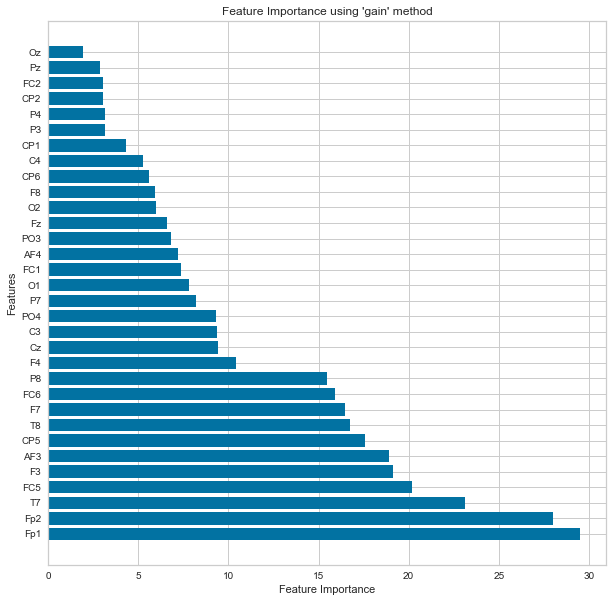

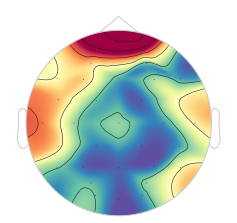

In [366]:
importances = plot_importance(xgb)

In [367]:
et = create_model('et', fold=15)

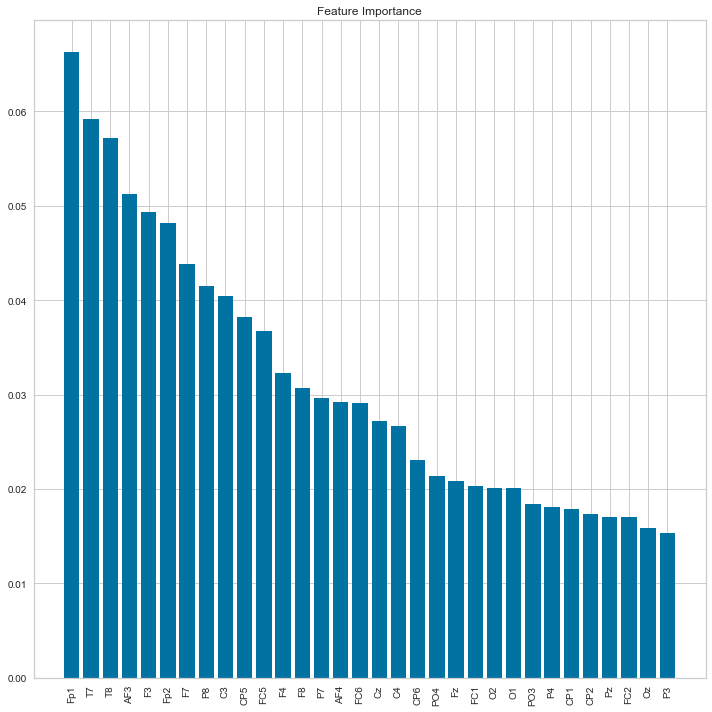

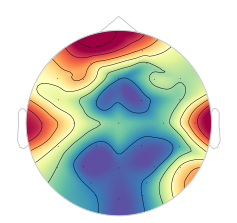

In [368]:
et_plot_importance(et)

In [264]:
X3 = X2
X = X3.iloc[:,:-1]
Y = X3['Y']

In [265]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
29915    1
29916    1
29917    1
29918    1
29919    1
Name: Y, Length: 29920, dtype: int64

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [267]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9787320234960503


In [369]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.33%


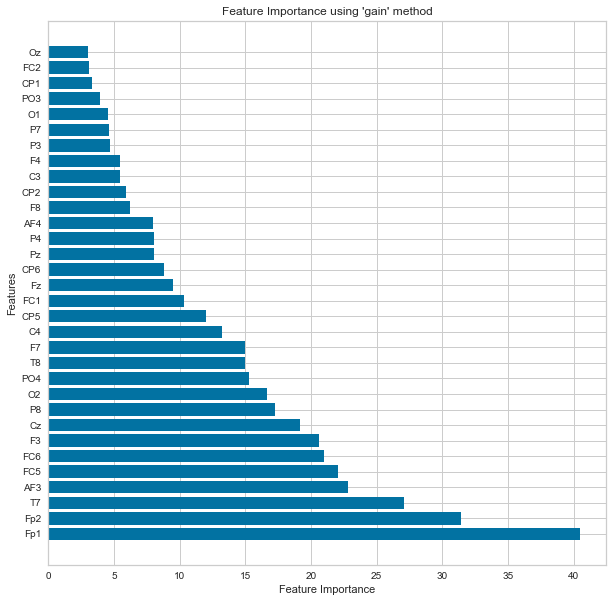

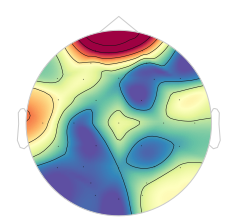

In [370]:
importances1 = plot_importance(model)

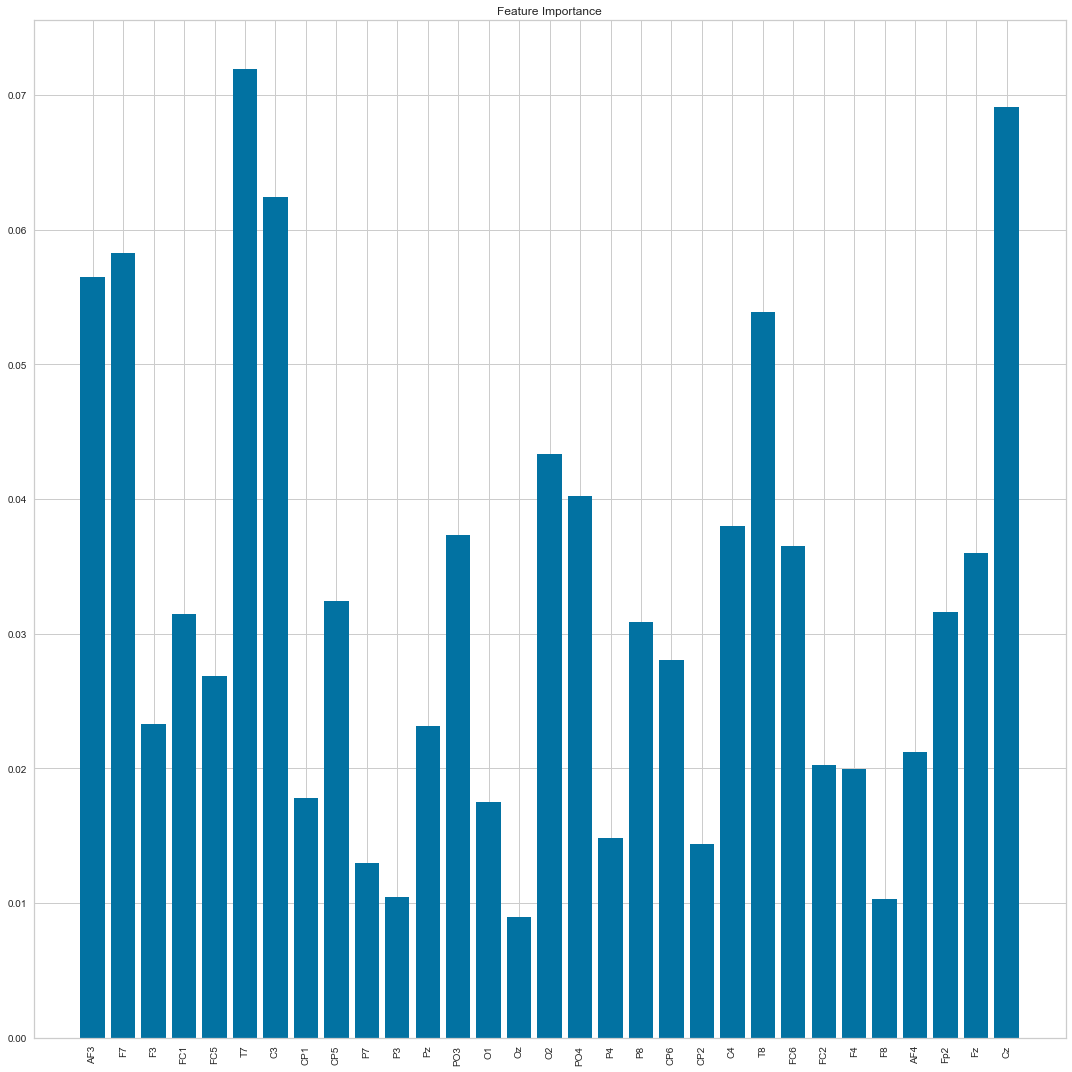

In [210]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

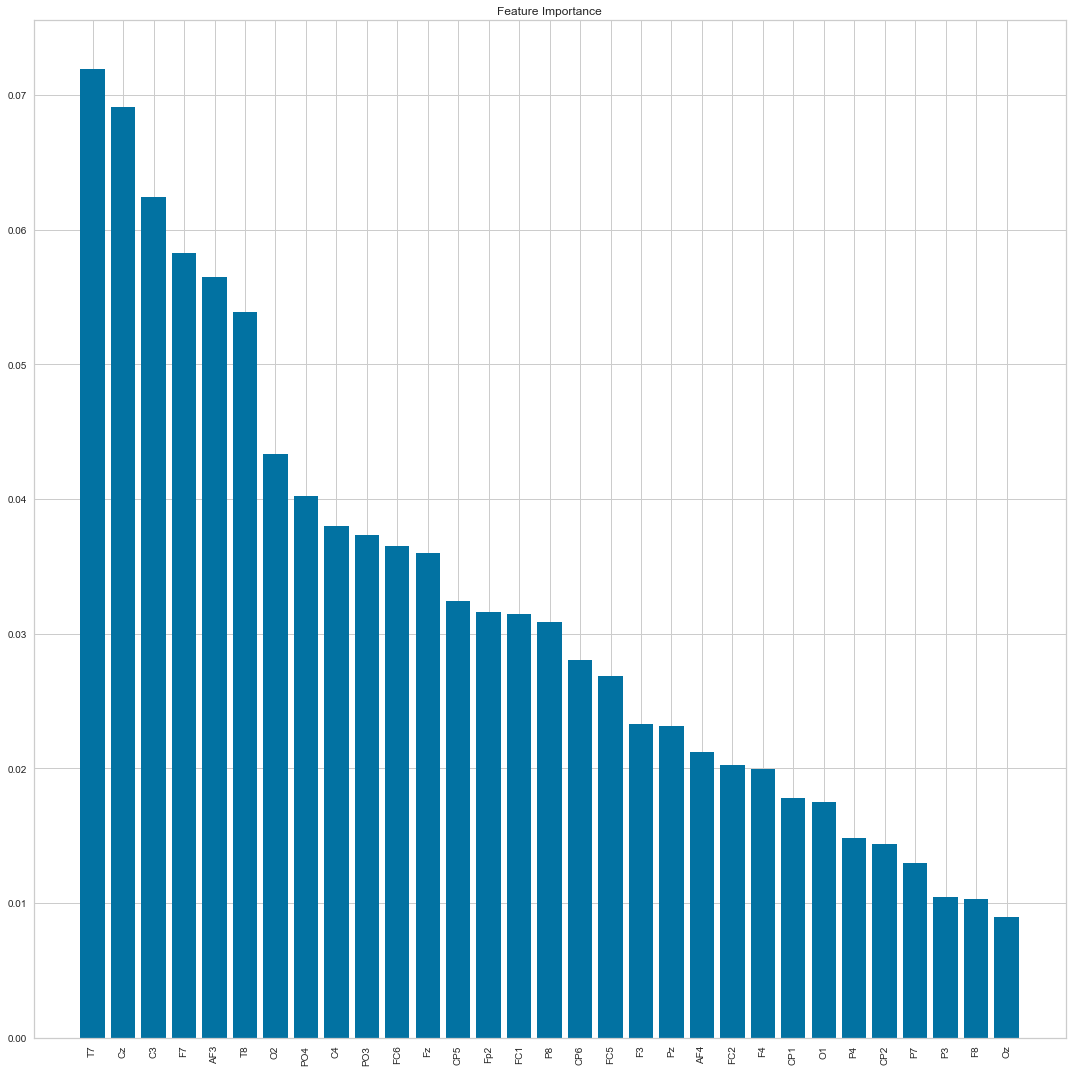

In [211]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()